In [1]:
###PLEASE READ###
#The only change that the assessor will need to make is to the path variable below.
#As long as the original excel file is present and is still called 'LendingClubLoans2018-2020.xlsx'
#Script can take a while to run depending on computer power so possibly a good idea to run while marking report.

In [2]:
#Import the raw uncleaned data that was provided and required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
insurance_data_path = os.getcwd()

In [3]:
file_name = '\\LendingClubLoans2018-2020.xlsx'
insurance_data_full = pd.read_excel(insurance_data_path + file_name)
data_dictionary = pd.read_excel(insurance_data_path + file_name, sheet_name='DataDictionary')
data_dictionary.head()
data_dictionary.index = data_dictionary['Feature ID']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
insurance_data_full.shape

(77159, 108)

In [5]:
insurance_data_full.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

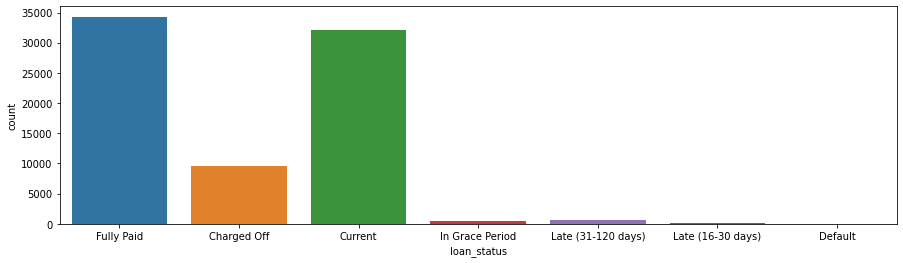

In [6]:
#Show distribution of the target variable classes for whole dataset
plt.figure().set_figwidth(15)
sns.countplot(x = 'loan_status', data = insurance_data_full)
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='count'>

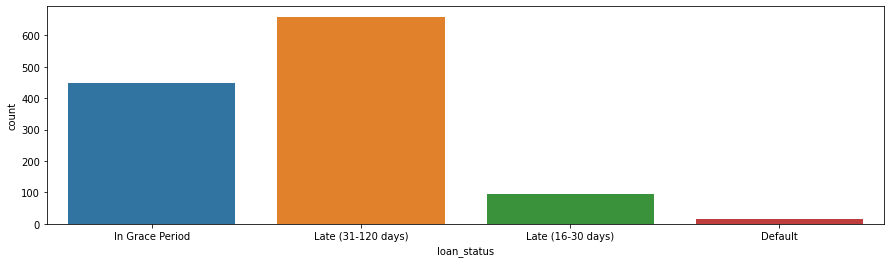

In [7]:
#closer view of the lower frequency values
plt.figure().set_figwidth(15)
df = insurance_data_full[insurance_data_full['loan_status'].isin(['In Grace Period', 'Late (31-120 days)', 'Default', 'Late (16-30 days)'])]
sns.countplot(x='loan_status', data=df)

In [8]:
#value counts prior to any data cleansing
insurance_data_full['loan_status'].value_counts()

Fully Paid            34289
Current               32039
Charged Off            9614
Late (31-120 days)      659
In Grace Period         448
Late (16-30 days)        96
Default                  14
Name: loan_status, dtype: int64

In [9]:
#upsampling poorly represented classes could hurt model, so combine 2 x 'late' classes with 'in grace'. 
#also combine 'default' with 'charged off'
insurance_data = insurance_data_full
insurance_data['loan_status'] = insurance_data['loan_status'].replace(['Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period'],'Late')
insurance_data['loan_status'] = insurance_data['loan_status'].replace(['Default'],'Charged Off')


In [10]:
#summary of all remaining variables to include dtype, null and unique values
all_columns = list(insurance_data)
float_cols = []
cat_cols = []
date_cols = []
int_cols = []
cont_cols = []
for col in all_columns:
    if insurance_data[col].dtype == 'int64':
        int_cols.append(col)
        cont_cols.append(col)
    elif insurance_data[col].dtype == 'float64':
        float_cols.append(col)
        cont_cols.append(col)
    elif insurance_data[col].dtype == 'object':
        cat_cols.append(col)
    elif insurance_data[col].dtype == 'datetime64[ns]':
        date_cols.append(col)

unique_ser = insurance_data[all_columns].nunique()
unique_ser.name = 'unique'
unique_df = unique_ser.to_frame()

dtype_ser = insurance_data[all_columns].dtypes
dtype_ser.name = 'dtype'
dtype_df = dtype_ser.to_frame()

null_ser = insurance_data[all_columns].isnull().sum()
null_ser.name = 'null'
null_df = null_ser.to_frame()

df1 = pd.merge(dtype_ser, null_ser, right_index = True, left_index = True)
sum_df = pd.merge(df1, unique_ser, right_index = True, left_index = True)
sum_df = pd.merge(sum_df, data_dictionary, left_index=True, right_index=True)

sum_df = sum_df.drop(['Feature ID'], axis = 1)

sum_df.to_excel(insurance_data_path + '\\DataDictionary.xlsx', index = True, sheet_name = 'DataDictionaryFull')

sum_df


dtype   null  unique  \
id                                                   int64      0   77159   
emp_title                                           object   5862   28185   
application_type                                    object      0       2   
home_ownership                                      object      0       5   
loan_status                                         object      0       4   
loan_amnt                                            int64      0    1439   
int_rate                                           float64      0     129   
term                                                object      0       2   
installment                                        float64      0   10999   
grade                                               object      0       7   
earliest_cr_line                            datetime64[ns]      0     622   
issue_d                                     datetime64[ns]      0      16   
last_pymnt_d                                datetime64[ns]      0      28   
next_pymnt_d                                datetime64[ns]  43903       9   
annual_inc                                         float64      0    6850   
annual_inc_joint                                   float64  67777    2234   
verification_status                                 object      0       3   
verification_status_joint                           object  67780       3   
pymnt_plan                                          object      0       1   
purpose                                             object      0      13   
hardship_flag                                       object   1627       2   
hardship_reason                                     object  72668      17   
hardship_type                                       object  72668       6   
hardship_status                                     object  72668       4   
payment_plan_start_date                     datetime64[ns]  72668      36   
dti                                                float64    108    5506   
dti_joint                                          float64  67777    3013   
delinq_2yrs                                          int64      0      26   
inq_fi                                             float64   2495      21   
inq_last_12m                                       float64   2495      29   
inq_last_6mths                                       int64      0       7   
fico_range_low                                       int64      0      38   
fico_range_high                                      int64      0      38   
last_fico_range_high                                 int64      0      72   
last_fico_range_low                                  int64      0      71   
mort_acc                                             int64      0      20   
open_acc                                             int64      0      60   
open_acc_6m                                        float64   2495      11   
acc_open_past_24mths                                 int64      0      35   
pub_rec                                              int64      0      14   
total_acc                                            int64      0     101   
initial_list_status                                 object      0       2   
out_prncp                                          float64      0   23219   
out_prncp_inv                                      float64      0   23642   
total_pymnt                                        float64      0   67605   
total_pymnt_inv                                    float64      0   67300   
total_rec_prncp                                    float64      0   33349   
total_rec_int                                      float64      0   67295   
total_rec_late_fee                                 float64      0    1988   
total_cu_tl                                        float64   2495      36   
tot_coll_amt                                         int64      0    3238   
tot_cur_bal                                      

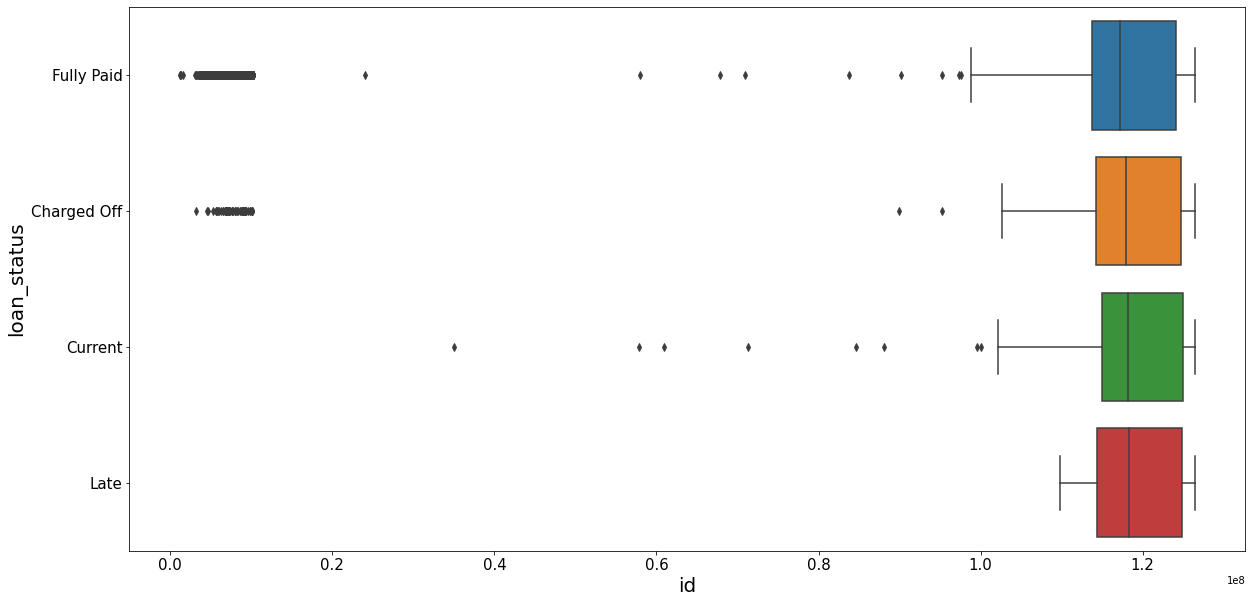

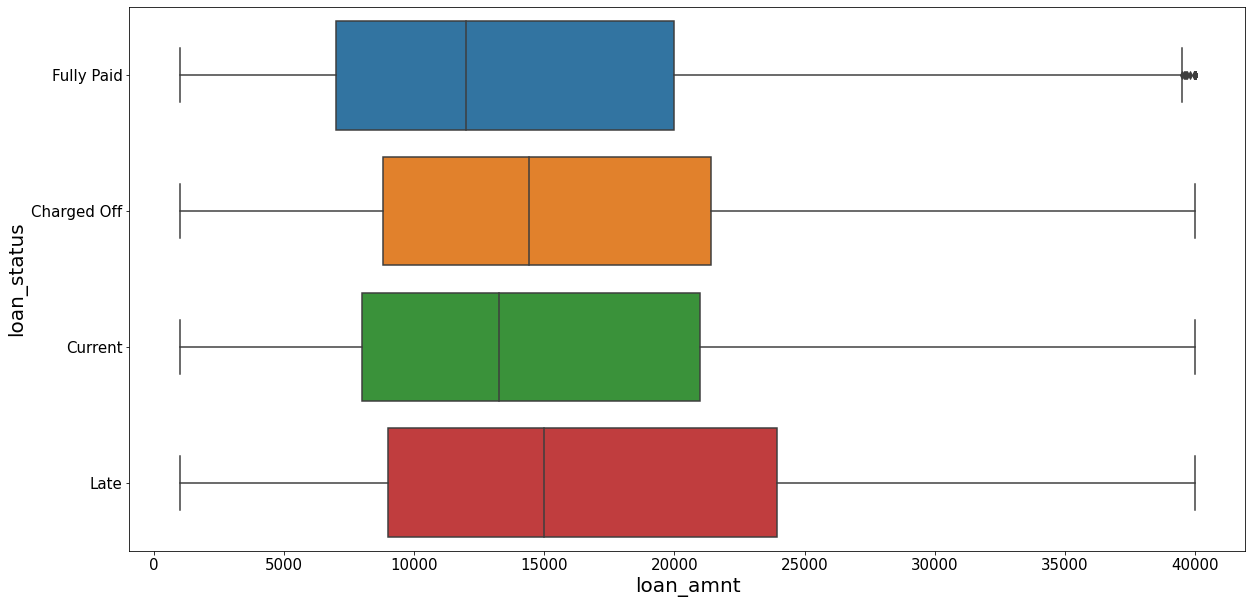

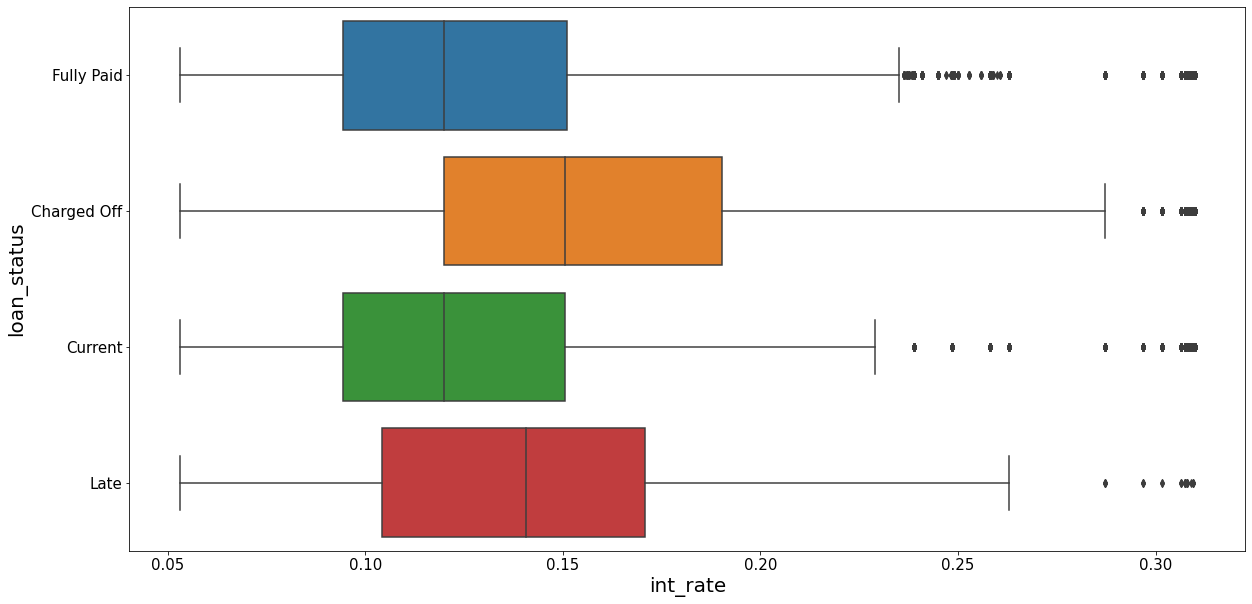

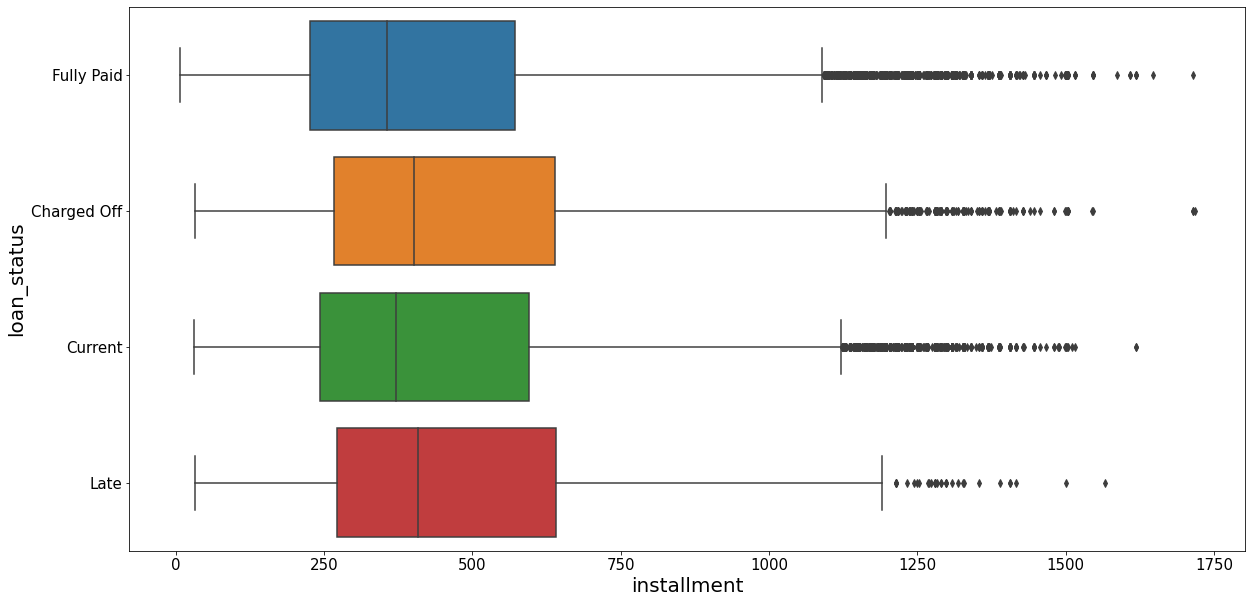

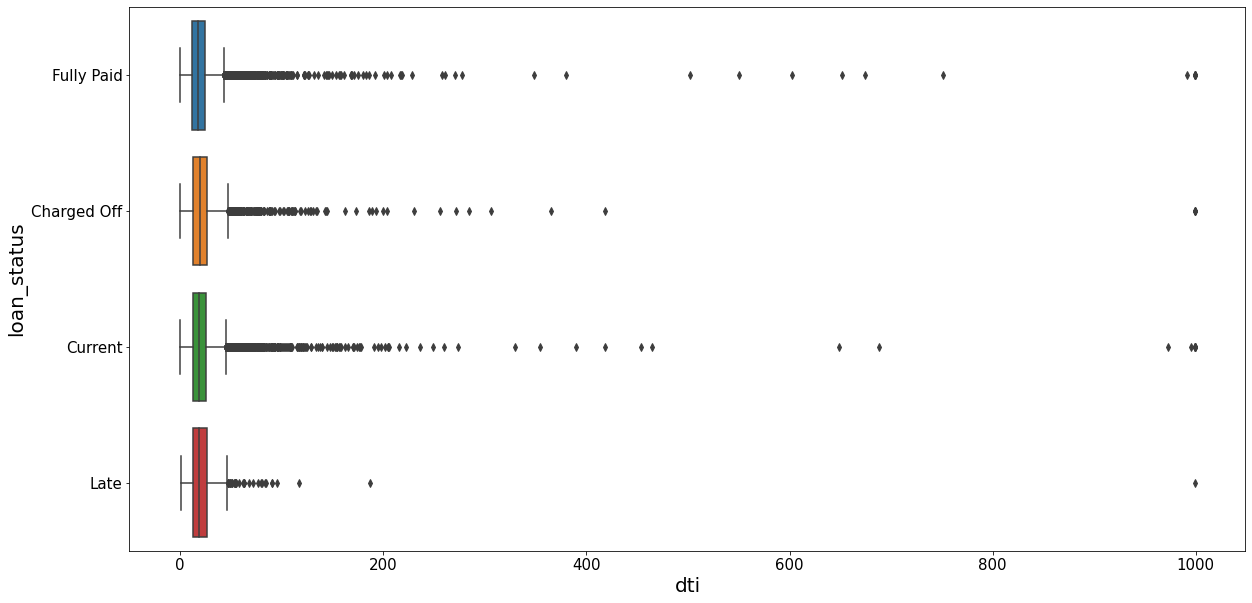

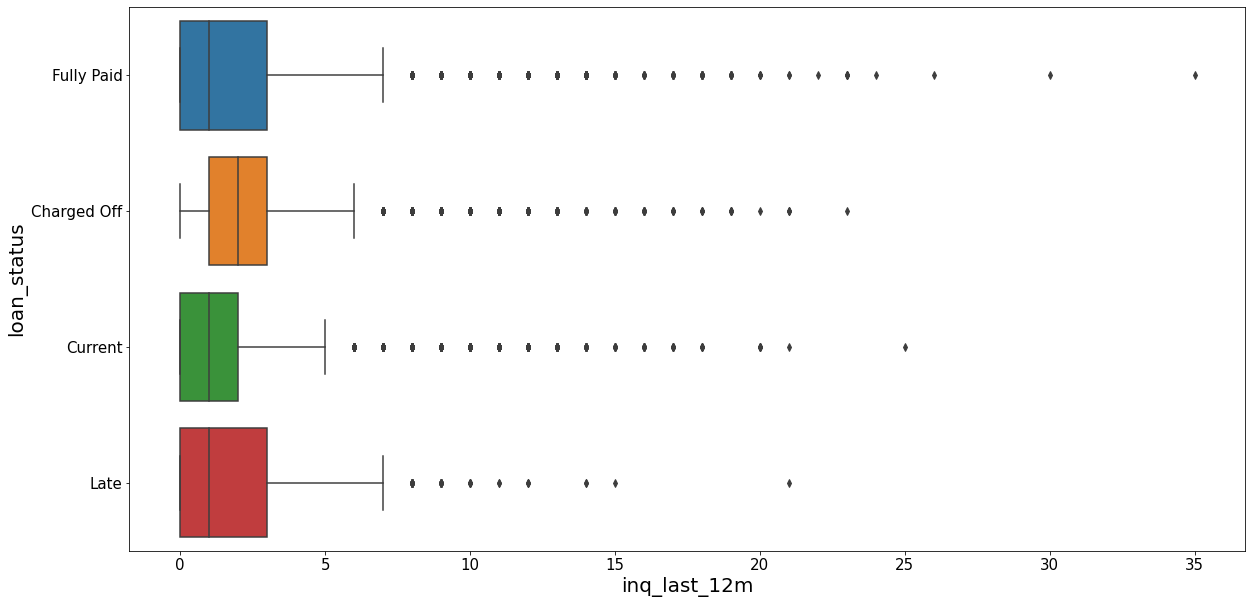

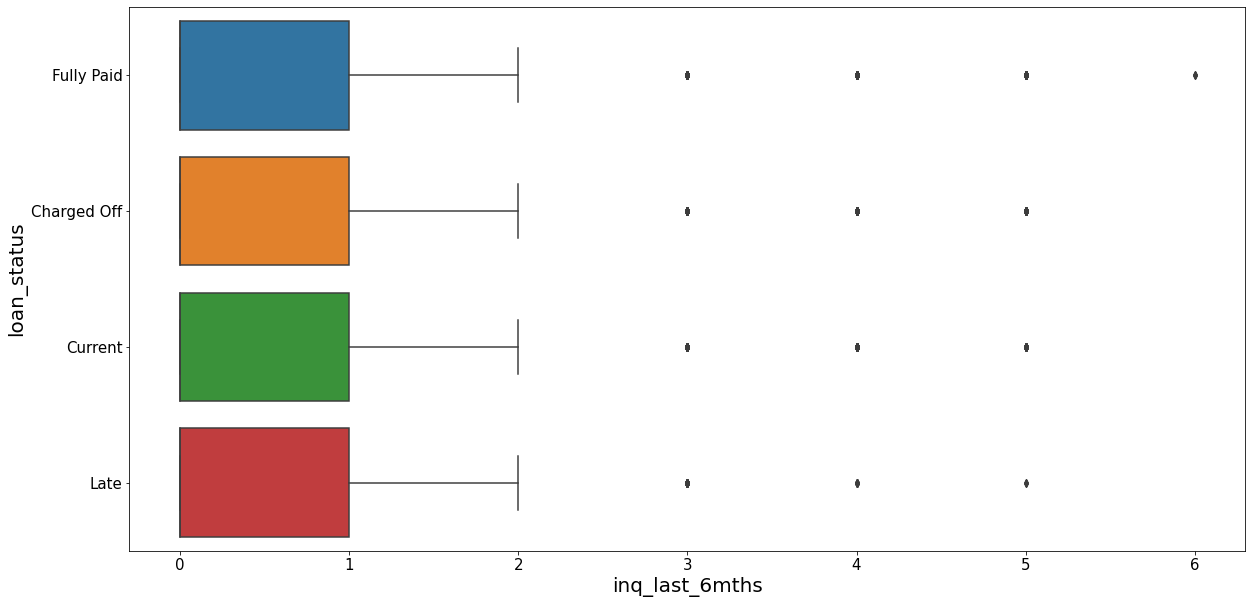

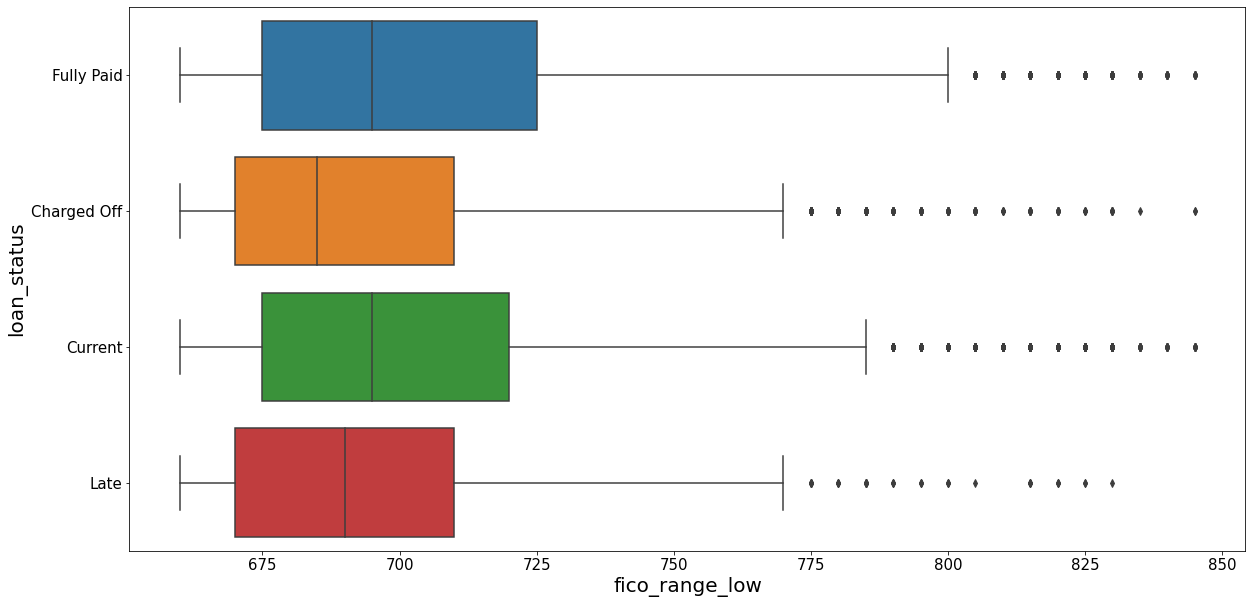

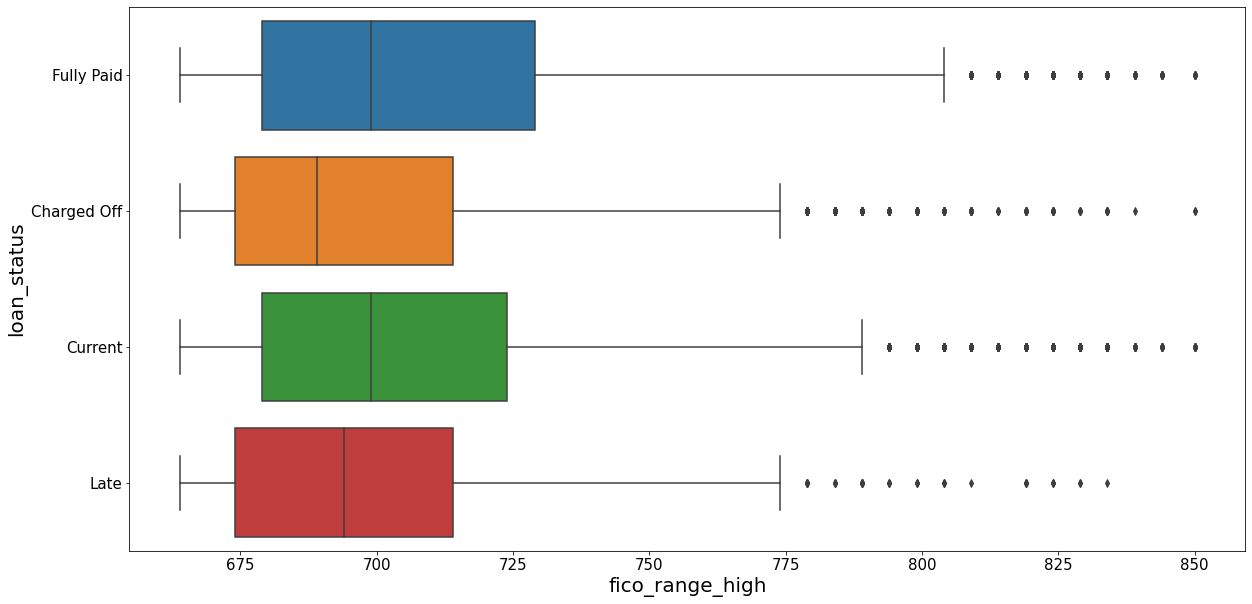

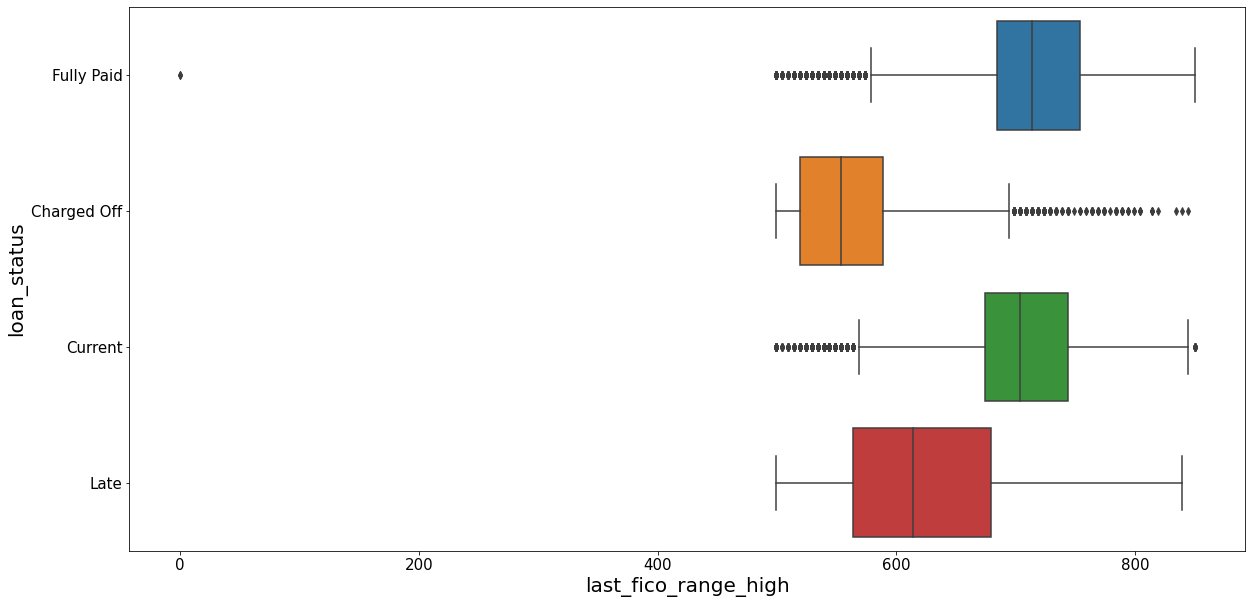

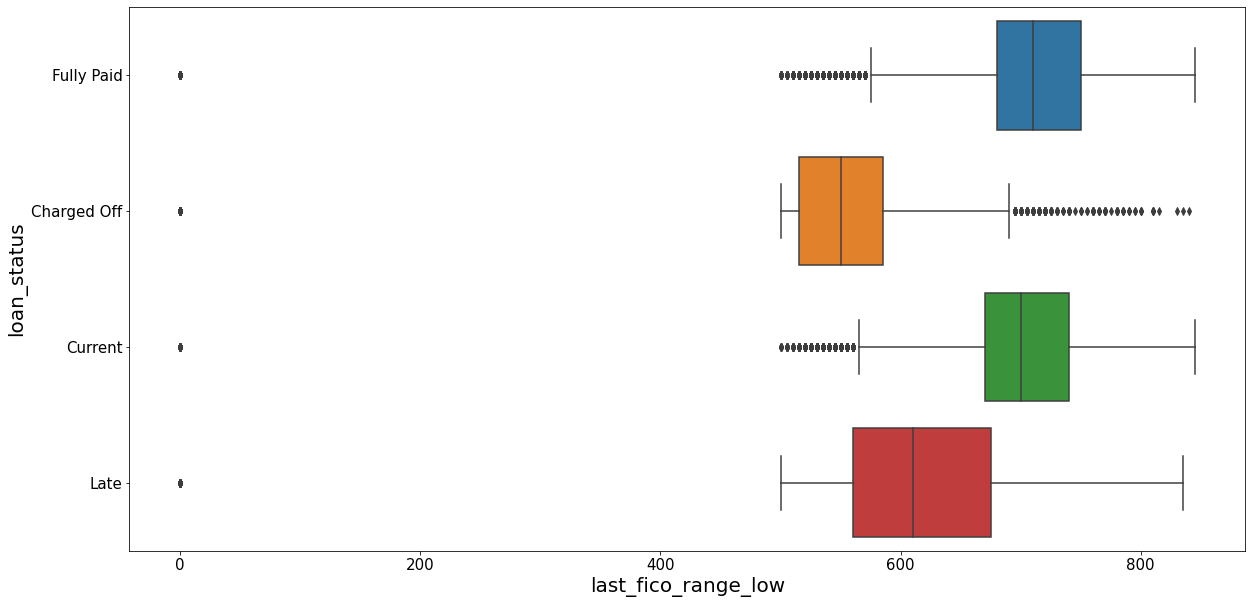

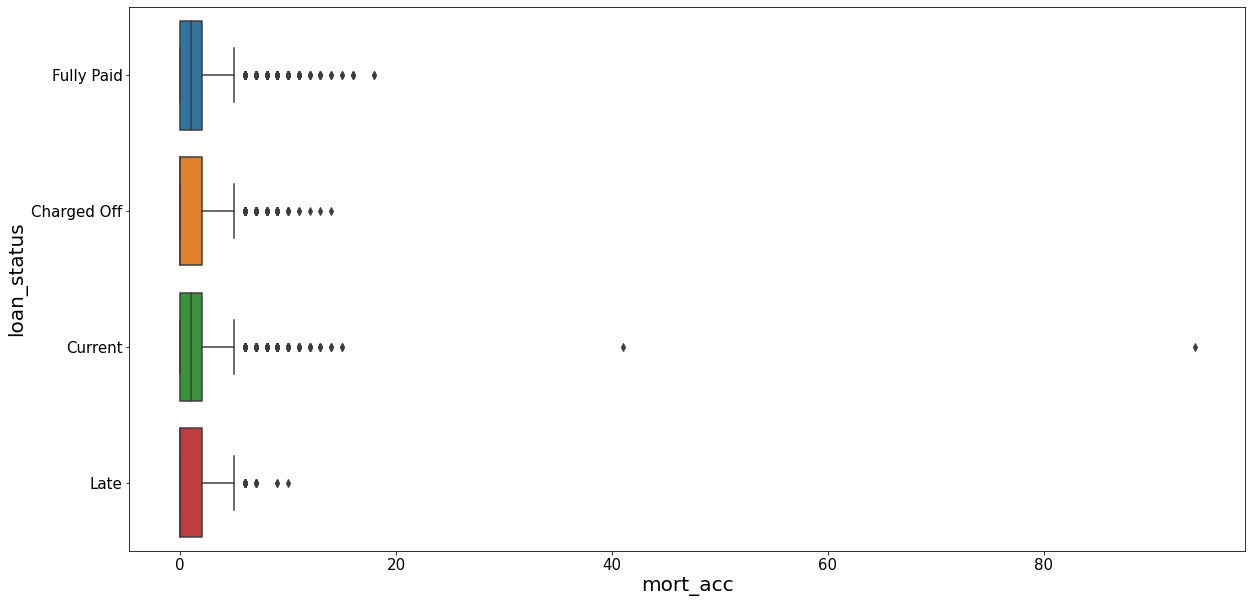

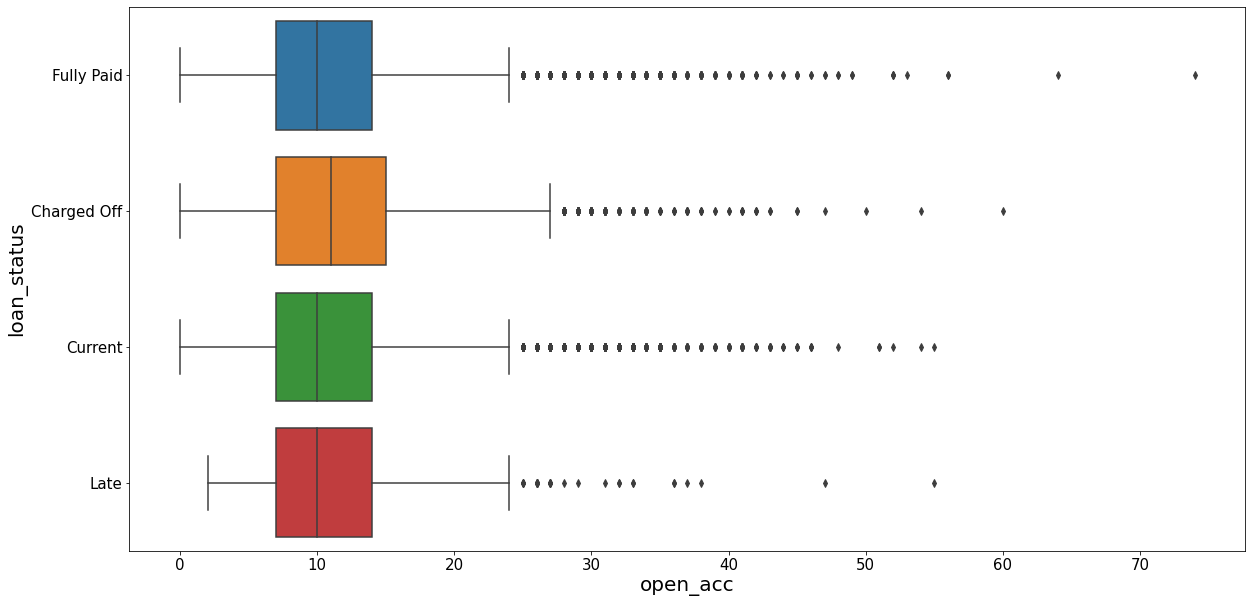

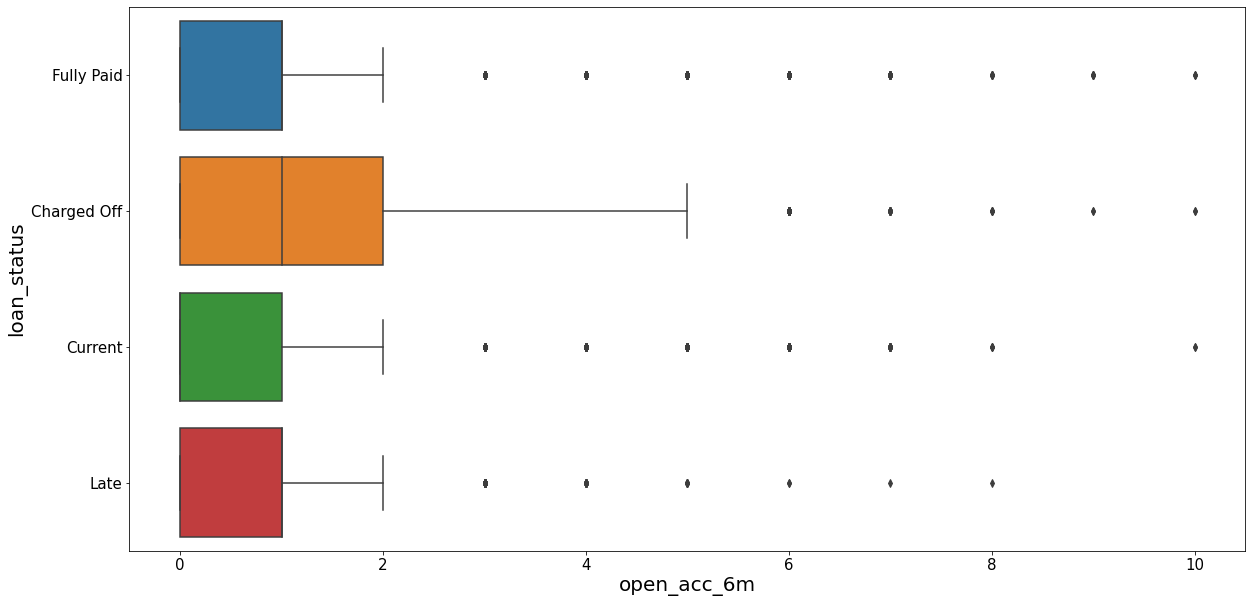

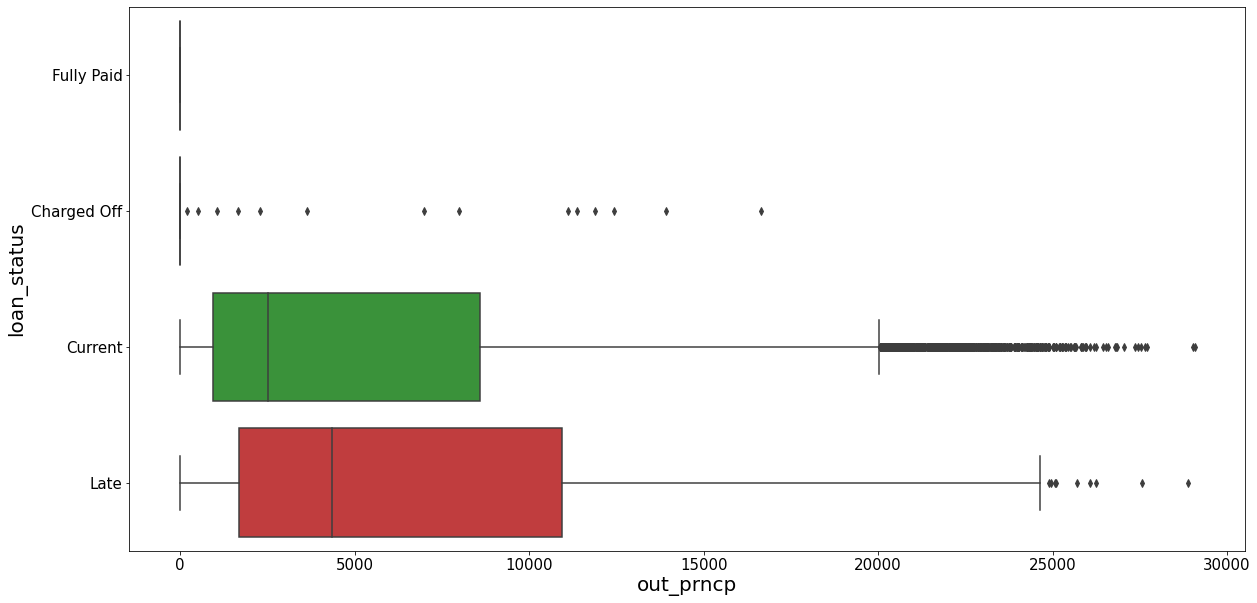

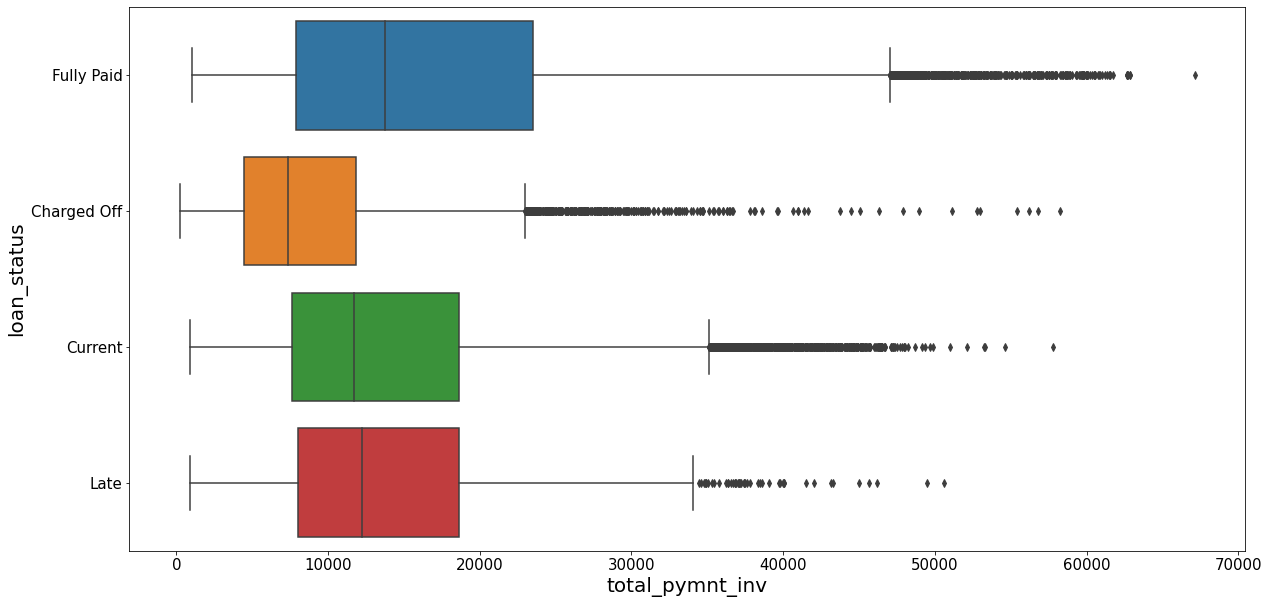

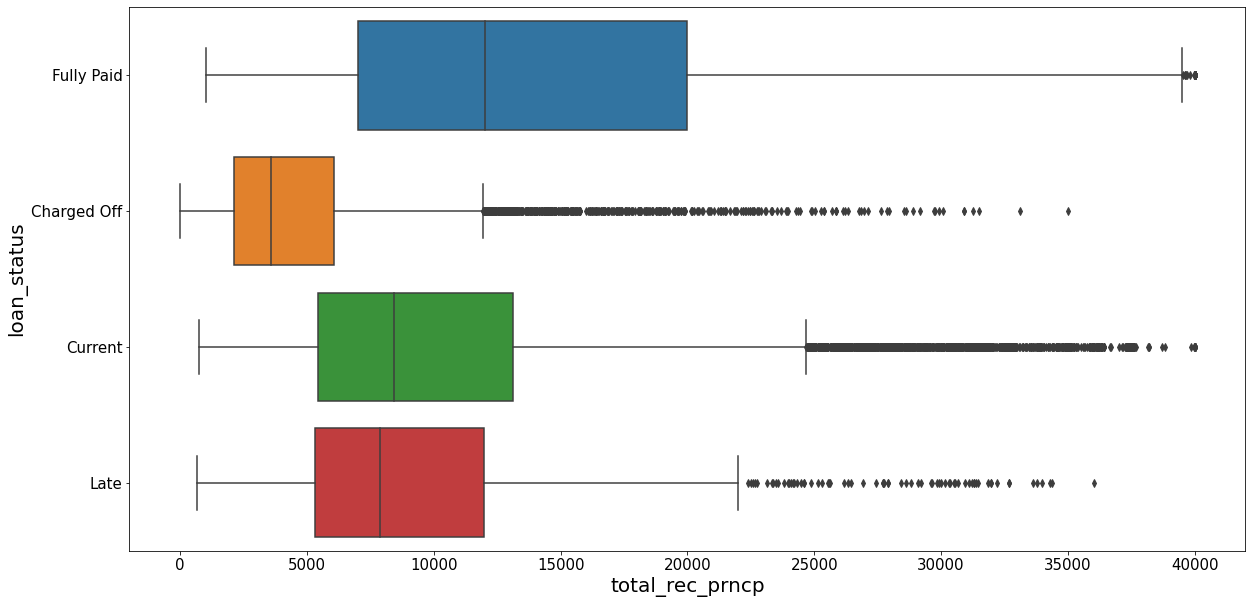

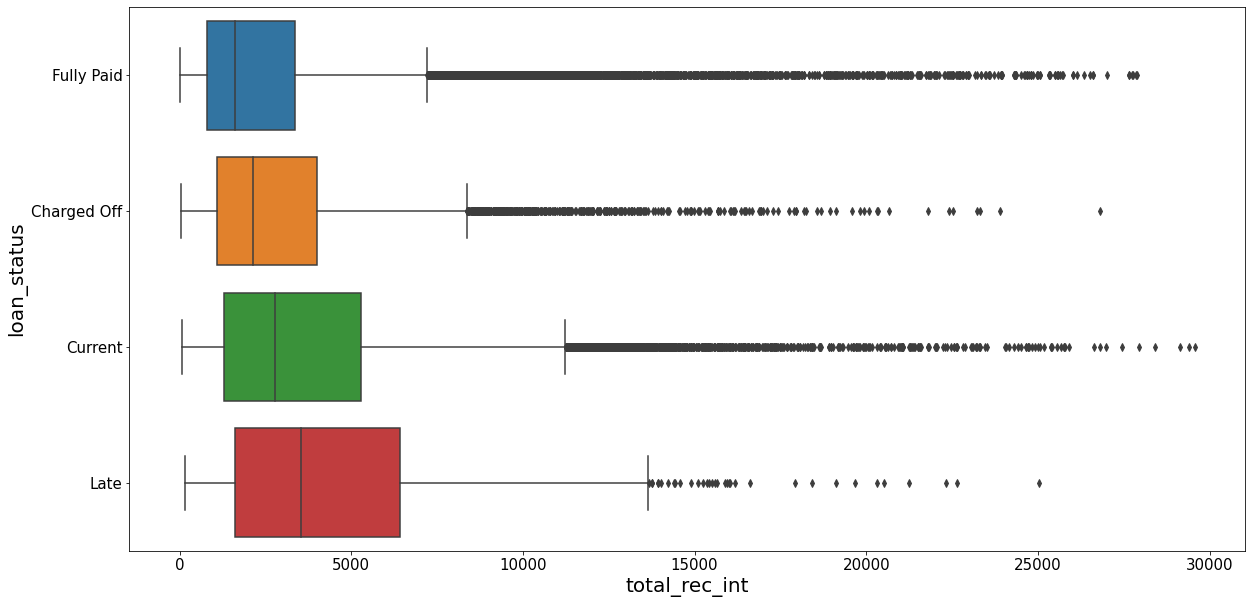

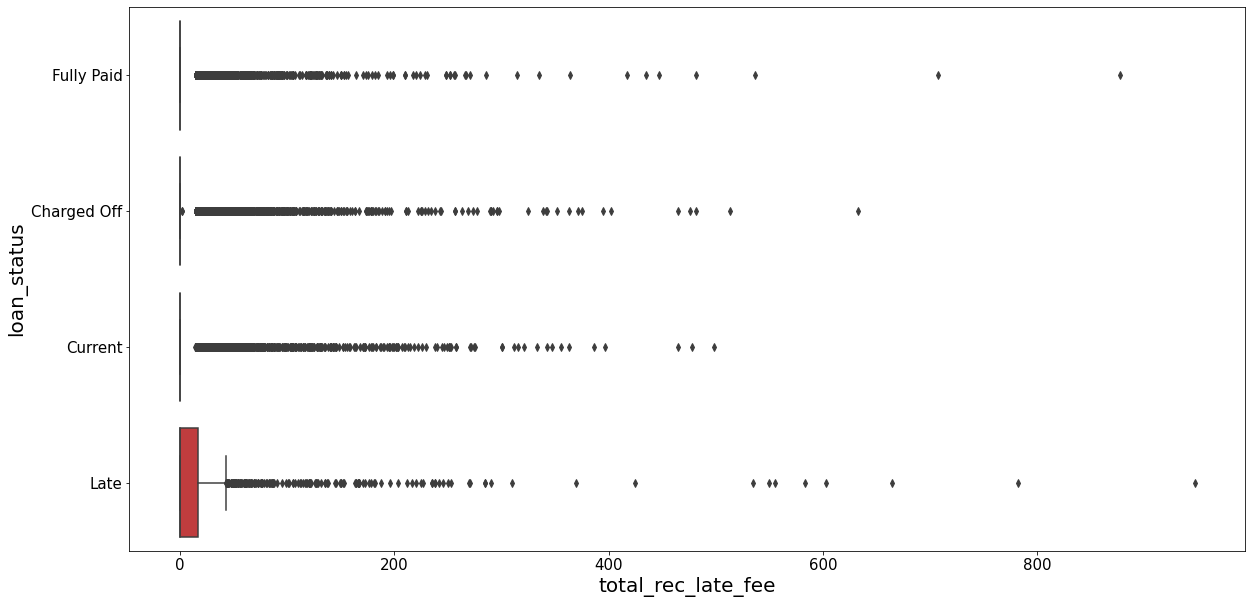

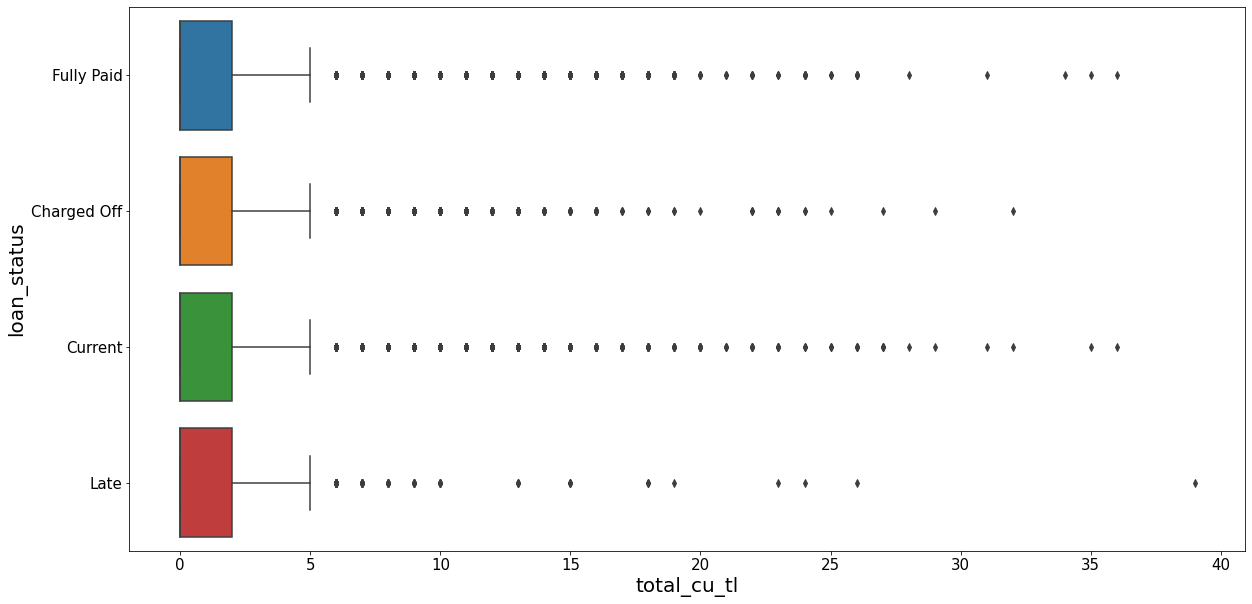

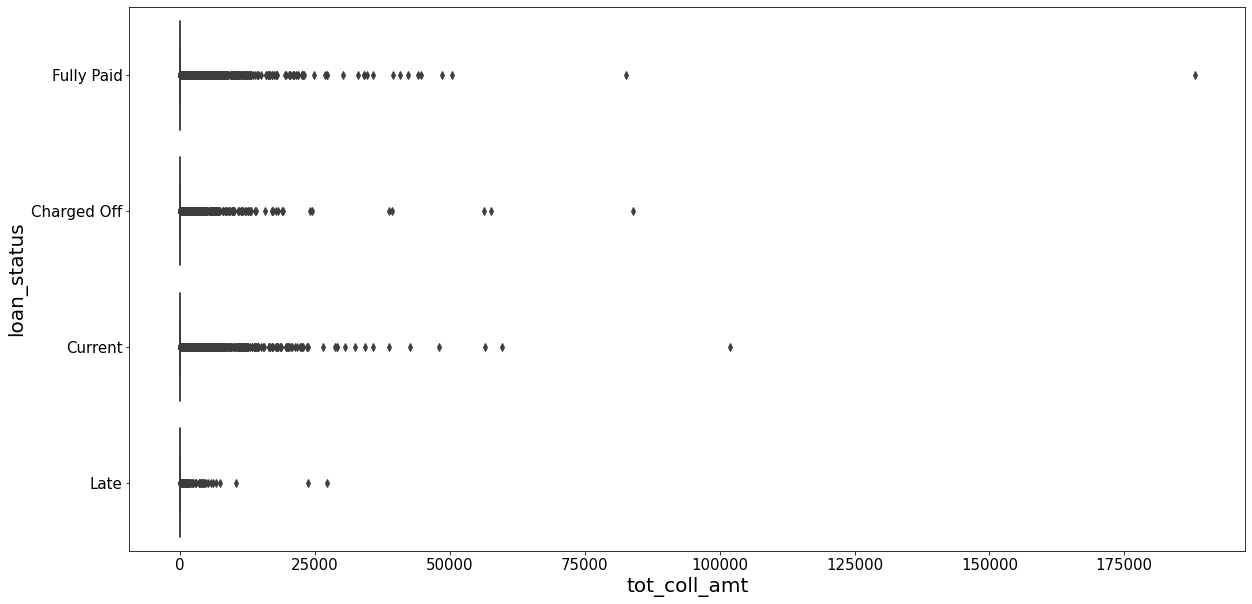

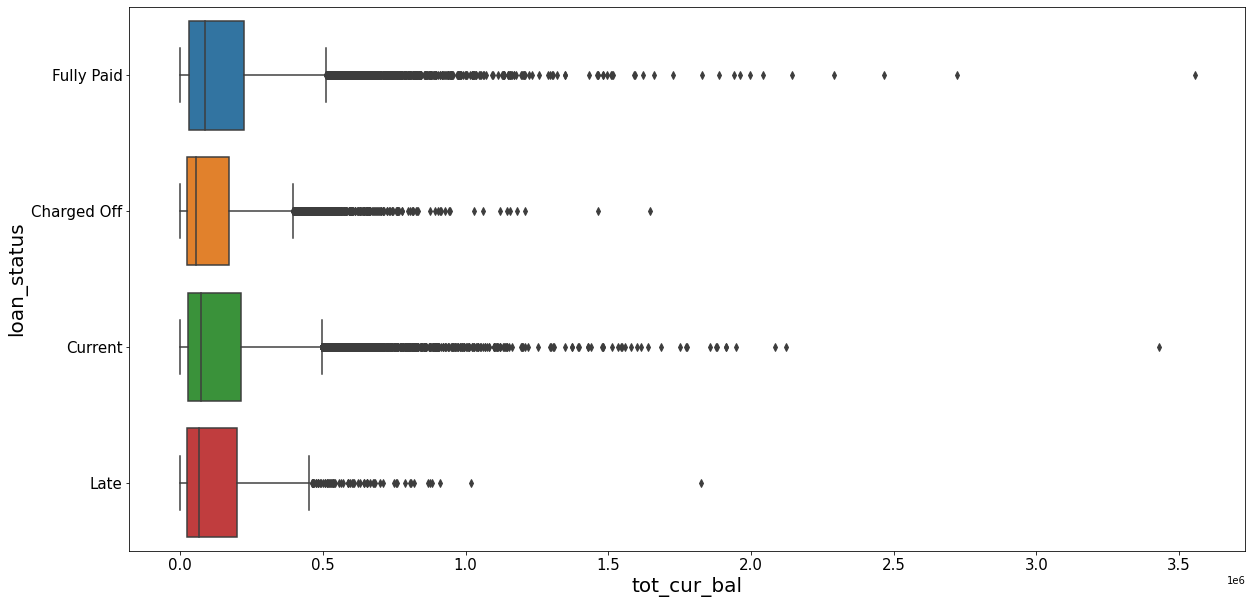

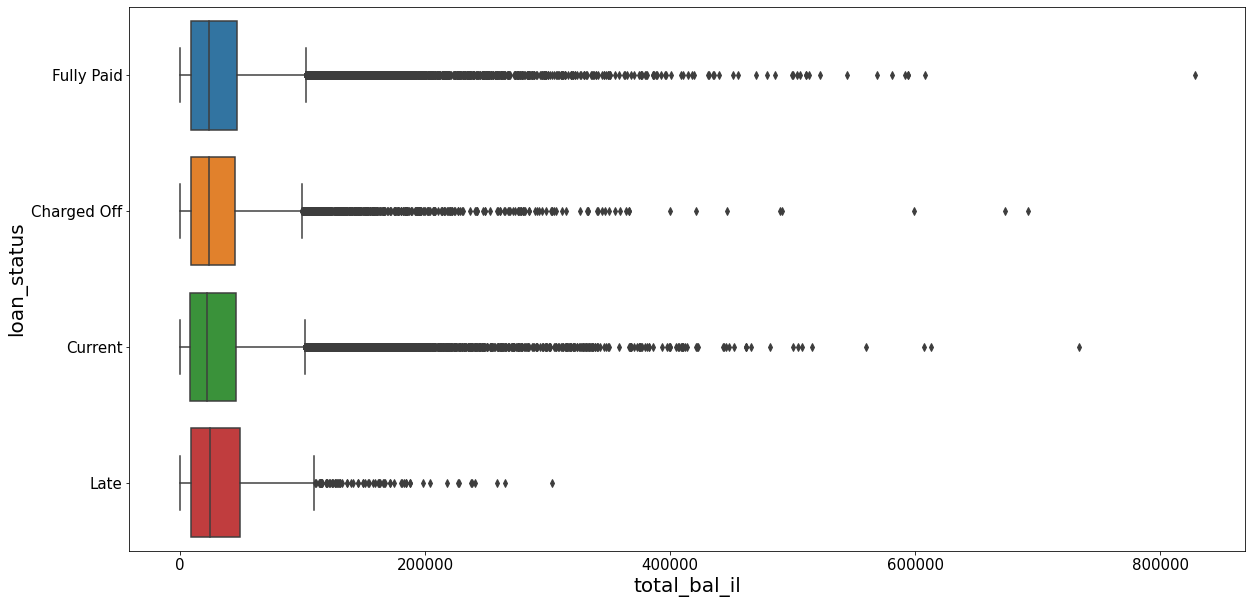

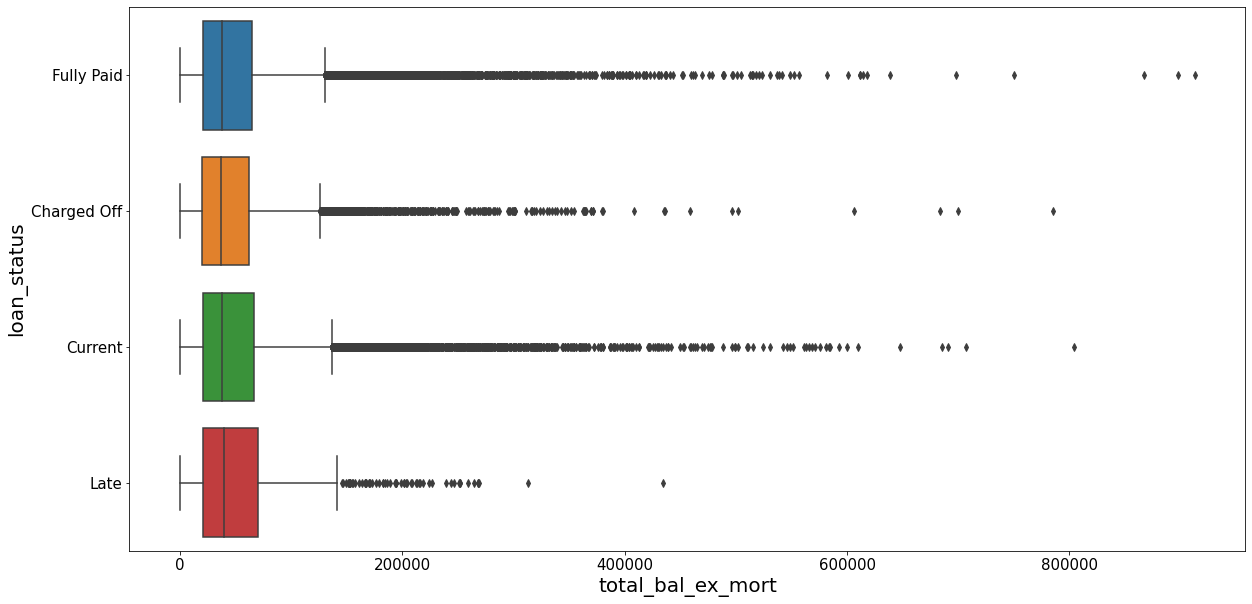

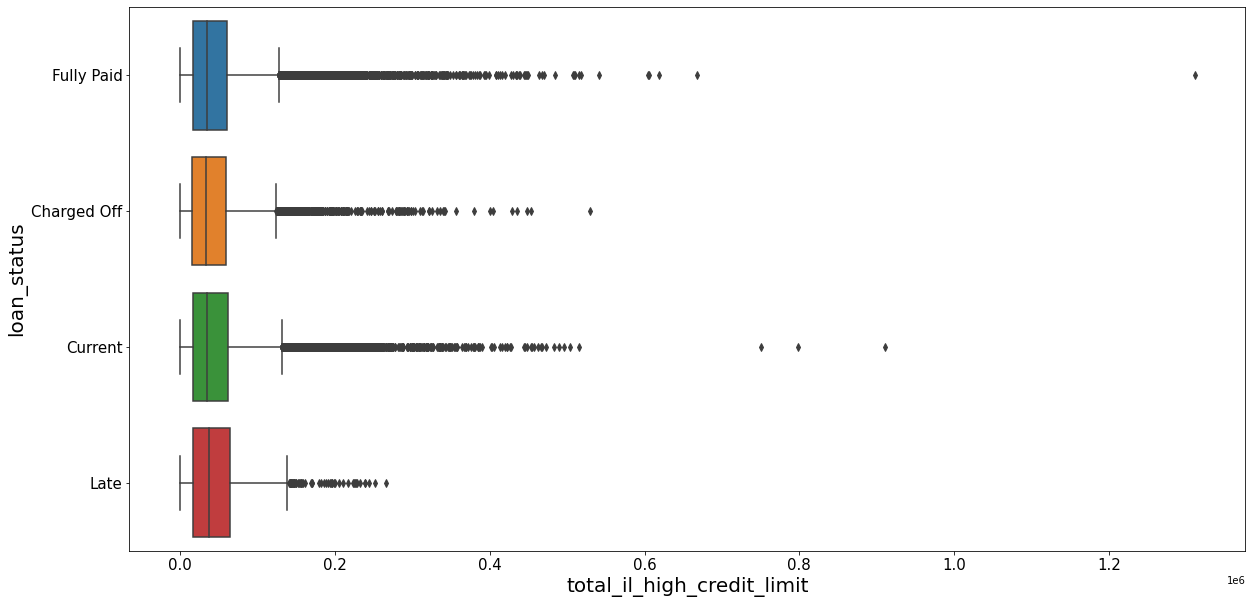

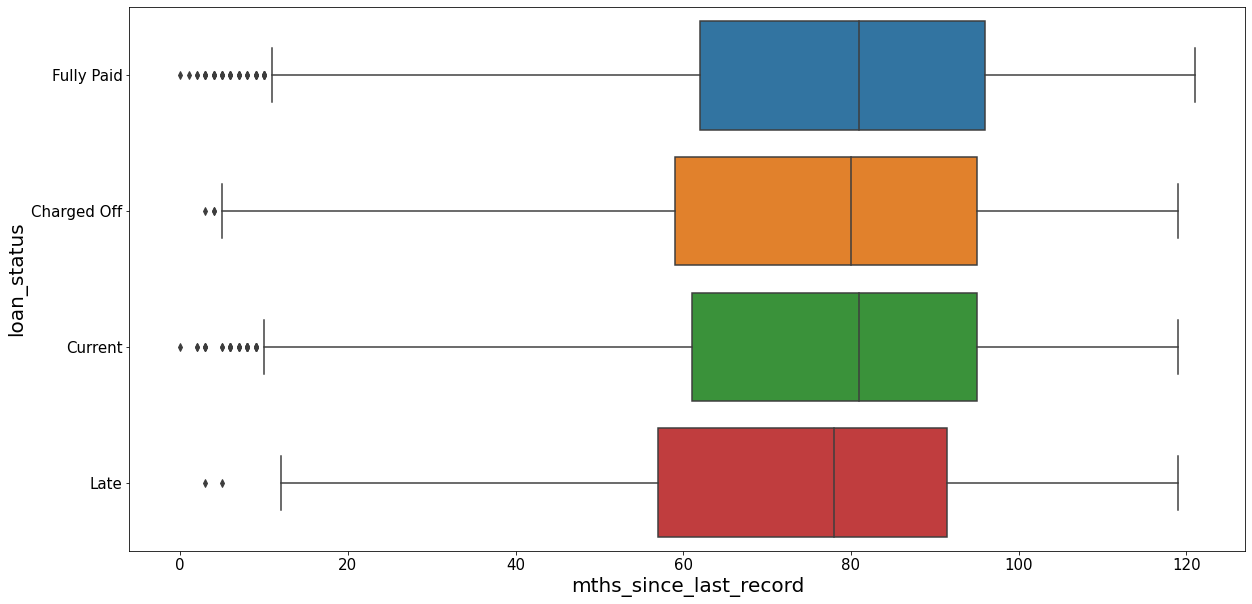

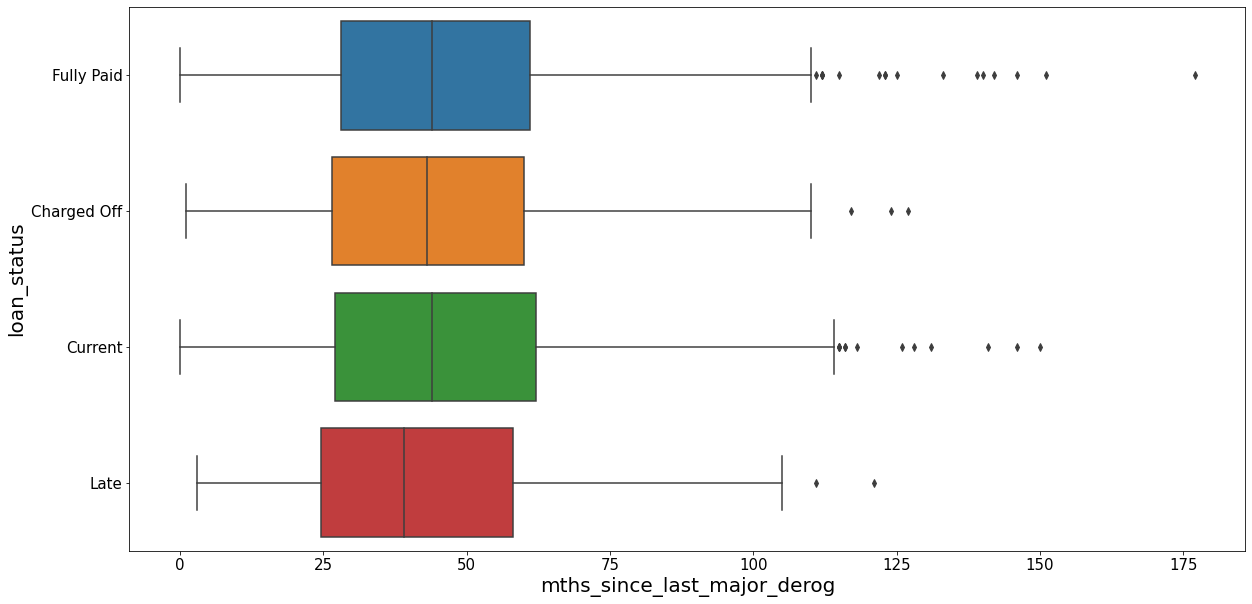

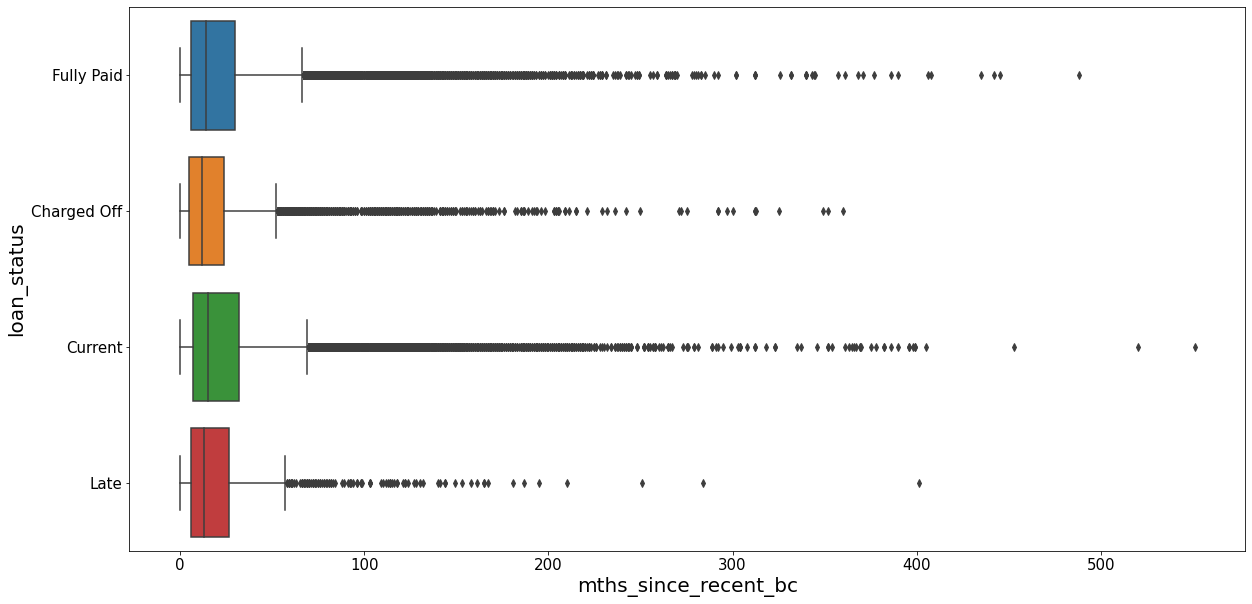

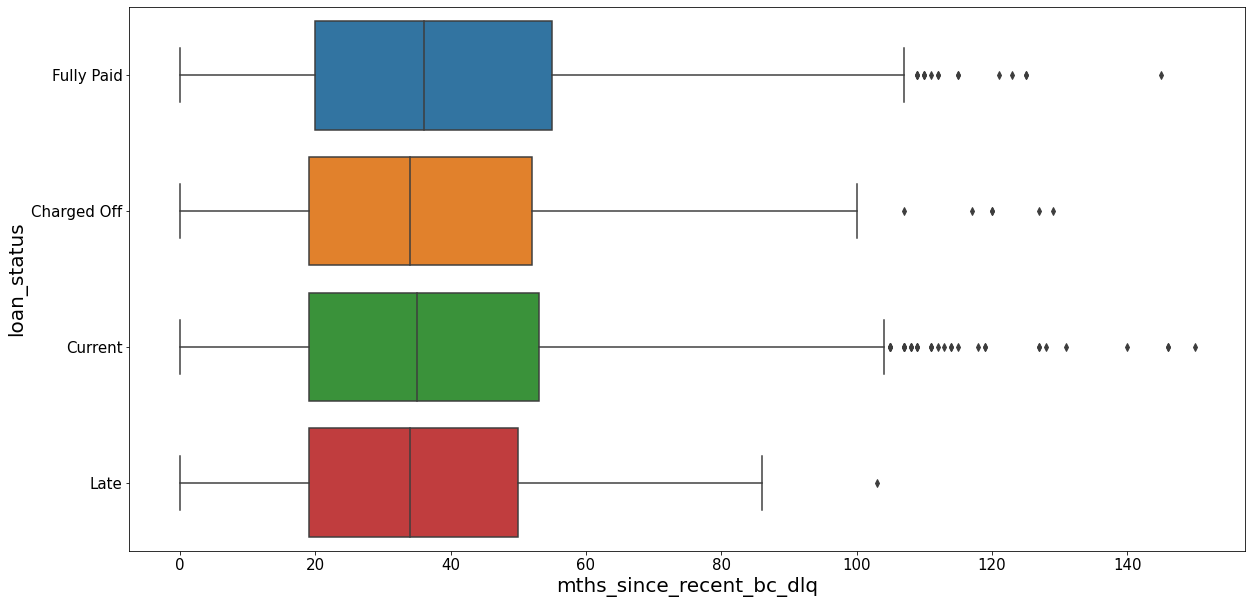

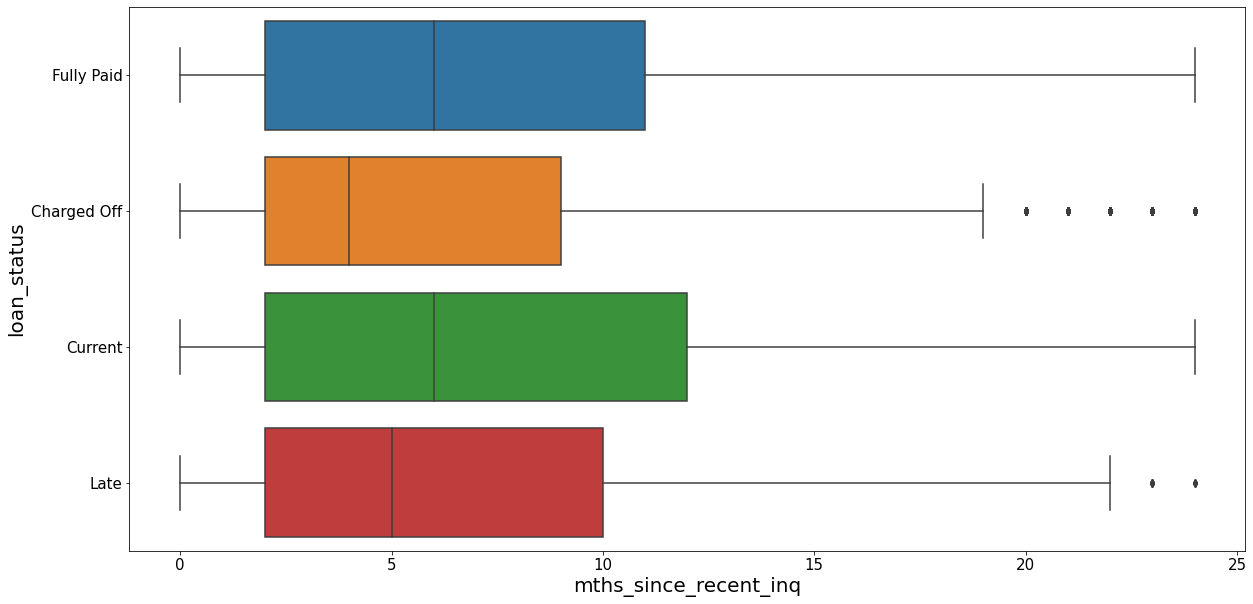

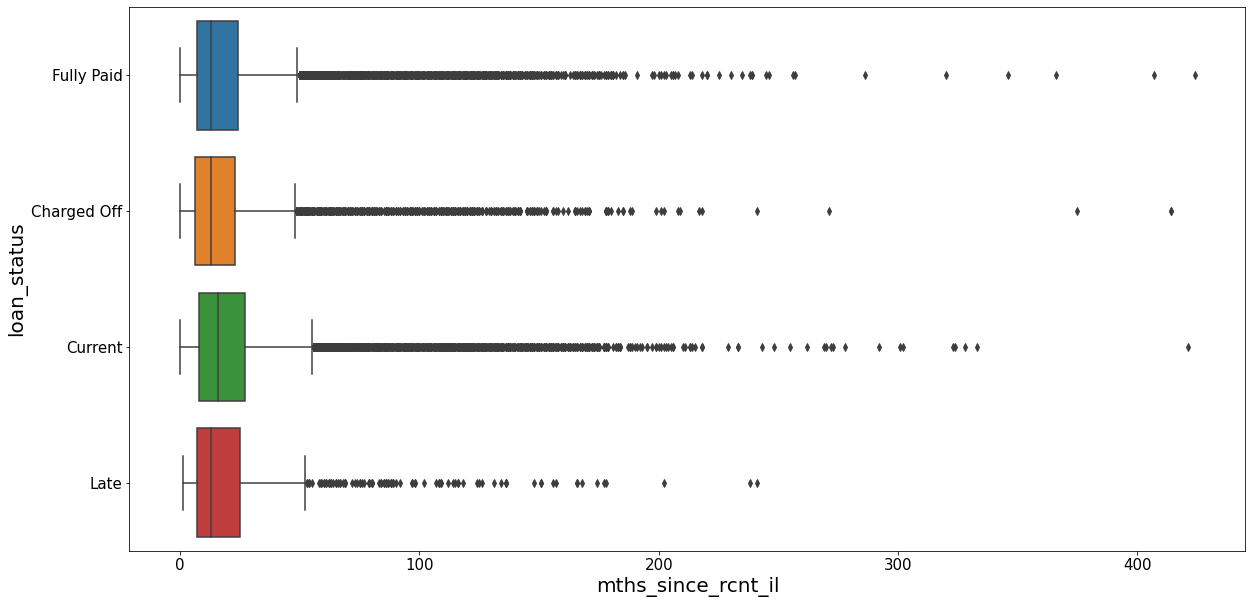

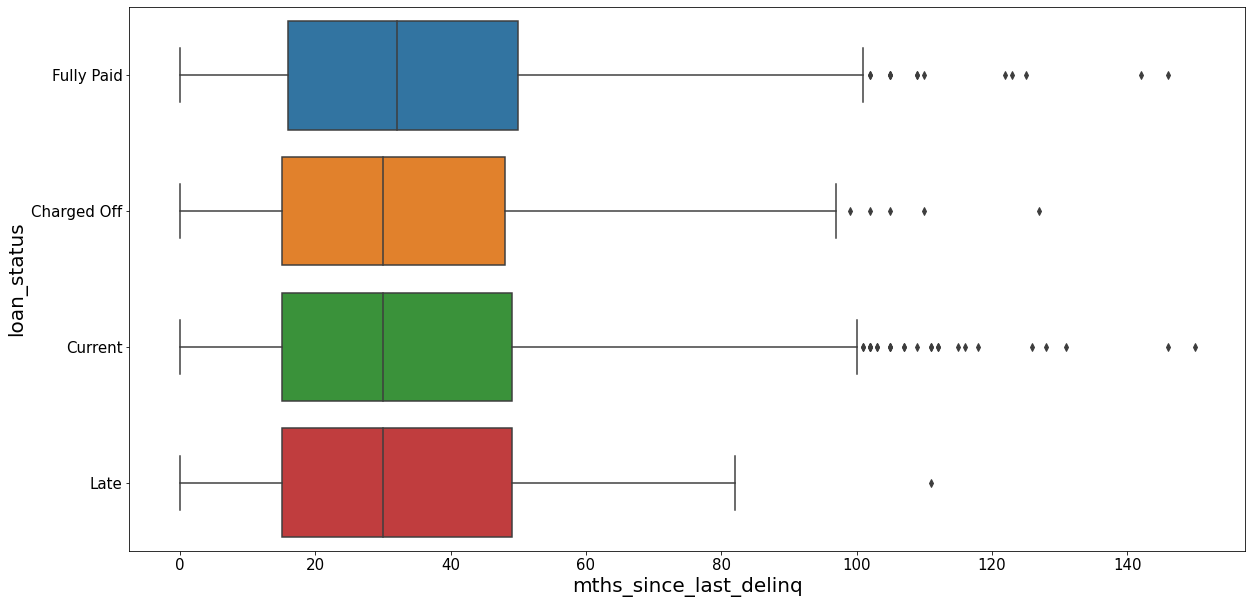

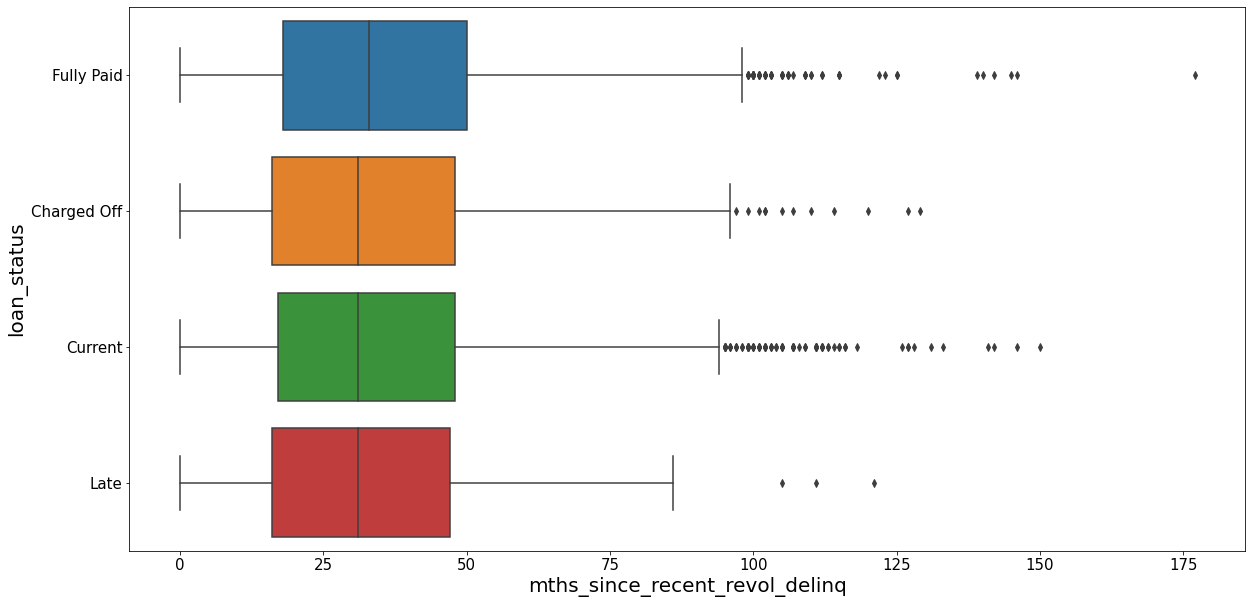

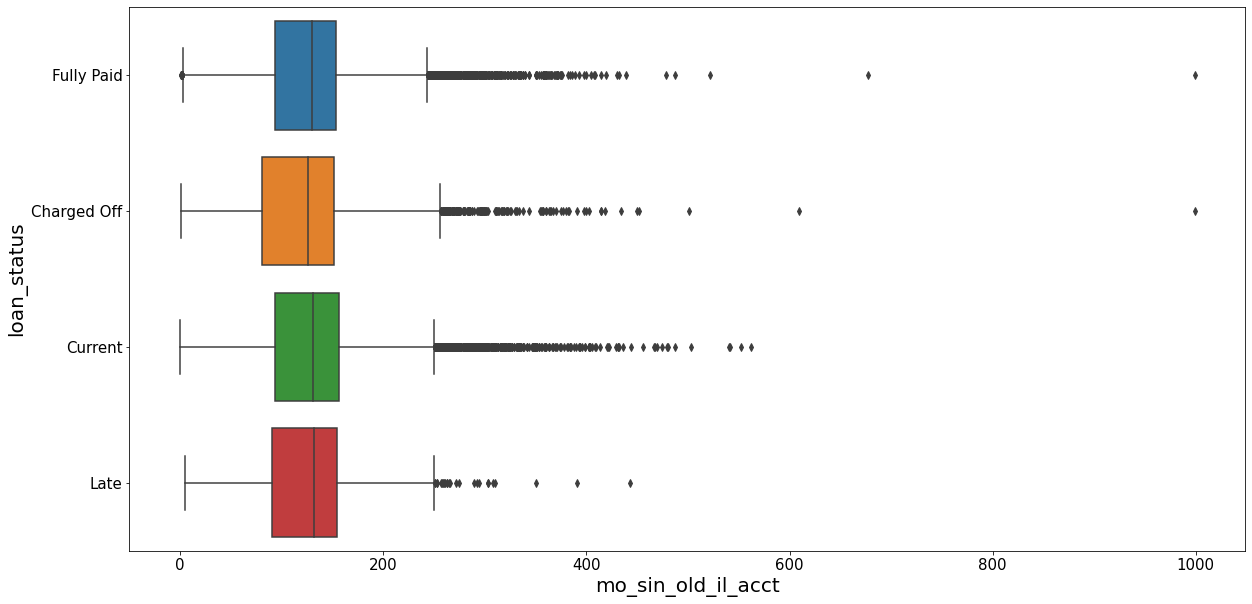

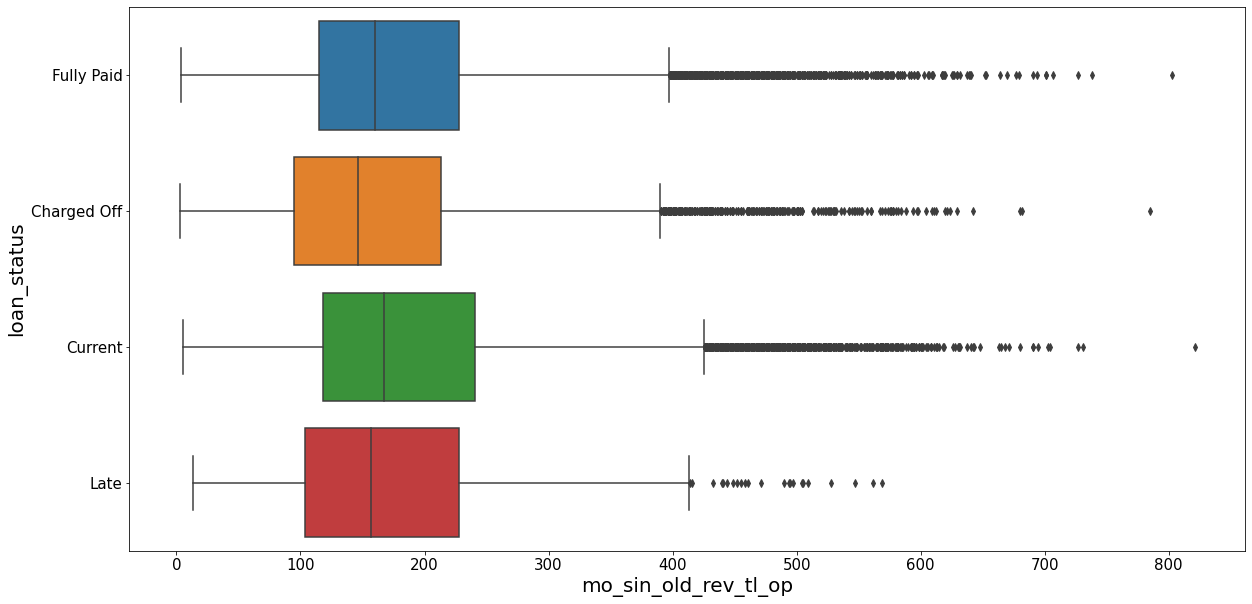

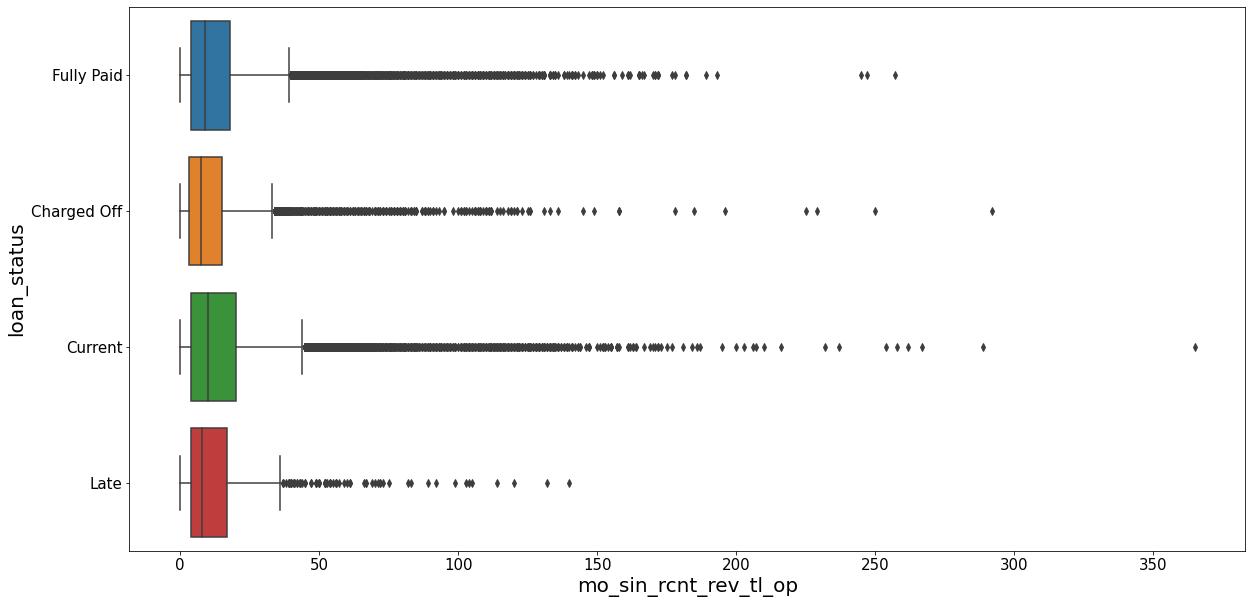

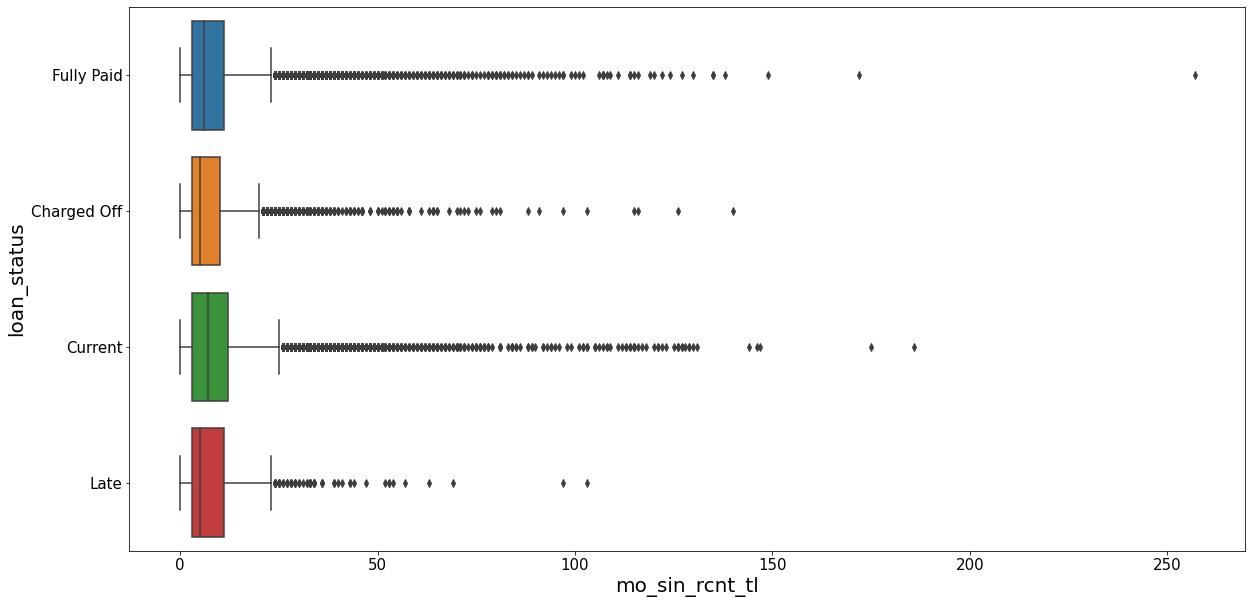

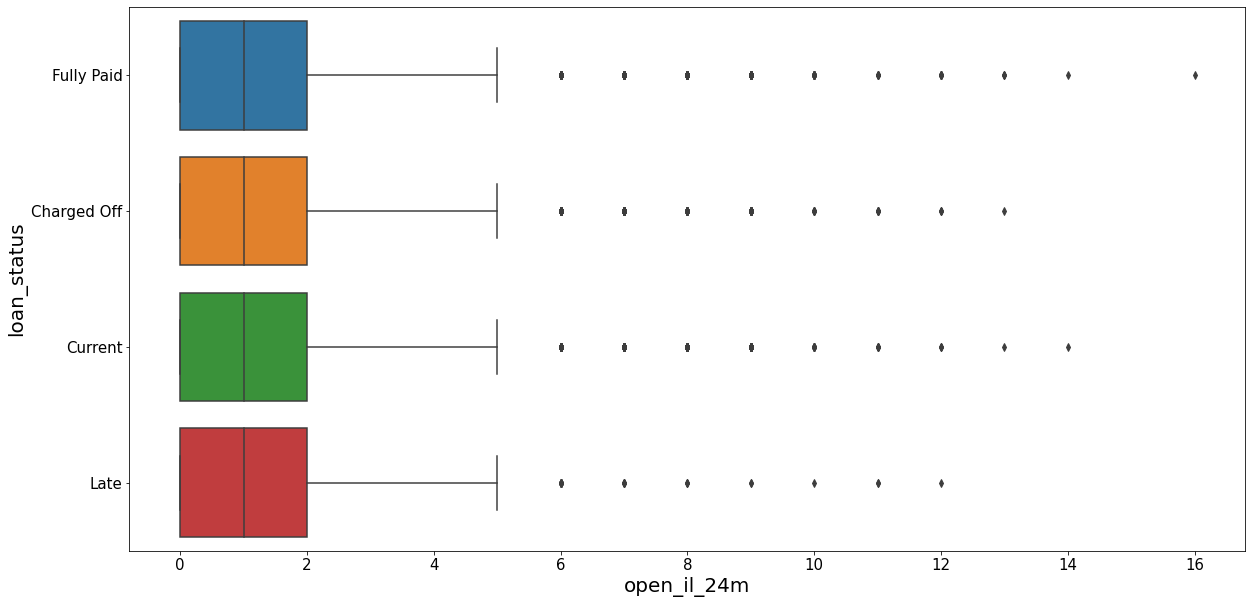

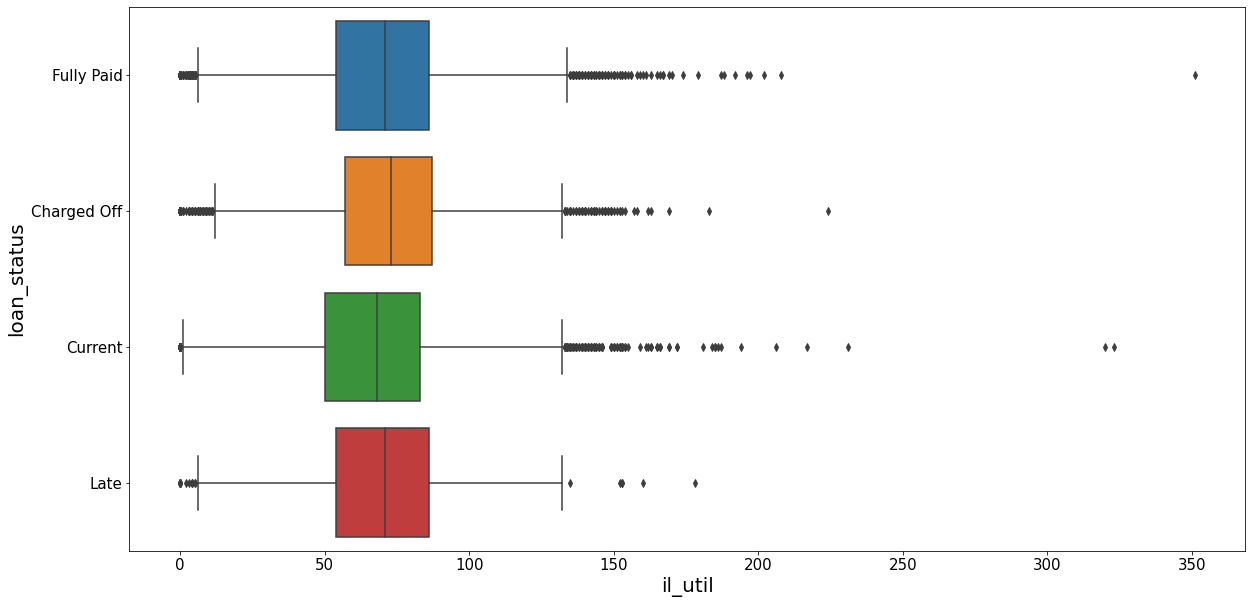

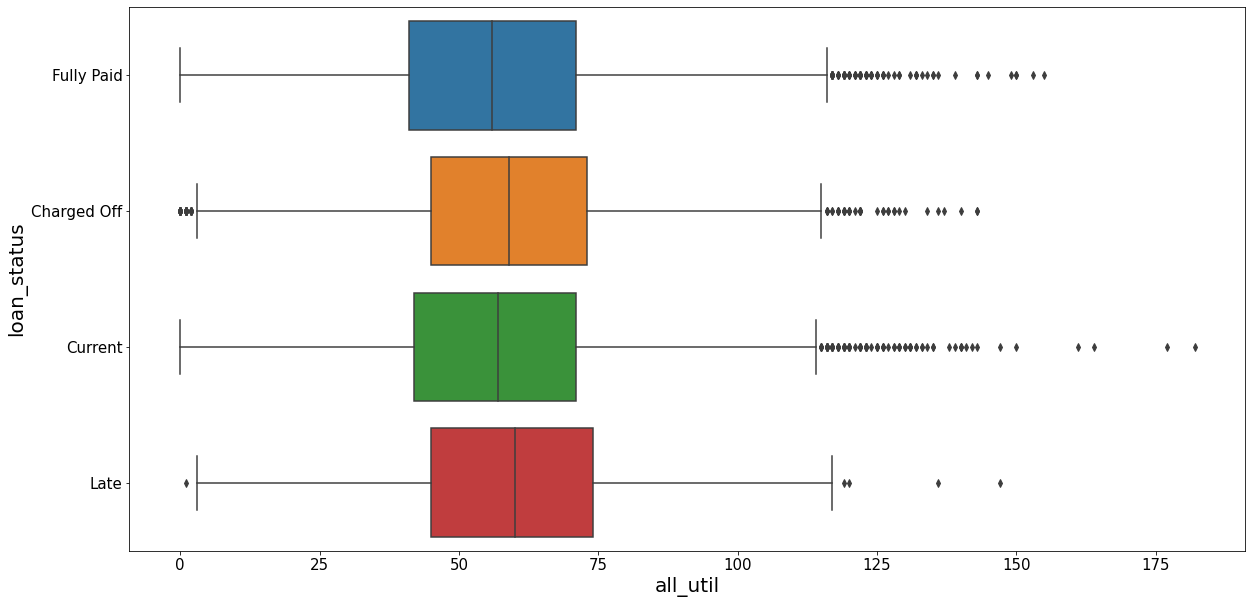

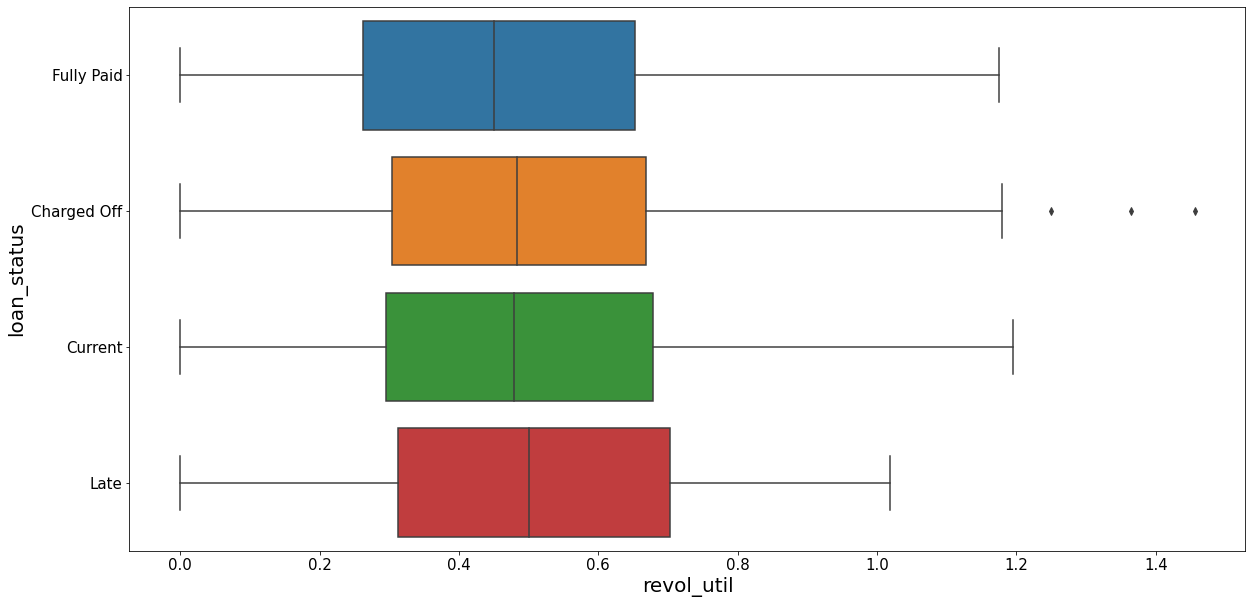

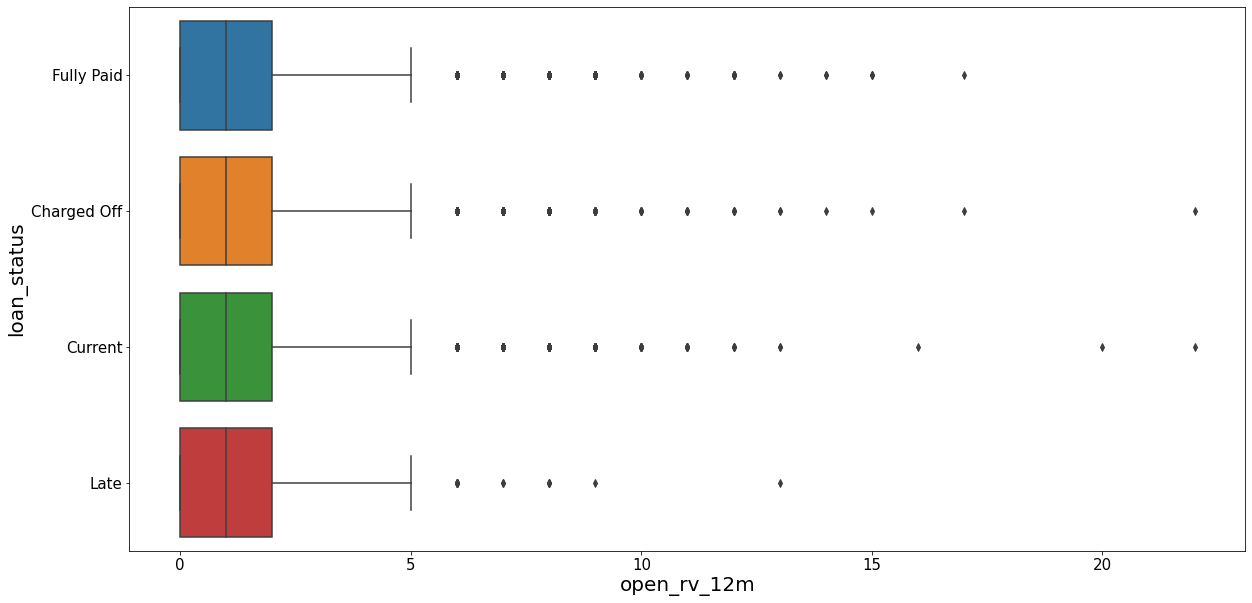

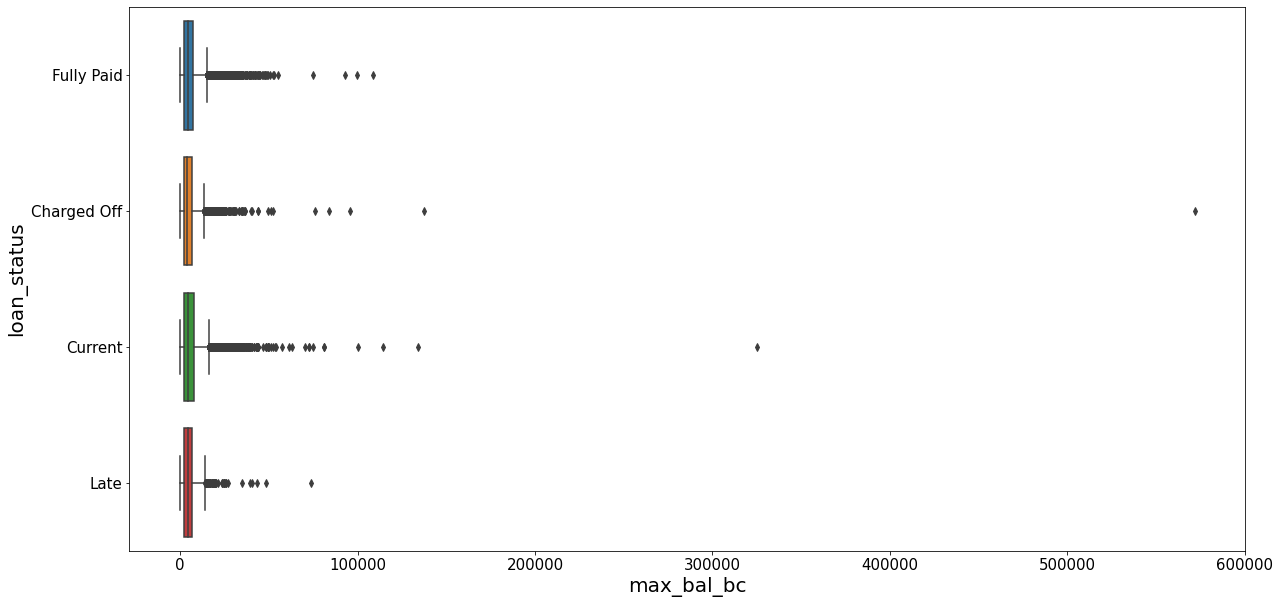

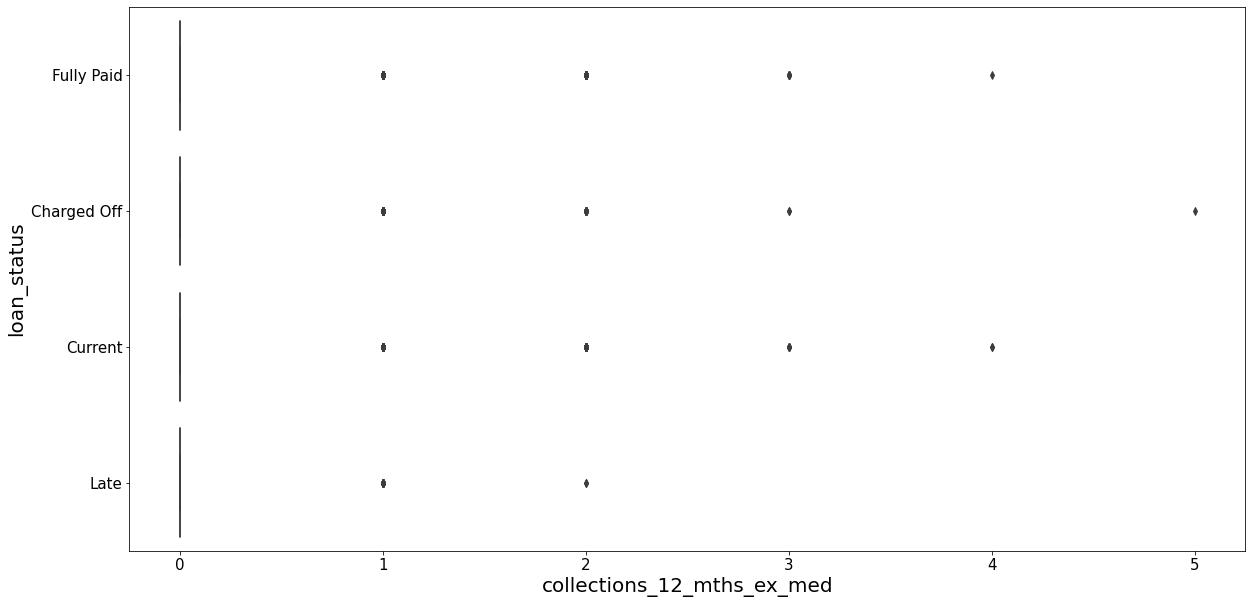

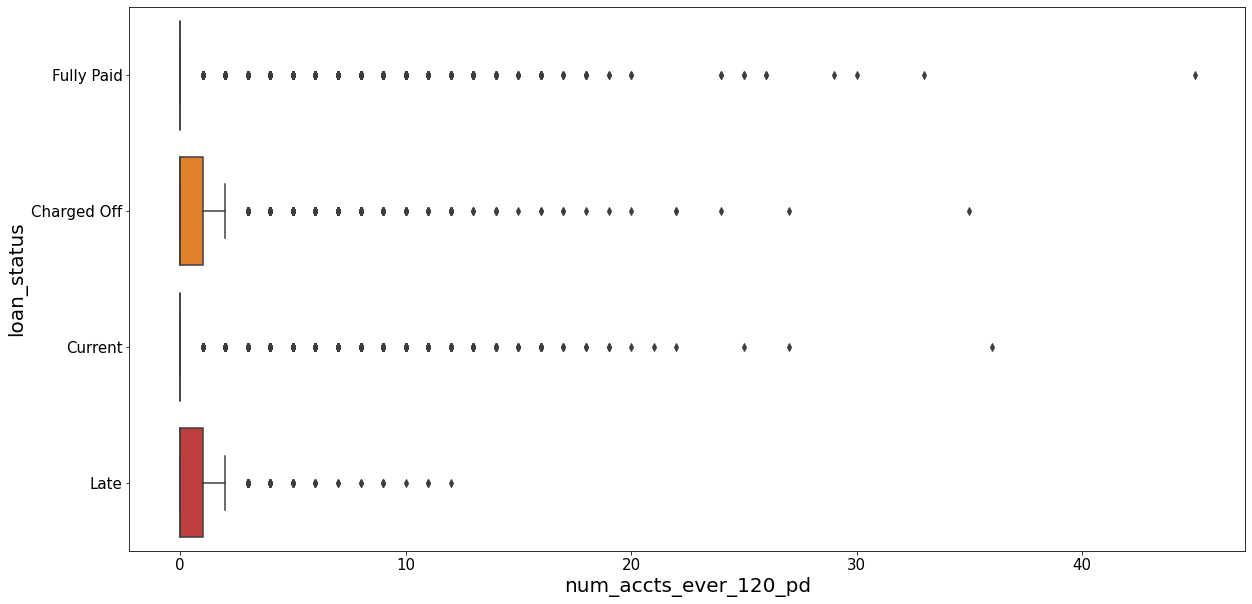

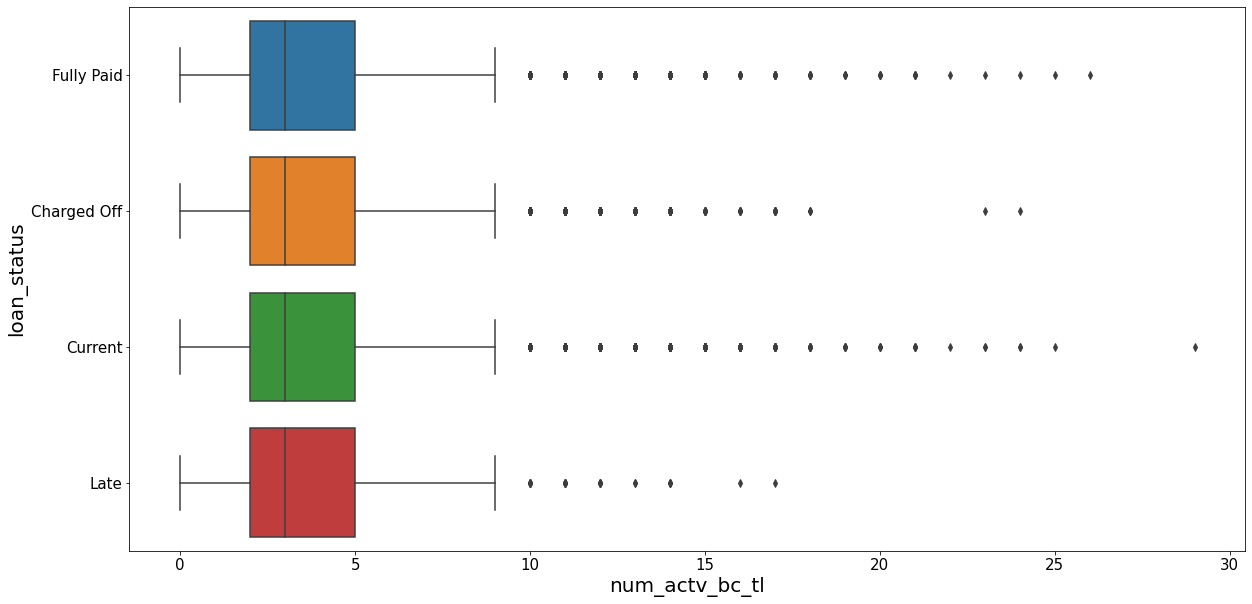

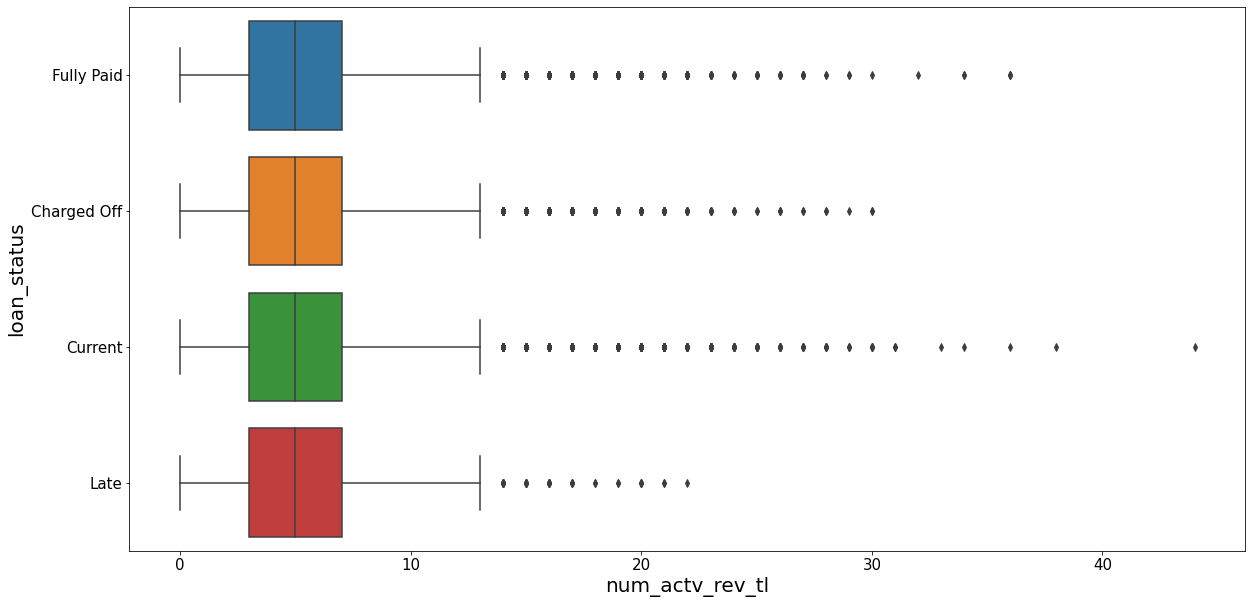

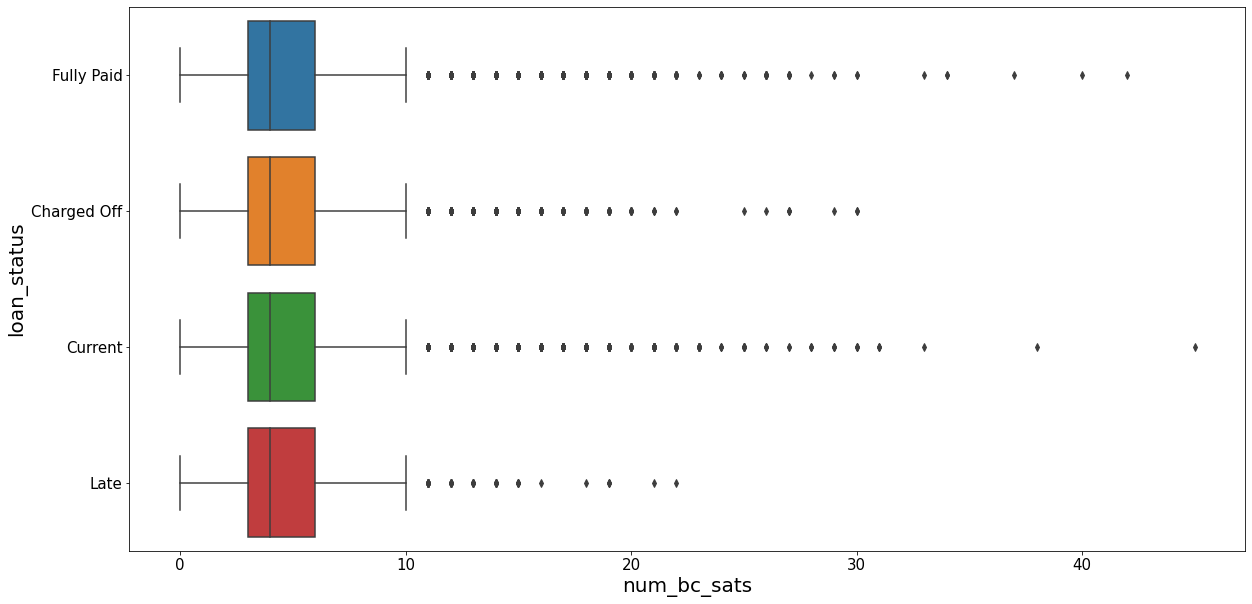

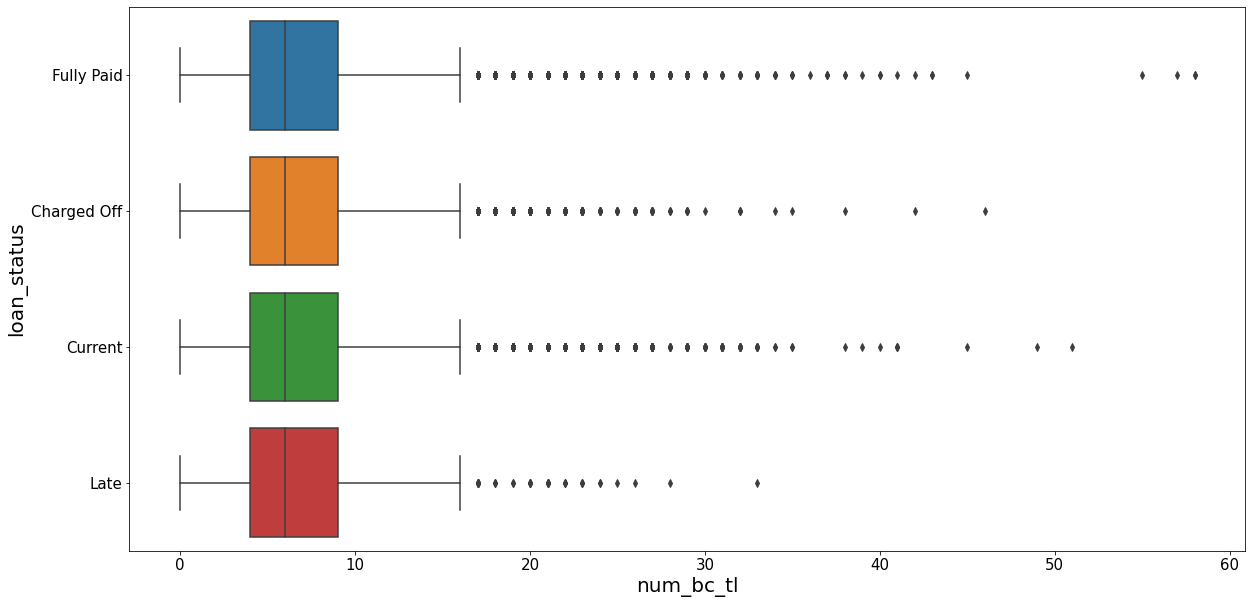

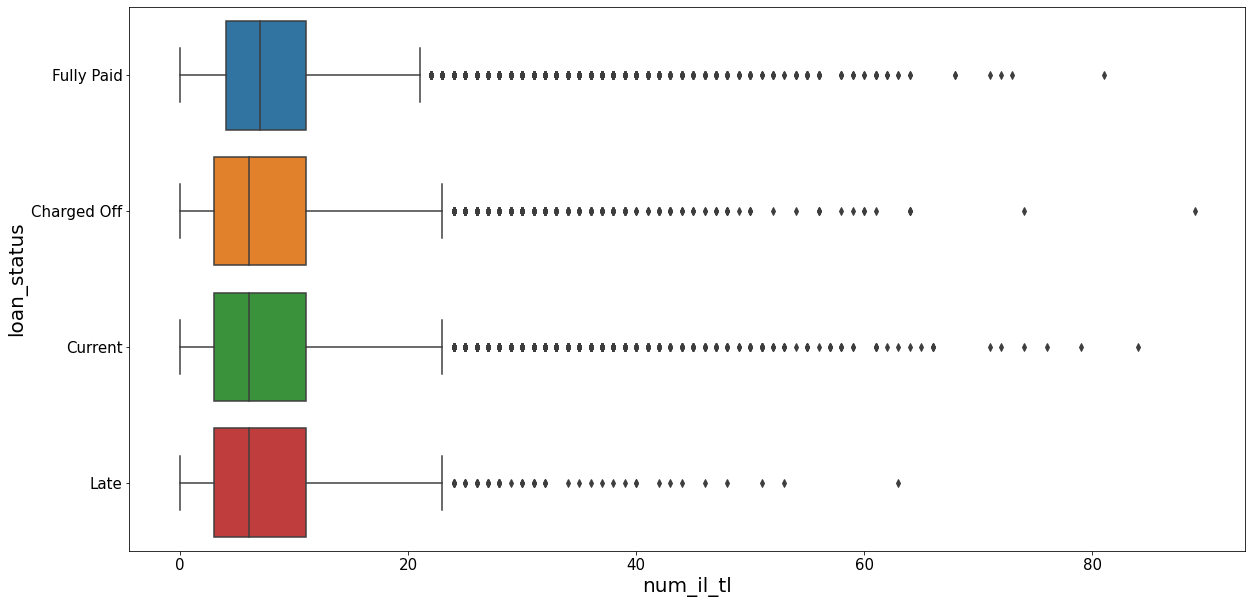

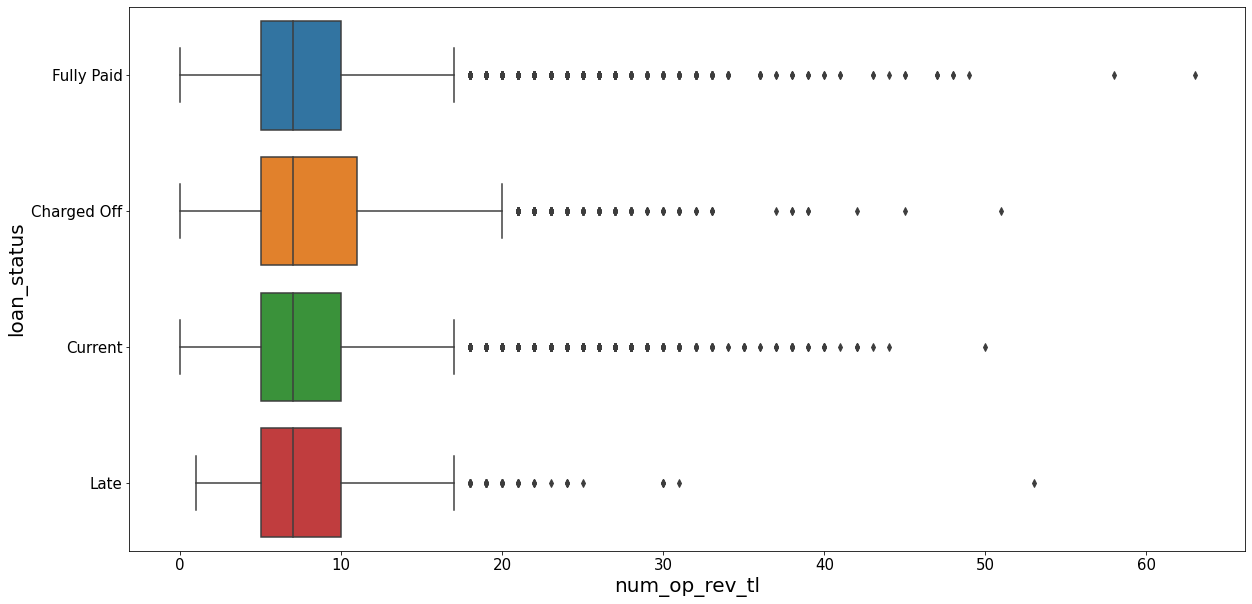

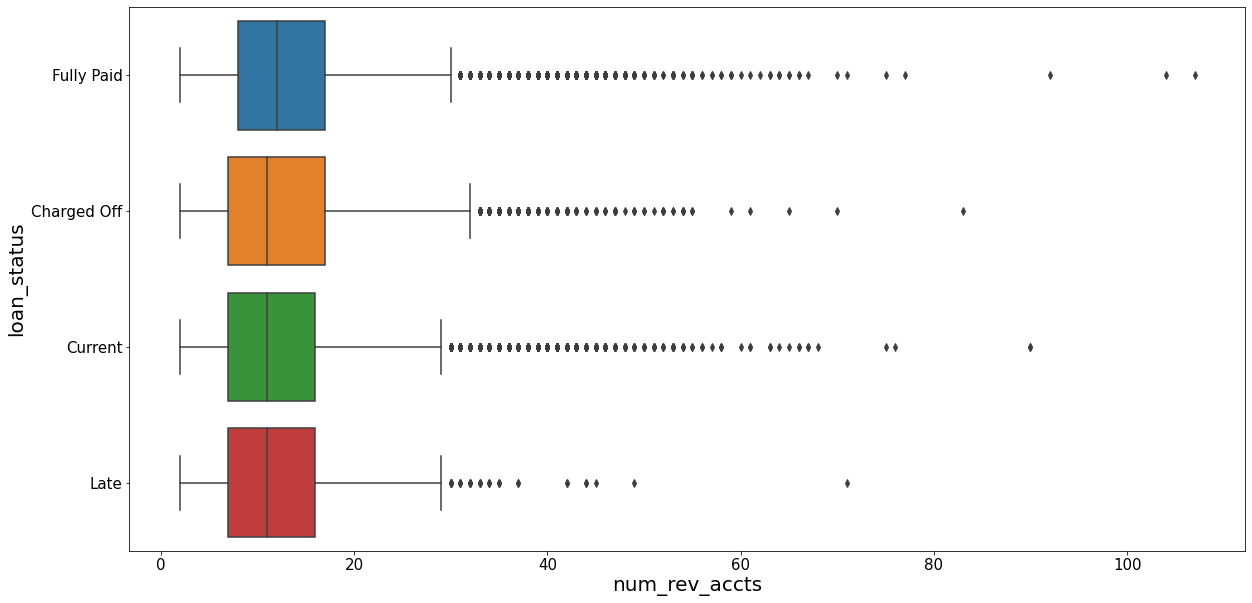

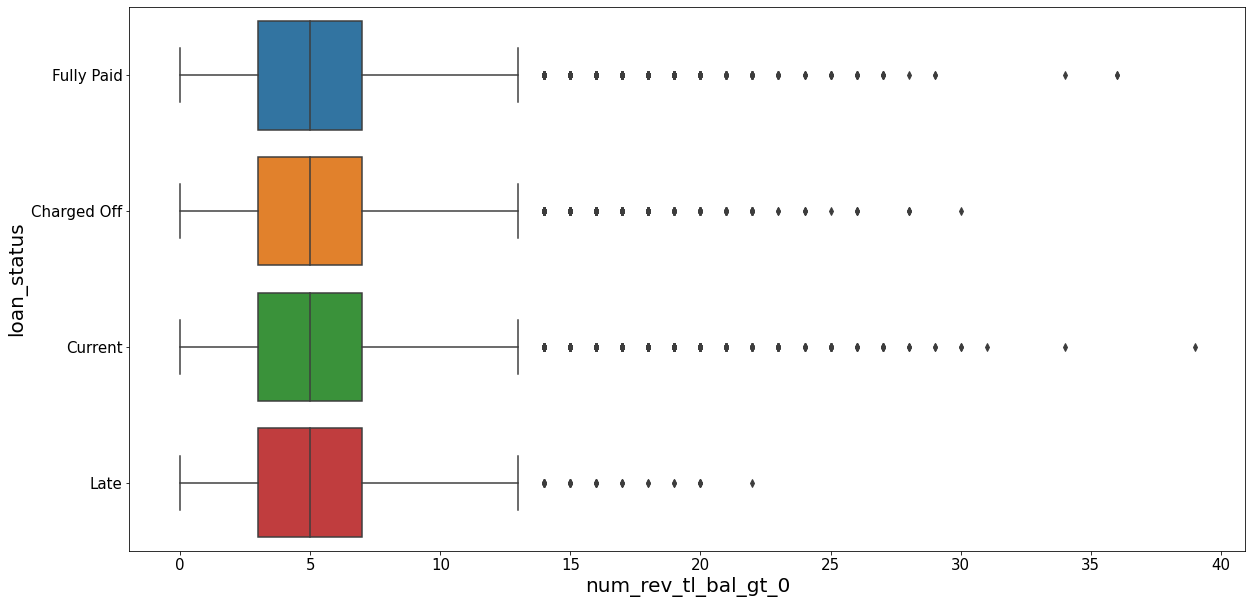

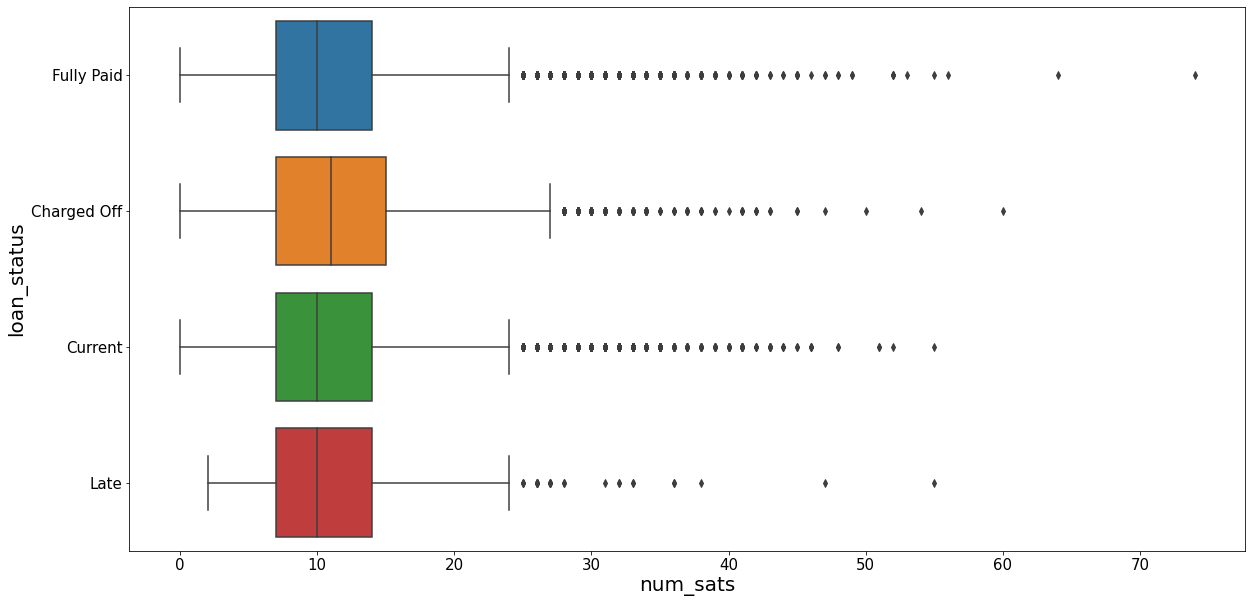

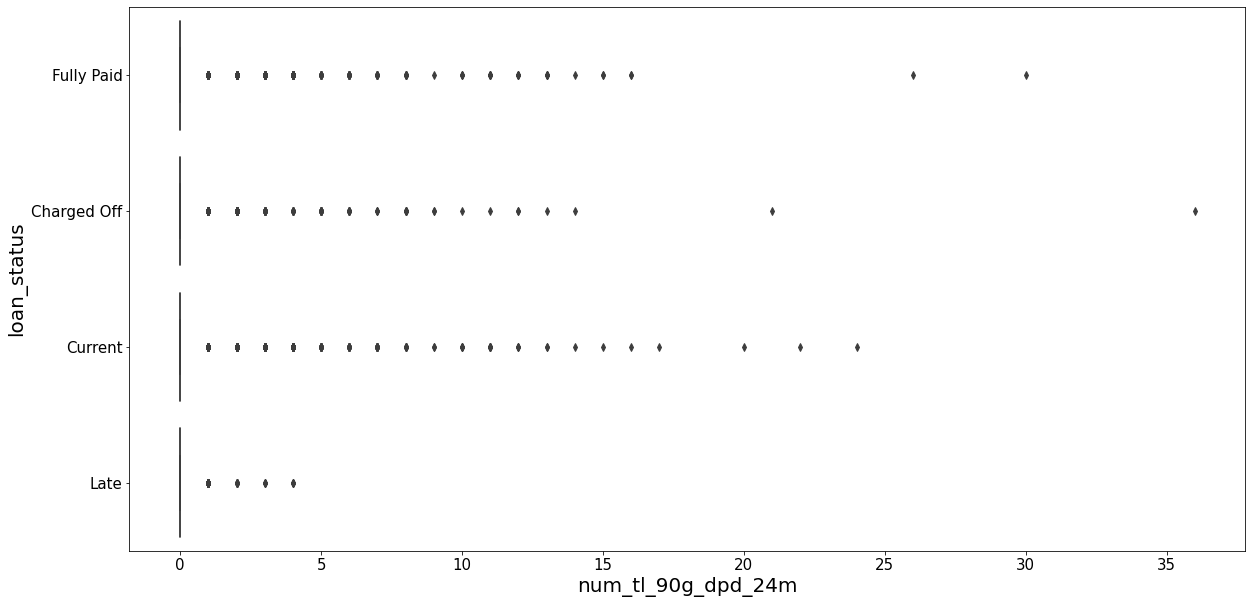

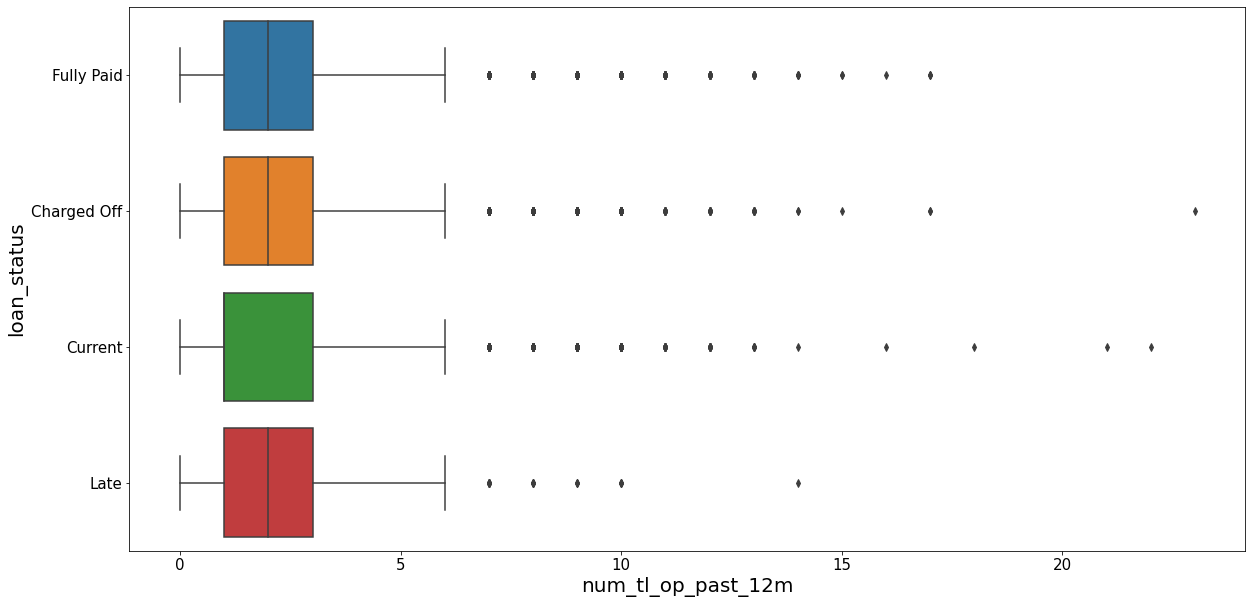

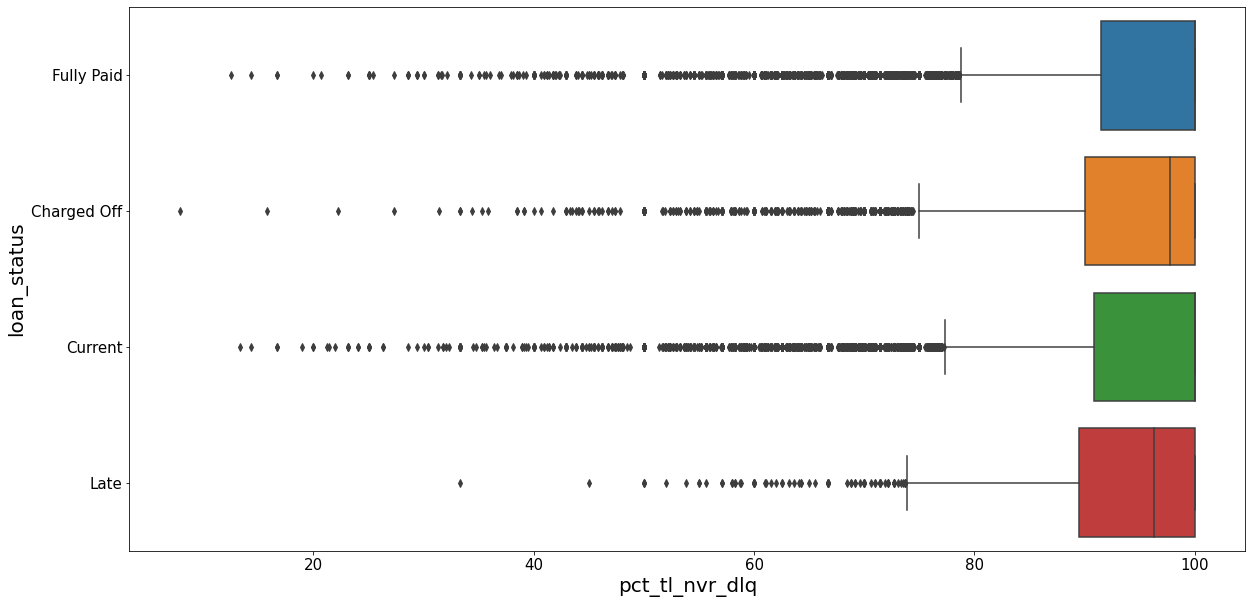

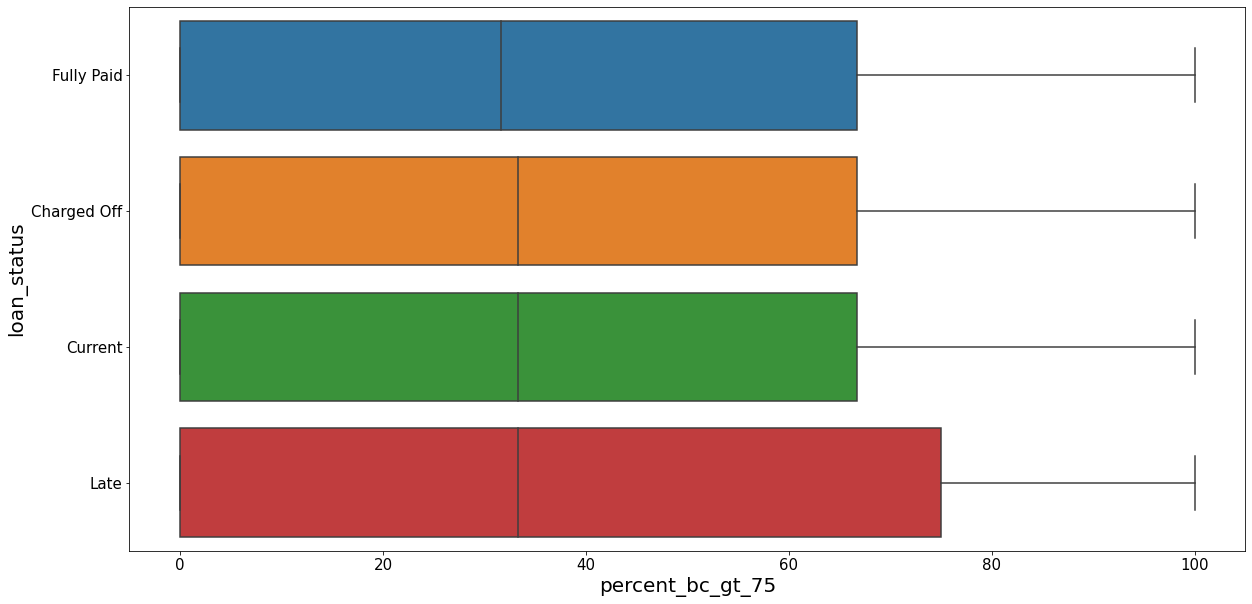

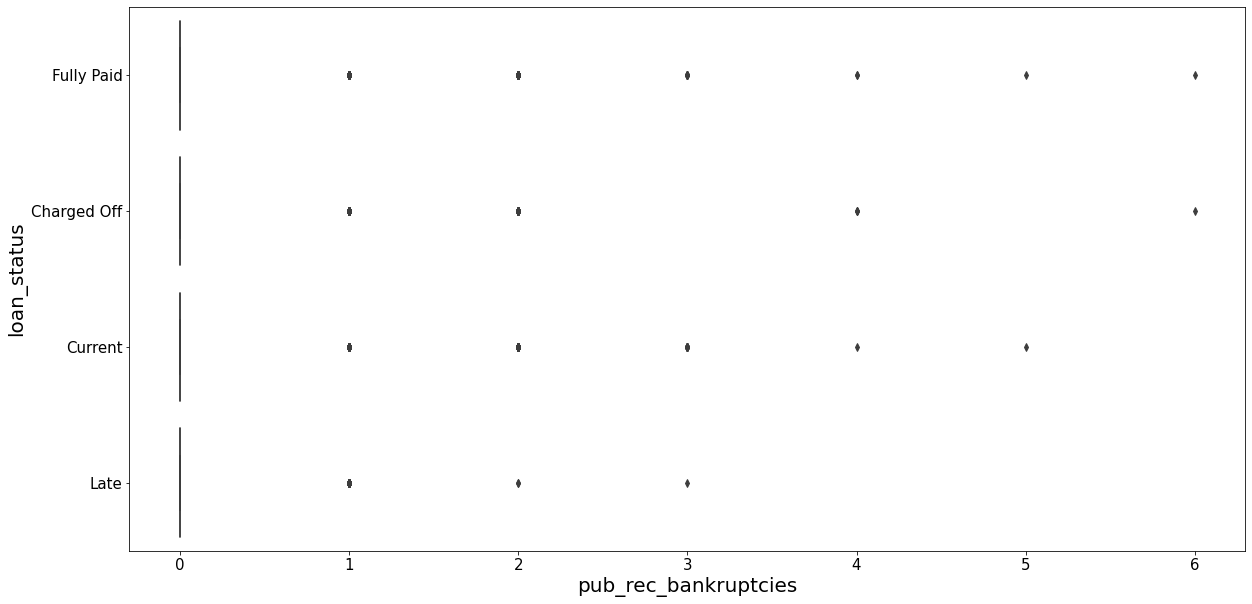

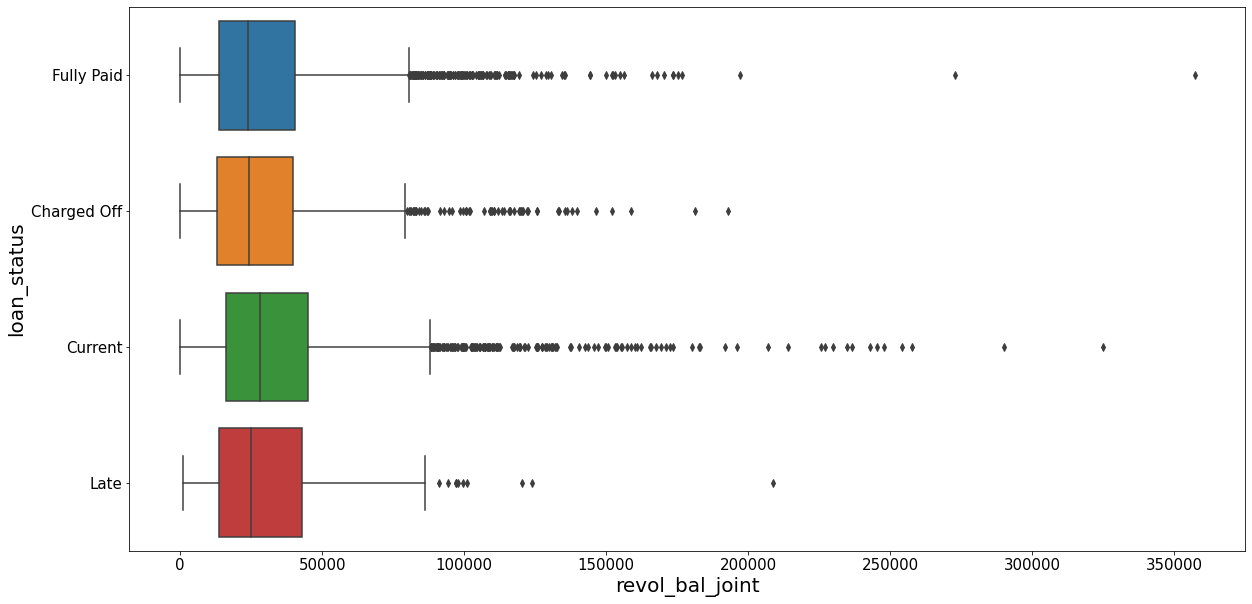

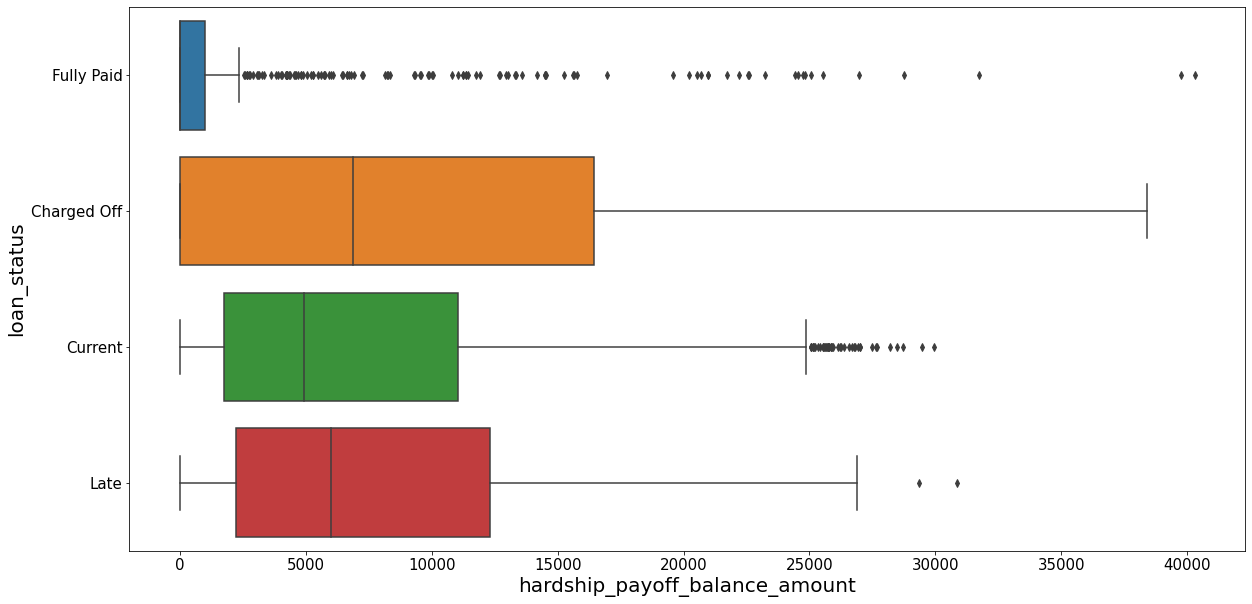

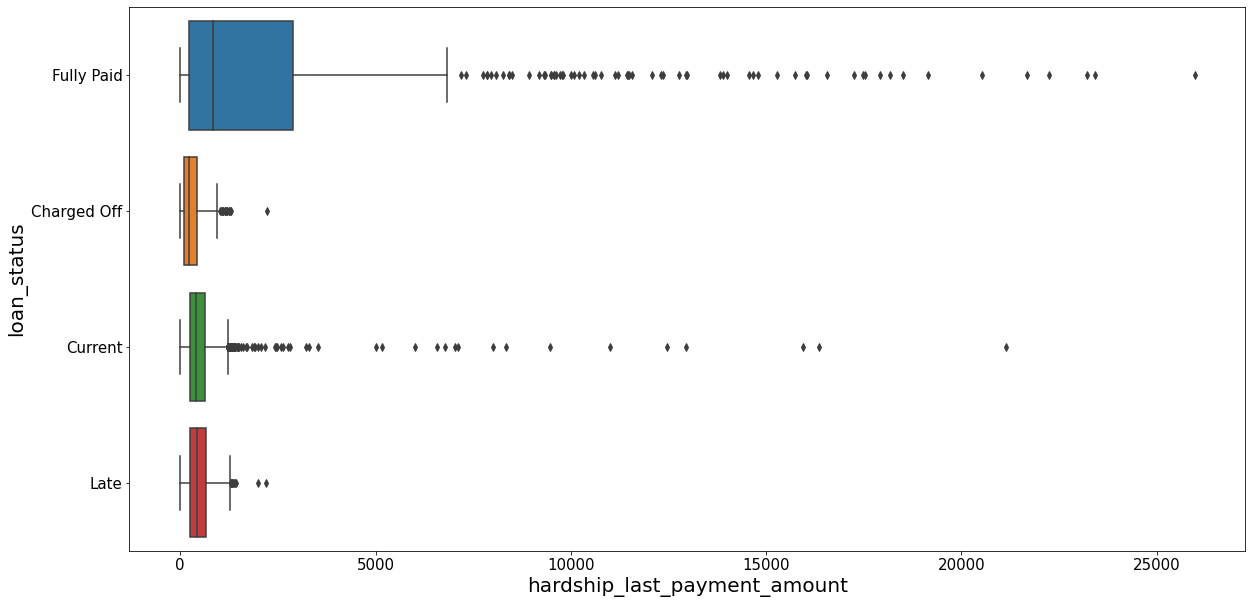

In [11]:
for i in cont_cols:
    plt.subplots(figsize=(20, 10))
    a = sns.boxplot(x=i, y="loan_status", data=insurance_data_full)
    a.set_xlabel(i, fontsize=20)
    a.set_ylabel("loan_status", fontsize=20)
    a.tick_params(labelsize=15)
    plt.show()

In [12]:
insurance_data[cont_cols].describe()

id     loan_amnt      int_rate   installment    annual_inc  \
count  7.715900e+04  77159.000000  77159.000000  77159.000000  7.715900e+04   
mean   1.152632e+08  15156.519978      0.131401    443.024291  7.836316e+04   
std    2.033129e+07   9749.195616      0.051024    279.917146  8.492549e+04   
min    1.227221e+06   1000.000000      0.053200      7.610000  0.000000e+00   
25%    1.141658e+08   7800.000000      0.099300    239.520000  4.500000e+04   
50%    1.178768e+08  12175.000000      0.126200    368.900000  6.500000e+04   
75%    1.248023e+08  20000.000000      0.160200    591.285000  9.400000e+04   
max    1.264174e+08  40000.000000      0.309900   1717.630000  1.099920e+07   

       annual_inc_joint           dti    dti_joint   delinq_2yrs  \
count      9.382000e+03  77051.000000  9382.000000  77159.000000   
mean       1.200300e+05     19.690700    19.616616      0.321012   
std        6.042086e+04     21.589715     7.643524      0.932101   
min        1.580100e+04      0.000000     0.000000      0.000000   
25%        8.300000e+04     11.960000    14.030000      0.000000   
50%        1.091670e+05     18.080000    19.300000      0.000000   
75%        1.430000e+05     25.010000    24.917500      0.000000   
max        1.058000e+06    999.000000    39.970000     36.000000   

             inq_fi  inq_last_12m  inq_last_6mths  fico_range_low  \
count  74664.000000  74664.000000    77159.000000    77159.000000   
mean       0.967709      1.943641        0.497635      701.786247   
std        1.431024      2.257943        0.792988       34.730335   
min        0.000000      0.000000        0.000000      660.000000   
25%        0.000000      0.000000        0.000000      675.000000   
50%        0.000000      1.000000        0.000000      695.000000   
75%        1.000000      3.000000        1.000000      720.000000   
max       21.000000     35.000000        6.000000      845.000000   

       fico_range_high  last_fico_range_high  last_fico_range_low  \
count     77159.000000          77159.000000         77159.000000   
mean        705.786558            689.304255           676.649840   
std          34.731622             75.789653           115.094757   
min         664.000000              0.000000             0.000000   
25%         679.000000            654.000000           650.000000   
50%         699.000000            699.000000           695.000000   
75%         724.000000            739.000000           735.000000   
max         850.000000            850.000000           845.000000   

           mort_acc      open_acc   open_acc_6m  acc_open_past_24mths  \
count  77159.000000  77159.000000  74664.000000          77159.000000   
mean       1.368123     11.469641      0.876232              4.362809   
std        1.759040      5.757780      1.088759              3.106743   
min        0.000000      0.000000      0.000000              0.000000   
25%        0.000000      7.000000      0.000000              2.000000   
50%        1.000000     10.000000      1.000000              4.000000   
75%        2.000000     14.000000      1.000000              6.000000   
max       94.000000     74.000000     10.000000             35.000000   

            pub_rec     total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  77159.000000  77159.000000  77159.000000   77159.000000  77159.000000   
mean       0.171581     22.801475   2378.177021    2377.853405  14781.449880   
std        0.511936     11.772159   4784.588070    4784.478934  10340.568269   
min        0.000000      2.000000      0.000000       0.000000    255.560000   
25%        0.000000     14.000000      0.000000       0.000000   7068.769673   
50%        0.000000     21.000000      0.000000       0.000000  11827.815834   
75%        0.000000     29.000000   1865.490000    1863.815000  19882.555000   
max       44.000000    136.000000  29075.050000   29075.050000  67130.850000   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_lat

In [13]:
insurance_data[cat_cols].describe()

emp_title application_type home_ownership loan_status       term  \
count      71297            77159          77159       77159      77159   
unique     28185                2              5           4          2   
top      Teacher       Individual       MORTGAGE  Fully Paid  36 months   
freq        1658            67777          37334       34289      52800   

        grade verification_status verification_status_joint pymnt_plan  \
count   77159               77159                      9379      77159   
unique      7                   3                         3          1   
top         C     Source Verified              Not Verified          n   
freq    25152               28886                      4064      77159   

                   purpose hardship_flag hardship_reason hardship_type  \
count                77159         75532            4491          4491   
unique                  13             2              17             6   
top     debt_consolidation             N      INCOMECURT     CVD19SKIP   
freq                 42980         71962            2614          3906   

       hardship_status initial_list_status  
count             4491               77159  
unique               4                   2  
top             ACTIVE                   w  
freq              3570               61477

In [14]:
insurance_data[date_cols].describe(datetime_is_numeric=True)

earliest_cr_line                        issue_d  \
count                          77159                          77159   
mean   2001-02-09 20:08:21.468396288  2017-07-21 20:20:30.435853312   
min              1934-04-01 00:00:00            2013-02-01 00:00:00   
25%              1997-01-01 00:00:00            2017-08-01 00:00:00   
50%              2002-10-01 00:00:00            2017-09-01 00:00:00   
75%              2006-06-01 00:00:00            2017-11-01 00:00:00   
max              2014-11-01 00:00:00            2017-12-01 00:00:00   

                        last_pymnt_d                   next_pymnt_d  \
count                          77159                          33256   
mean   2019-09-11 23:05:50.440000512  2020-06-05 06:27:01.169112320   
min              2018-05-01 00:00:00            2020-02-01 00:00:00   
25%              2019-01-01 00:00:00            2020-06-01 00:00:00   
50%              2020-01-01 00:00:00            2020-06-01 00:00:00   
75%              2020-05-01 00:00:00            2020-06-01 00:00:00   
max              2020-08-01 00:00:00            2020-10-01 00:00:00   

             payment_plan_start_date  
count                           4491  
mean   2020-02-10 05:25:27.054108160  
min              2017-06-01 00:00:00  
25%              2020-04-01 00:00:00  
50%              2020-04-01 00:00:00  
75%              2020-05-01 00:00:00  
max              2020-07-01 00:00:00

In [15]:
#drop all datetime features
insurance_data = insurance_data.drop(date_cols, axis = 1)

In [16]:
#create single hardship feature and remove the rest
insurance_data['hardship_status'] = insurance_data['hardship_status'].replace([np.nan,'COMPLETED', 'COMPLETE', 'BROKEN', 'ACTIVE'],[0,1,1,1,1])
insurance_data = insurance_data.drop(['hardship_flag', 'hardship_reason', 'hardship_type', 'deferral_term', 'hardship_amount', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'orig_projected_additional_accrued_interest'], axis = 1)

In [17]:
#remove all pieces of data from accounts opened less than 6 months ago 
#as there is a lot of missing data for these and not necessarily useful to know if they are likely to fail
insurance_data = insurance_data.dropna( how='any', subset=['open_acc_6m'])

In [18]:
#create new features to take joint option if available and drop the 2 columns this value is derived from
#nb revol bal joint is dropped
insurance_data['dti_new'] = insurance_data['dti_joint'].mask(pd.isnull, insurance_data['dti'])
insurance_data['annual_inc_new'] = insurance_data['annual_inc_joint'].mask(pd.isnull, insurance_data['annual_inc'])
insurance_data['verification_status_new'] = insurance_data['verification_status_joint'].mask(pd.isnull, insurance_data['verification_status'])
joint_list = ['dti', 'dti_joint', 'annual_inc', 'annual_inc_joint', 'verification_status', 'verification_status_joint', 'revol_bal_joint']
insurance_data = insurance_data.drop(joint_list, axis = 1)

In [19]:
#create a list of variables with over 1000 missing values remaining.
#show variables that have missing values.
all_columns = list(insurance_data)
float_cols = []
cat_cols = []
date_cols = []
int_cols = []
cont_cols = []
for col in all_columns:
    if insurance_data[col].dtype == 'int64':
        int_cols.append(col)
        cont_cols.append(col)
    elif insurance_data[col].dtype == 'float64':
        float_cols.append(col)
        cont_cols.append(col)
    elif insurance_data[col].dtype == 'object':
        cat_cols.append(col)
    elif insurance_data[col].dtype == 'datetime64[ns]':
        date_cols.append(col)

unique_ser = insurance_data[all_columns].nunique()
unique_ser.name = 'unique'
unique_df = unique_ser.to_frame()

dtype_ser = insurance_data[all_columns].dtypes
dtype_ser.name = 'dtype'
dtype_df = dtype_ser.to_frame()

null_ser = insurance_data[all_columns].isnull().sum()
null_ser.name = 'null'
null_df = null_ser.to_frame()

df1 = pd.merge(dtype_ser, null_ser, right_index = True, left_index = True)
sum_df = pd.merge(df1, unique_ser, right_index = True, left_index = True)

sum_df_2 = sum_df[(sum_df.null > 1000)]

cols_to_remove = list(sum_df_2.index)
cols_to_remove.remove('emp_title')

sum_df[(sum_df.null > 0)]


dtype   null  unique
emp_title                        object   5704   26576
mths_since_last_record          float64  63526     122
mths_since_last_major_derog     float64  55255     136
mths_since_recent_bc            float64   1035     337
mths_since_recent_bc_dlq        float64  57833     131
mths_since_recent_inq           float64   8887      25
mths_since_rcnt_il              float64   2384     254
mths_since_last_delinq          float64  38271     123
mths_since_recent_revol_delinq  float64  50077     137
mo_sin_old_il_acct              float64   2384     434
il_util                         float64  10767     193
bc_util                         float64   1141    1113
all_util                        float64     16     154
revol_util                      float64    102    1072
avg_cur_bal                     float64      7   30594
bc_open_to_buy                  float64   1103   29004
percent_bc_gt_75                float64   1106     140

In [20]:
#clean employment info to allow for label encoding
#replace null values in emp_title with 'unknown'
insurance_data['emp_title'] = insurance_data['emp_title'].replace([np.nan],'Unknown')
insurance_data['emp_title'].value_counts()
insurance_data['emp_title'] = insurance_data['emp_title'].replace(['owner'],'Business Owner')
insurance_data['emp_title'] = insurance_data['emp_title'].replace(['Owner'],'Business Owner')
insurance_data['emp_title'] = insurance_data['emp_title'].replace(['RN'],'Registered Nurse')
insurance_data['emp_title'] = insurance_data['emp_title'].replace(['Project Manager'],'Manager')
insurance_data['emp_title'] = insurance_data['emp_title'].replace(['Office Manager'],'Manager')
insurance_data['emp_title'] = insurance_data['emp_title'].replace(['General Manager'],'Manager')
emp_df = insurance_data['emp_title'].value_counts().loc[lambda x : x<500].to_frame()
emp_list = list(emp_df.index)
insurance_data['emp_title'] = insurance_data['emp_title'].replace(emp_list,'Other')
insurance_data['emp_title'].value_counts()

Other               60339
Unknown              5704
Manager              2467
Teacher              1629
Business Owner       1509
Registered Nurse     1112
Supervisor            686
Driver                665
Sales                 553
Name: emp_title, dtype: int64

In [21]:
#drop remaining rows with missing values
insurance_data = insurance_data.drop(cols_to_remove, axis = 1)
insurance_data.dropna(inplace=True)

In [22]:
#drop 2 useless variables based on unique values. (too many and too little respectively)
insurance_data = insurance_data.drop(['id', 'pymnt_plan'], axis = 1)

In [23]:
#summary of all remaining OBJECT variables to include dtype, null and unique values, PRIOR TO ENCODING
all_columns = list(insurance_data)
float_cols = []
cat_cols = []
date_cols = []
int_cols = []
cont_cols = []
for col in all_columns:
    if insurance_data[col].dtype == 'int64':
        int_cols.append(col)
        cont_cols.append(col)
    elif insurance_data[col].dtype == 'float64':
        float_cols.append(col)
        cont_cols.append(col)
    elif insurance_data[col].dtype == 'object':
        cat_cols.append(col)
    elif insurance_data[col].dtype == 'datetime64[ns]':
        date_cols.append(col)

unique_ser = insurance_data[all_columns].nunique()
unique_ser.name = 'unique'
unique_df = unique_ser.to_frame()

dtype_ser = insurance_data[all_columns].dtypes
dtype_ser.name = 'dtype'
dtype_df = dtype_ser.to_frame()

null_ser = insurance_data[all_columns].isnull().sum()
null_ser.name = 'null'
null_df = null_ser.to_frame()

df1 = pd.merge(dtype_ser, null_ser, right_index = True, left_index = True)
sum_df = pd.merge(df1, unique_ser, right_index = True, left_index = True)

sum_df[(sum_df.dtype == 'object')]

dtype  null  unique
emp_title                object     0       9
application_type         object     0       2
home_ownership           object     0       5
loan_status              object     0       4
term                     object     0       2
grade                    object     0       7
purpose                  object     0      12
initial_list_status      object     0       2
verification_status_new  object     0       3

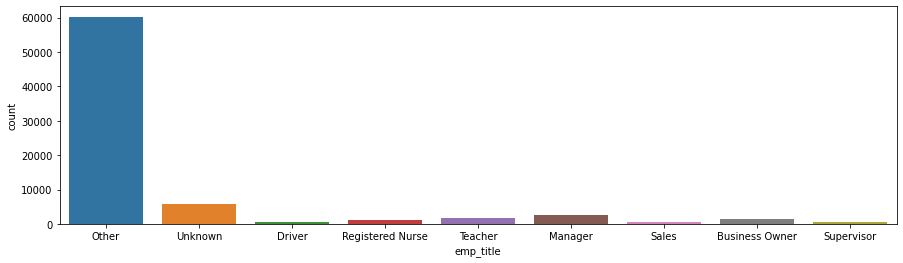

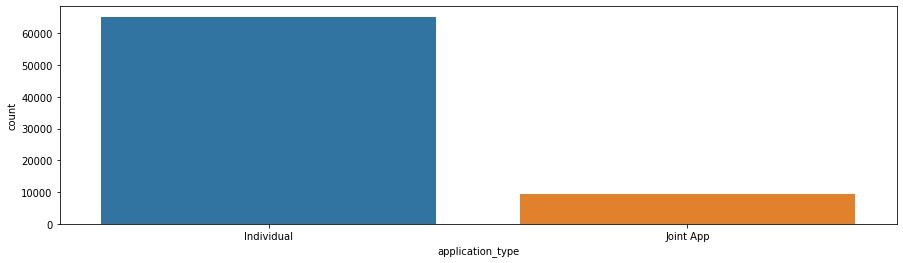

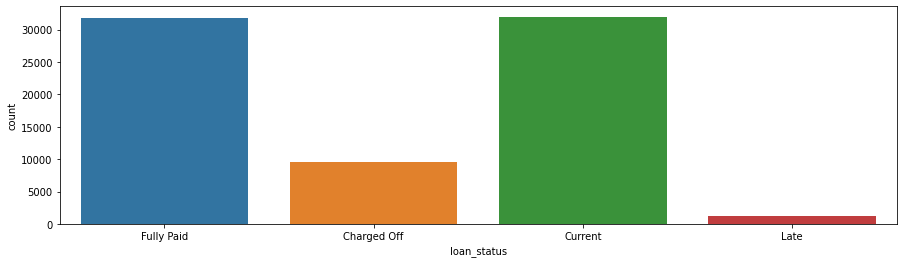

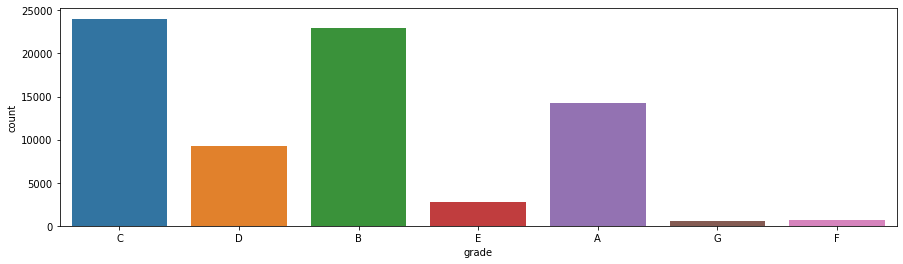

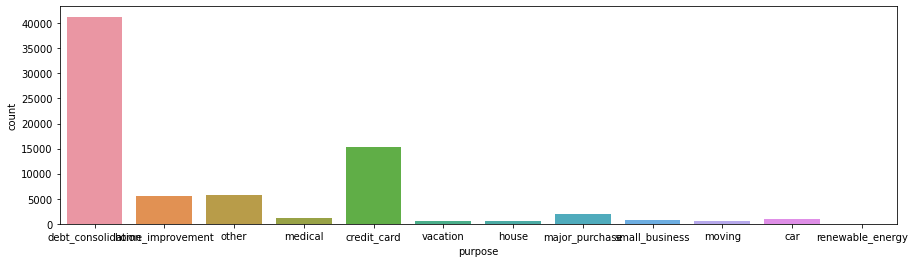

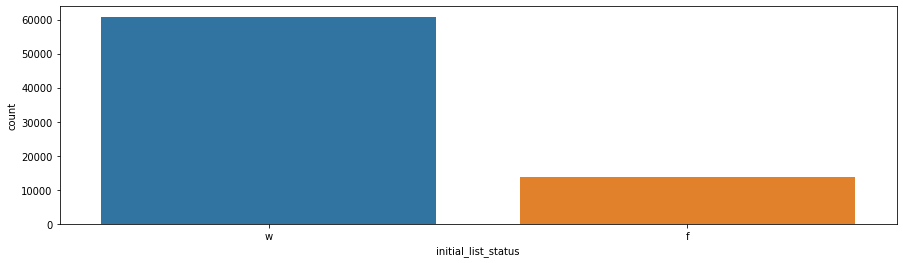

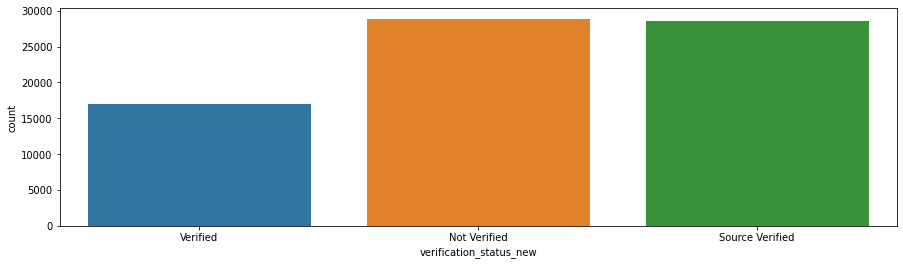

In [24]:
for i in cat_cols:
    plt.figure().set_figwidth(15)
    sns.countplot(x=i, data=insurance_data)
    plt.show()

In [25]:
insurance_data['home_ownership'].value_counts()

MORTGAGE    35759
RENT        29956
OWN          8845
NONE            1
ANY             1
Name: home_ownership, dtype: int64

In [26]:
#amalgamate 'NONE', 'ANY' and 'RENT' classes
insurance_data['home_ownership'] = insurance_data['home_ownership'].replace(['NONE', 'ANY'],['RENT', 'MORTGAGE'])

In [27]:
insurance_data['purpose'].value_counts()

debt_consolidation    41279
credit_card           15388
other                  5732
home_improvement       5502
major_purchase         1901
medical                1151
car                     914
small_business          846
vacation                634
moving                  614
house                   555
renewable_energy         46
Name: purpose, dtype: int64

In [28]:
#amalgamate multiple classes
insurance_data['purpose'] = insurance_data['purpose'].replace(['house', 'moving', 'home_improvement'],'home')
insurance_data['purpose'] = insurance_data['purpose'].replace(['renewable_energy'],'major_purchase')

In [29]:
#summary of all remaining OBJECT variables to include dtype, null and unique values, PRIOR TO ENCODING
all_columns = list(insurance_data)
float_cols = []
cat_cols = []
date_cols = []
int_cols = []
cont_cols = []
for col in all_columns:
    if insurance_data[col].dtype == 'int64':
        int_cols.append(col)
        cont_cols.append(col)
    elif insurance_data[col].dtype == 'float64':
        float_cols.append(col)
        cont_cols.append(col)
    elif insurance_data[col].dtype == 'object':
        cat_cols.append(col)
    elif insurance_data[col].dtype == 'datetime64[ns]':
        date_cols.append(col)

unique_ser = insurance_data[all_columns].nunique()
unique_ser.name = 'unique'
unique_df = unique_ser.to_frame()

dtype_ser = insurance_data[all_columns].dtypes
dtype_ser.name = 'dtype'
dtype_df = dtype_ser.to_frame()

null_ser = insurance_data[all_columns].isnull().sum()
null_ser.name = 'null'
null_df = null_ser.to_frame()

df1 = pd.merge(dtype_ser, null_ser, right_index = True, left_index = True)
sum_df = pd.merge(df1, unique_ser, right_index = True, left_index = True)

sum_df[(sum_df.dtype == 'object')]

dtype  null  unique
emp_title                object     0       9
application_type         object     0       2
home_ownership           object     0       3
loan_status              object     0       4
term                     object     0       2
grade                    object     0       7
purpose                  object     0       9
initial_list_status      object     0       2
verification_status_new  object     0       3

In [30]:
fallback_1 = insurance_data

In [31]:
#using concat to reset the index as reset_index kept feezing my laptop and without resetting OHEnc didnt work
#fallback feature prevents having to begin again every time data is ruined
insurance_data = fallback_1
insurance_data = pd.concat([insurance_data], ignore_index=True)
insurance_data.shape

(74562, 76)

In [32]:
#label encoding with target variable removed
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

cat_cols.remove('loan_status')

lab_enc_test_df_pre = insurance_data[cat_cols]

for obj in cat_cols:
    insurance_data[f"{obj}_code"] = lab_enc.fit_transform(insurance_data[obj])
    lab_enc_test_df_pre[f"{obj}_code"] = lab_enc.fit_transform(insurance_data[obj])
    
for obj in cat_cols: 
    insurance_data = insurance_data.drop([obj], axis = 1)

#verification of label encoder
insurance_data.head()

<ipython-input-32-c684c78048a2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab_enc_test_df_pre[f"{obj}_code"] = lab_enc.fit_transform(insurance_data[obj])


loan_status  loan_amnt  int_rate  installment  hardship_status  \
0   Fully Paid      35000    0.1505      1214.15                0   
1  Charged Off      21000    0.1408       489.51                0   
2      Current      20000    0.1408       466.20                0   
3   Fully Paid      16000    0.1903       586.74                0   
4  Charged Off      35000    0.2000       927.29                0   

   delinq_2yrs  inq_fi  inq_last_12m  inq_last_6mths  fico_range_low  \
0            0     1.0           1.0               1             680   
1            0     1.0           1.0               1             710   
2            0     2.0           3.0               1             760   
3            0     0.0           1.0               1             670   
4            0     3.0           3.0               2             765   

   fico_range_high  last_fico_range_high  last_fico_range_low  mort_acc  \
0              684                   689                  685         1   
1              714                   589                  585         0   
2              764                   689                  685         1   
3              674                   644                  640         1   
4              769                   554                  550         1   

   open_acc  open_acc_6m  acc_open_past_24mths  pub_rec  total_acc  out_prncp  \
0         7          1.0                     5        0         10       0.00   
1        13          1.0                     4        1         45       0.00   
2        14          2.0                     4        0         20   10734.69   
3        10          2.0                     5        1         34       0.00   
4        11          6.0                     7        0         18       0.00   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00  43573.779596         43573.78         35000.00   
1           0.00  13274.320000         13274.32          6376.13   
2       10734.69  15462.830000         15462.83          9265.31   
3           0.00  20685.951468         20685.95         16000.00   
4           0.00  14578.990000         14578.99          4111.79   

   total_rec_int  total_rec_late_fee  total_cu_tl  tot_coll_amt  tot_cur_bal  \
0        8573.78                 0.0          1.0           551        22049   
1        4750.30                 0.0          0.0            76        86785   
2        6197.52                 0.0          0.0             0        75396   
3        4685.95                 0.0          2.0          2104        43001   
4        6049.51                 0.0          4.0             0       145673   

   total_bal_il  total_rev_hi_lim  tot_hi_cred_lim  total_bal_ex_mort  \
0        9213.0             22800            46565              22049   
1       76738.0             23100           119204              86785   
2       24268.0             35900           113398              27749   
3       22068.0             24100            53705              43001   
4       63702.0             25500           187657              70960   

   total_bc_limit  total_il_high_credit_limit  mo_sin_old_rev_tl_op  \
0           18700                       23765                    46   
1           14300                       96104                   199   
2           32400                       25000                   375   
3           24100                       29605                   321   
4            3000                       84360                   141   

   mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  open_act_il  open_il_12m  \
0                     13               1          2.0          1.0   
1                      1               1          3.0          0.0   
2                      2               2          1.0          1.0   
3                      2               2          2.0          0.0   
4                      5               2          4.0          5.0   

   open_il_24m  all_util  revol_util  op

In [33]:
#label encoder calculator.
#change column name depending on what you want to know.
lab_enc_test_df = lab_enc_test_df_pre
all_enc_columns = list(lab_enc_test_df)
column_name = 'grade'
new_enc_list = []
for i in all_enc_columns:
    if column_name in i:
        new_enc_list.append(i)

lab_enc_test_df[new_enc_list].drop_duplicates().reset_index(drop=True)


grade  grade_code
0     C           2
1     D           3
2     B           1
3     E           4
4     A           0
5     G           6
6     F           5

In [34]:
#export cleaned data and split into x and y variables.

insurance_data.to_excel(insurance_data_path + '\\CleanedInsuranceData.xlsx', index = True, sheet_name = 'CleanedData')

X = insurance_data
y = insurance_data['loan_status']
X = X.drop(['loan_status'], axis = 1)

In [35]:
#removal of variables that are highly correlated based on assumption that they will alternate throughout iteration.
df_corr = X.corr().abs().unstack().sort_values(ascending=False).to_frame(name='corr')

filter_1 = df_corr['corr'] > 0.8
df_corr = df_corr[filter_1]

filter_2 = df_corr['corr'] < 1
df_corr = df_corr[filter_2]

df_corr.drop_duplicates(inplace=True)

corr_list = list(df_corr.index.get_level_values(0))
    
X = X.drop(corr_list, axis = 1)

In [36]:
print(df_corr)

                                                           corr
fico_range_high            fico_range_low              1.000000
out_prncp                  out_prncp_inv               1.000000
total_pymnt_inv            total_pymnt                 0.999994
open_acc                   num_sats                    0.998992
recoveries                 collection_recovery_fee     0.994444
num_rev_tl_bal_gt_0        num_actv_rev_tl             0.978125
int_rate                   grade_code                  0.968647
tot_cur_bal                tot_hi_cred_lim             0.964012
total_rec_prncp            total_pymnt                 0.956000
total_pymnt_inv            total_rec_prncp             0.955929
total_bal_il               total_il_high_credit_limit  0.948162
installment                loan_amnt                   0.945031
total_bal_ex_mort          total_bal_il                0.909340
installment                total_pymnt                 0.899431
total_pymnt_inv            installment  

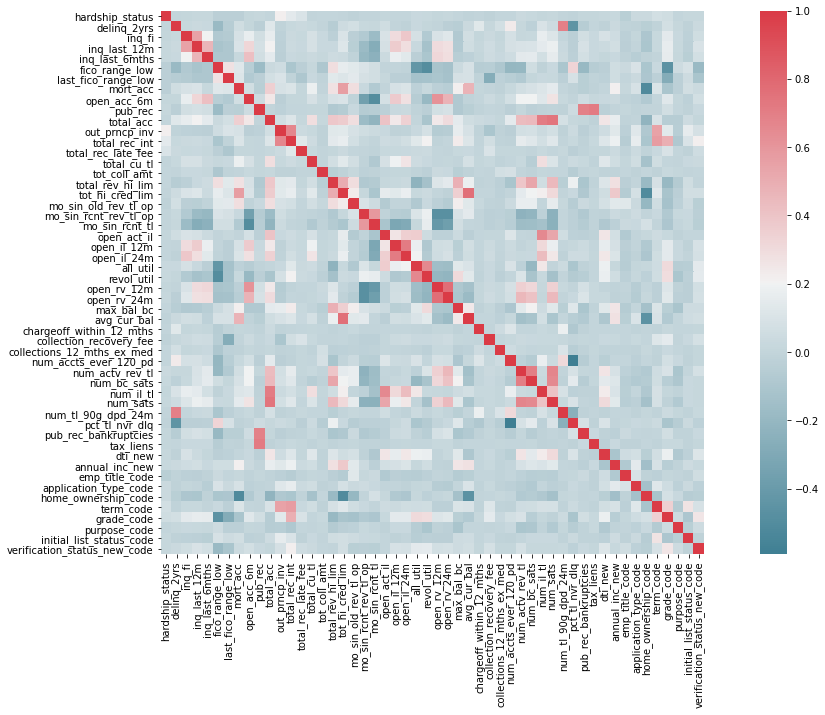

In [37]:
#heat map to show correlation between remaining variables
f,ax = plt.subplots(figsize=(20, 10))
corr = X[list(X)].corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=bool),
           cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)
plt.show()

In [38]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10, stratify = y)

# Keep 50 features and rank them by best mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=30)

#Fit and apply feature ranking method
selector.fit_transform(X_train, y_train)

#Retrieve the column names for the selected columns
names = X_train.columns.values[selector.get_support()]

#and their scores
scores = selector.scores_[selector.get_support()]

#pair the values together with the zip function
names_scores = list(zip(names, scores))

#Store the information in a data frame
df = pd.DataFrame(data = names_scores, columns=['feat_names', 'mutual_info'])

#Sort the dataframe for better visualization
df = df.sort_values(['mutual_info', 'feat_names'], ascending = [False, True])

chosen_feat_list = list(df['feat_names'])

X_train = X_train[chosen_feat_list]
X_test = X_test[chosen_feat_list]
X = X[chosen_feat_list]
X_test = pd.concat([X_test], ignore_index=True)
y_test = pd.concat([y_test], ignore_index=True).to_frame(name='loan_status')

print(f'X_train has shape: {X_train.shape}')
df

X_train has shape: (59649, 30)


feat_names  mutual_info
5                  out_prncp_inv     0.652364
3            last_fico_range_low     0.238329
19       collection_recovery_fee     0.217747
6                  total_rec_int     0.099042
7             total_rec_late_fee     0.030652
0                hardship_status     0.030613
27                    grade_code     0.021308
26                     term_code     0.018608
1                   inq_last_12m     0.009614
17                   open_rv_24m     0.008609
2                 fico_range_low     0.008000
12                   open_il_12m     0.007584
4                       mort_acc     0.007022
29  verification_status_new_code     0.006892
10                mo_sin_rcnt_tl     0.006348
13                   open_il_24m     0.006300
25           home_ownership_code     0.006237
8           mo_sin_old_rev_tl_op     0.005437
18                   avg_cur_bal     0.005253
11                   open_act_il     0.004889
22          pub_rec_bankruptcies     0.004534
20                     num_il_tl     0.004490
21                pct_tl_nvr_dlq     0.004347
16                   open_rv_12m     0.003762
28      initial_list_status_code     0.003307
15                    revol_util     0.003178
23                emp_title_code     0.002720
14                      all_util     0.002660
24         application_type_code     0.002514
9          mo_sin_rcnt_rev_tl_op     0.002466

In [39]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(y_test[['loan_status']]).toarray())
enc_df.columns = enc.get_feature_names(['code'])
y_test_multi = y_test.join(enc_df)
y_test_multi = y_test_multi.drop(['loan_status'], axis=1)
y_test_multi.head()

code_Charged Off  code_Current  code_Fully Paid  code_Late
0               0.0           0.0              0.0        1.0
1               0.0           0.0              1.0        0.0
2               0.0           0.0              1.0        0.0
3               0.0           1.0              0.0        0.0
4               0.0           1.0              0.0        0.0

In [40]:
#Isolation forest algorithm to show unsupervised learning
from sklearn.ensemble import IsolationForest

print(f"The old training dataframe shape: {X_train.shape}")

#Use the algorithm for outlier detection, then use it to predict each point
clf1 = IsolationForest(max_samples=500, random_state = 10, contamination= 'auto')
preds = clf1.fit_predict(X_train)

#Any point labelled as -1 is an outlier
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

#Remove outliers from training data.
filtered_array = []
for element in preds:
  if element != -1:
    filtered_array.append(True)
  else:
    filtered_array.append(False)
X_train = X_train[filtered_array]
y_train = y_train[filtered_array]

print(f"The new training dataframe shape: {X_train.shape}")

The old training dataframe shape: (59649, 30)
Total number of outliers identified is:  3707
The new training dataframe shape: (55942, 30)


In [41]:
from sklearn.utils import resample

print(y_train.value_counts())

train_df = pd.merge(X_train, y_train, right_index=True, left_index=True)

fully_paid_df = train_df[train_df['loan_status']=="Fully Paid"]
current_df = train_df[train_df['loan_status']=="Current"]
charged_off_df = train_df[train_df['loan_status']=="Charged Off"]
late_df = train_df[train_df['loan_status']=="Late"]

n = 5000

fully_paid_resampled = resample(fully_paid_df, replace=True, n_samples=n, random_state=10)
current_resampled = resample(current_df, replace=True, n_samples=n, random_state=10)
charged_off_resampled = resample(charged_off_df, replace=True, n_samples=n, random_state=10)
late_resampled = resample(late_df, replace=True, n_samples=n, random_state=10)

train_df_resampled = pd.concat([fully_paid_resampled, current_resampled, charged_off_resampled, late_resampled], ignore_index=True)

X_train = train_df_resampled[chosen_feat_list]
y_train = train_df_resampled['loan_status']

print(y_train.value_counts())

Fully Paid     24856
Current        23735
Charged Off     6530
Late             821
Name: loan_status, dtype: int64
Fully Paid     5000
Charged Off    5000
Current        5000
Late           5000
Name: loan_status, dtype: int64


In [42]:
#hot encoding of finalised y_train df
X_train = pd.concat([X_train], ignore_index=True)
y_train = pd.concat([y_train], ignore_index=True).to_frame(name='loan_status')
enc_df = pd.DataFrame(enc.fit_transform(y_train[['loan_status']]).toarray())
enc_df.columns = enc.get_feature_names(['code'])
y_train_multi = y_train.join(enc_df)
y_train_multi = y_train_multi.drop(['loan_status'], axis=1)

In [43]:
X_train.shape

(20000, 30)

In [44]:
X_test.shape

(14913, 30)

In [45]:
y_train.shape

(20000, 1)

In [46]:
y_test.shape

(14913, 1)

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


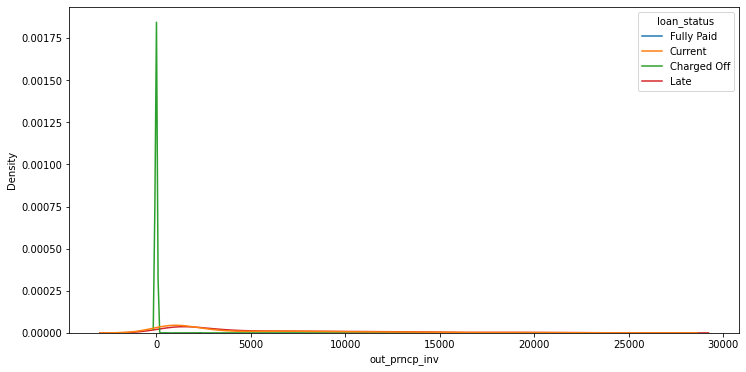

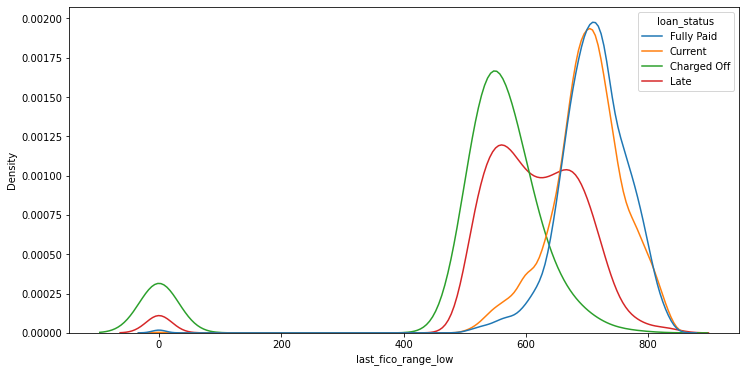

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


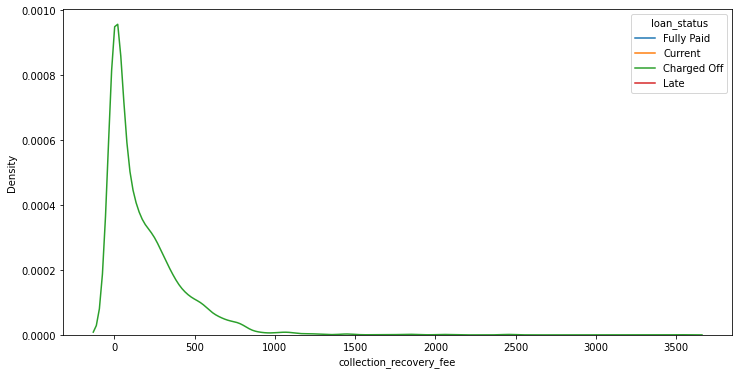

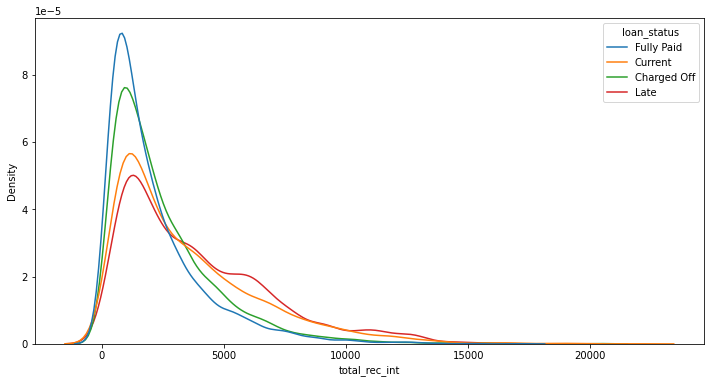

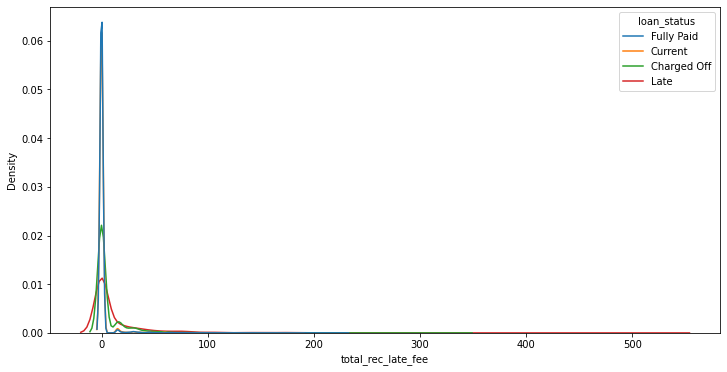

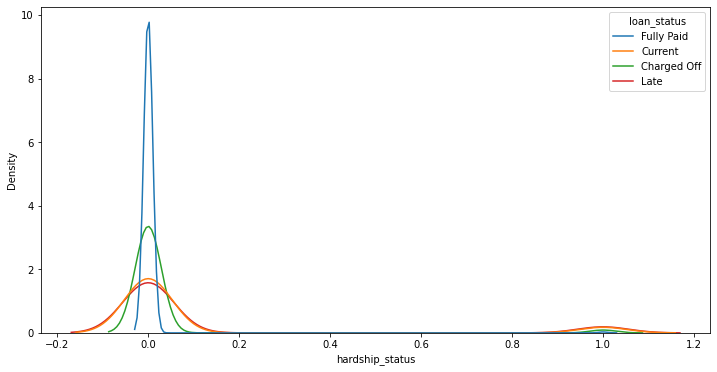

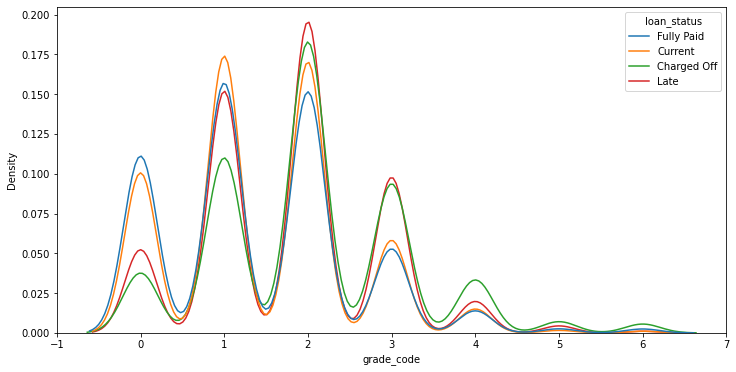

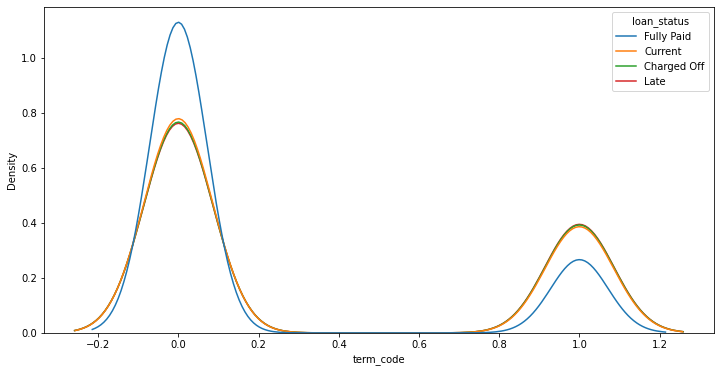

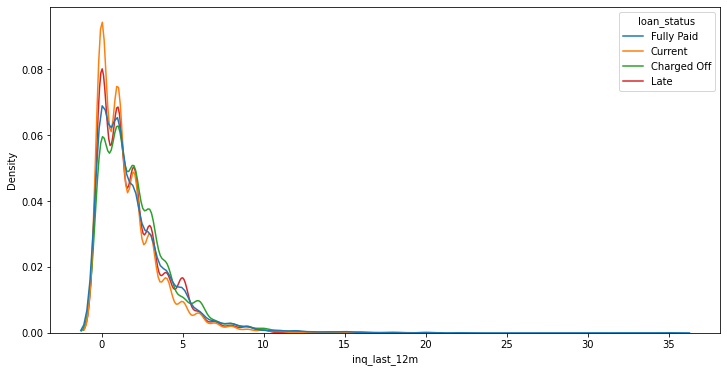

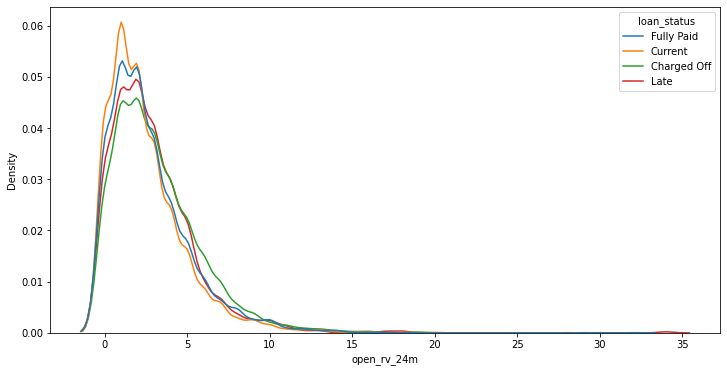

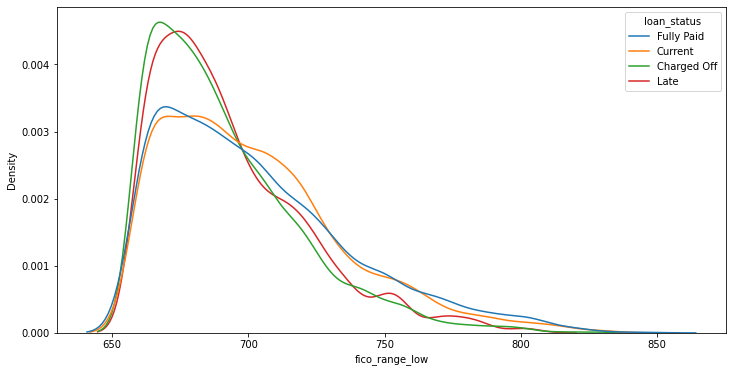

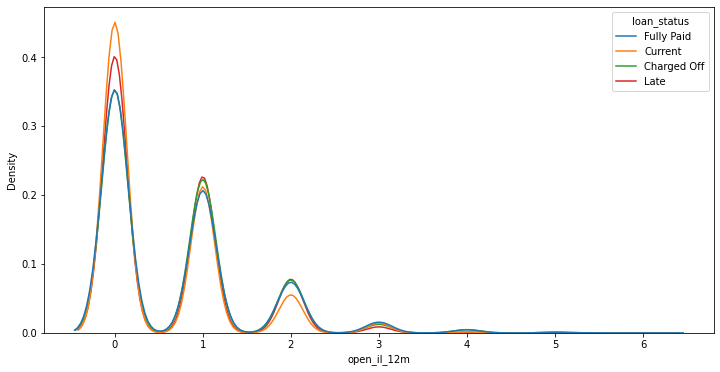

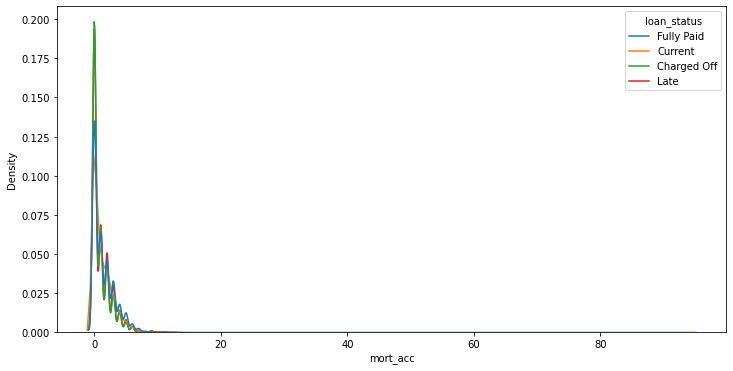

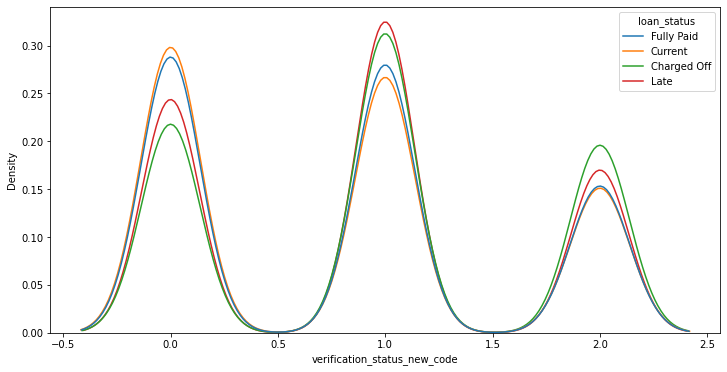

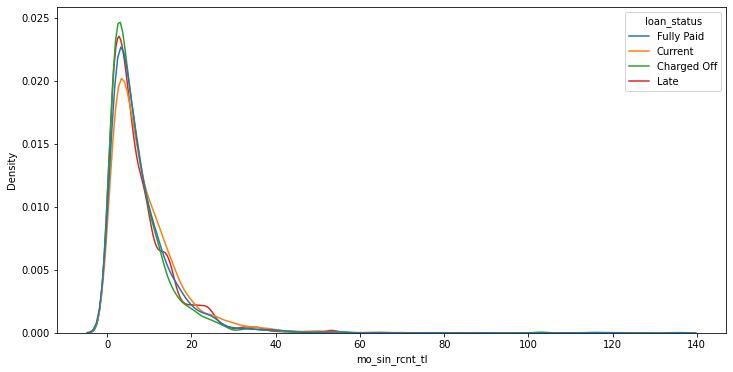

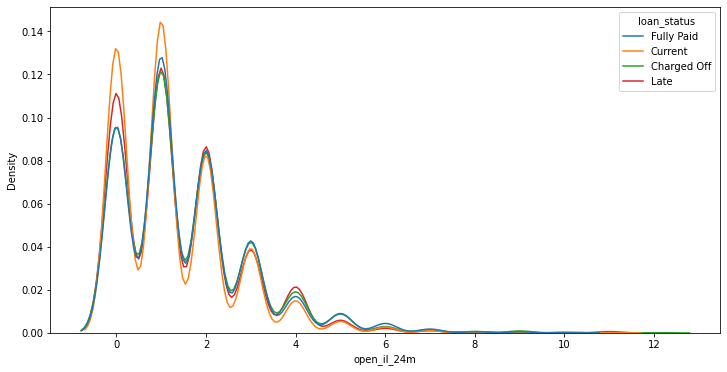

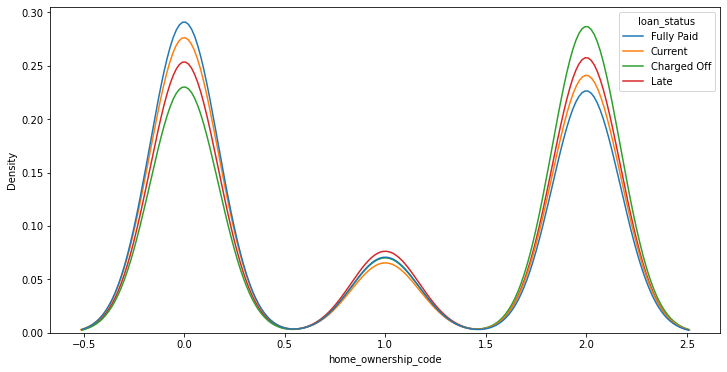

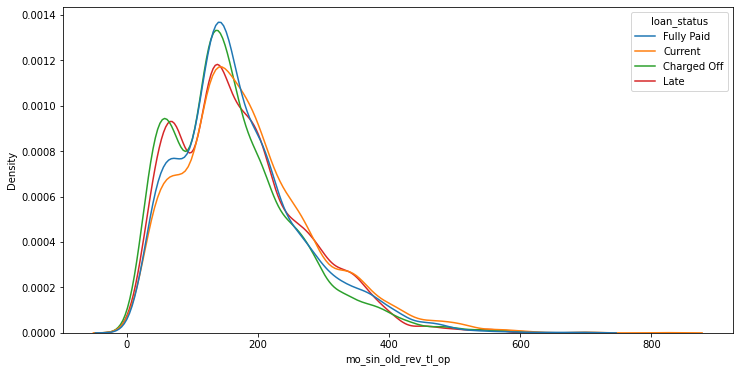

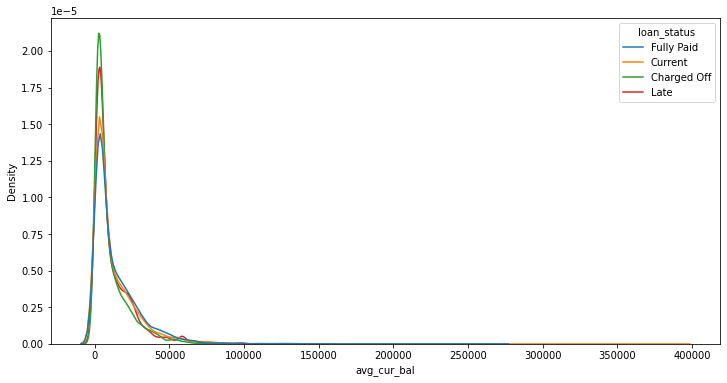

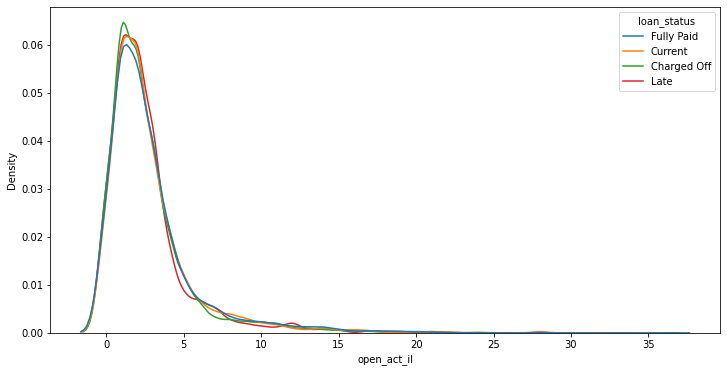

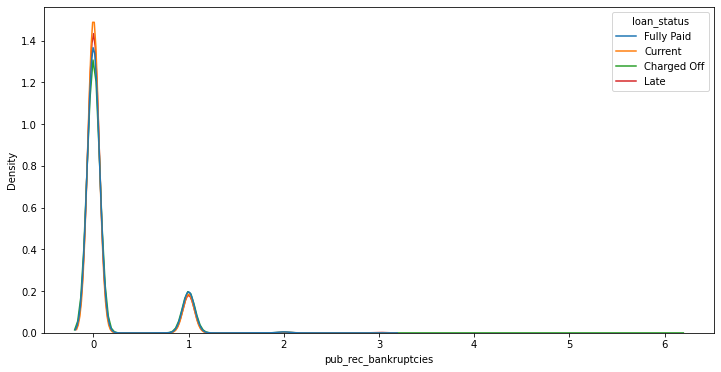

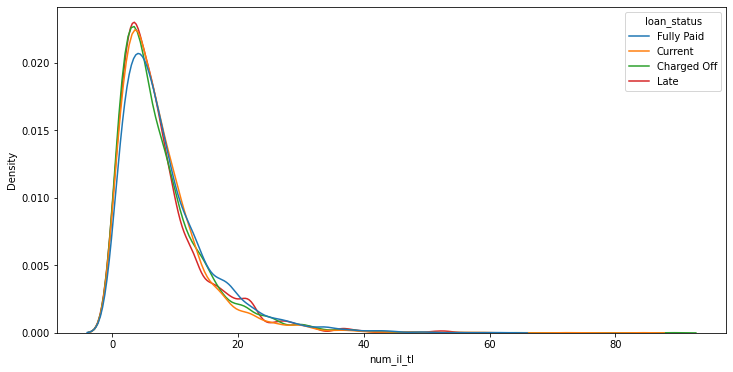

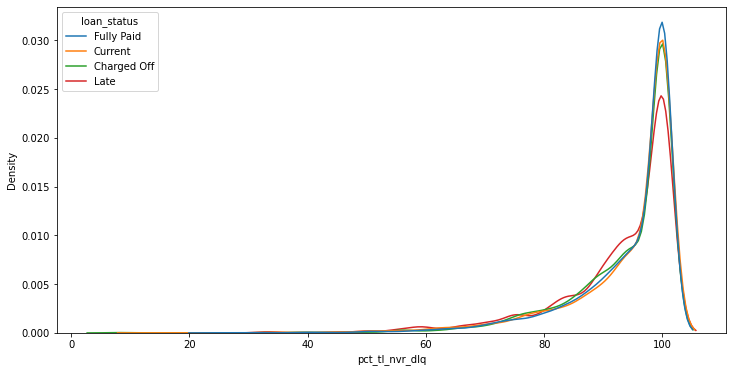

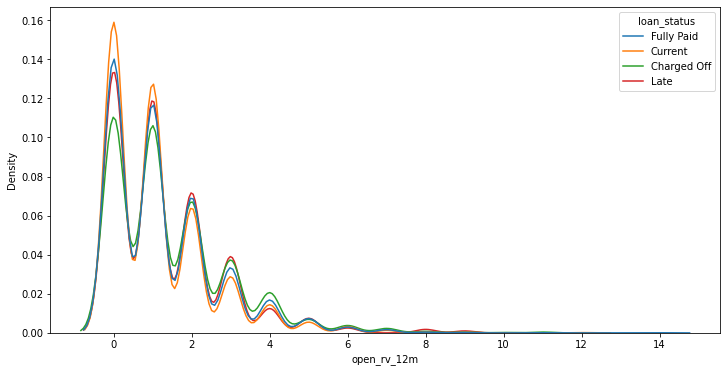

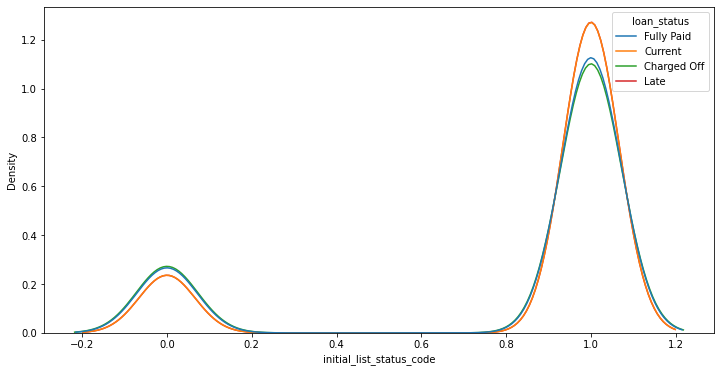

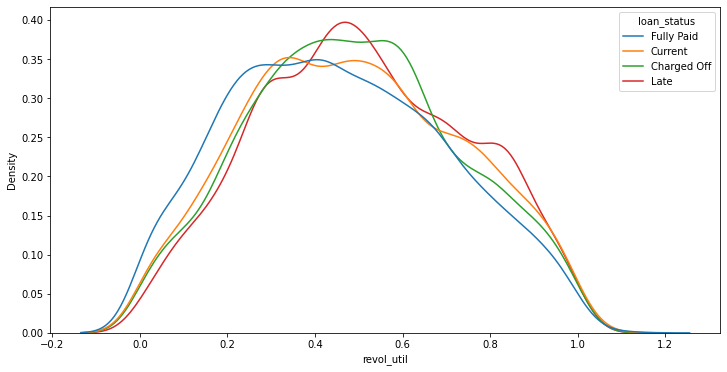

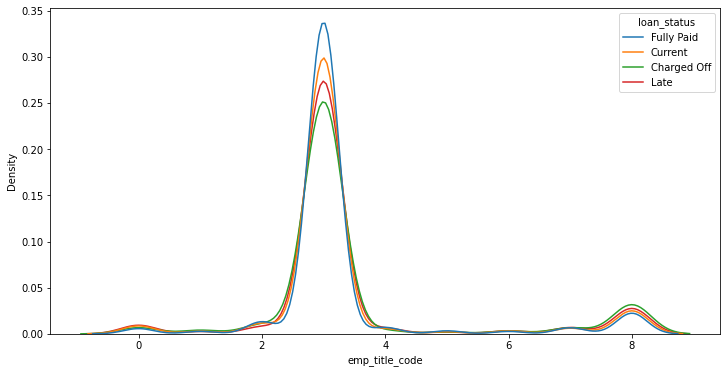

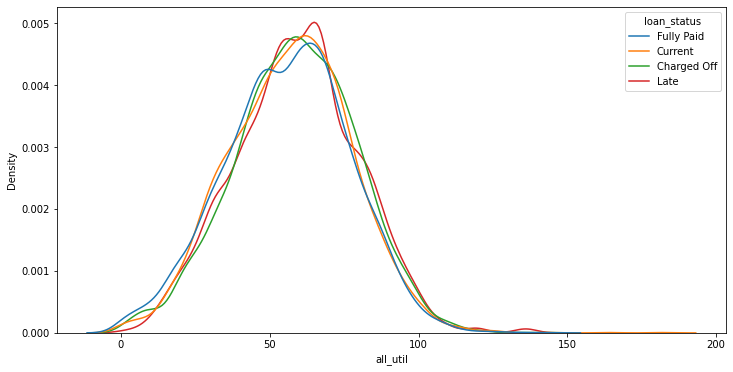

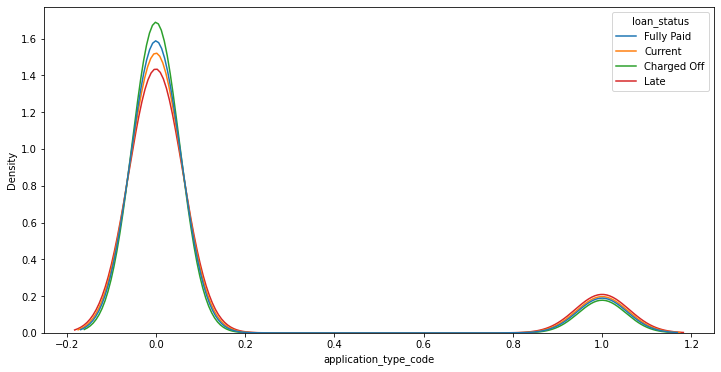

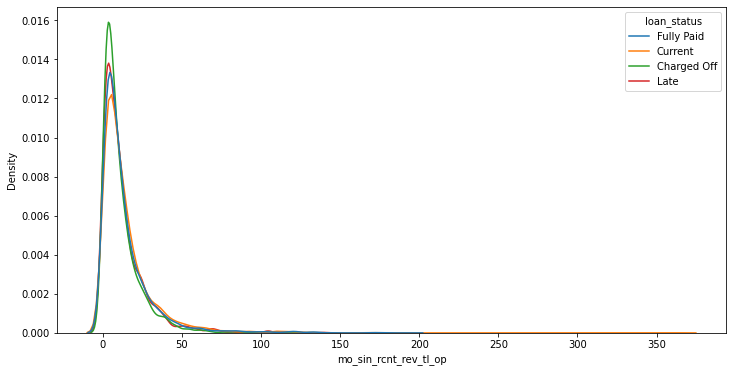

In [47]:
for i in chosen_feat_list:
    plt.figure(figsize=(12,6))
    sns.kdeplot(x = i, hue = 'loan_status', data = train_df_resampled)
    plt.show()

In [48]:
#create supervised classification models

from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import *
from sklearn.utils.validation import check_is_fitted
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'alpha': 0.001, 'loss': 'modified_huber', 'penalty': 'l1', 'random_state': 10}
              precision    recall  f1-score   support

 Charged Off       0.87      0.94      0.90      1910
     Current       0.99      0.76      0.86      6400
  Fully Paid       0.97      0.95      0.96      6362
        Late       0.11      0.76      0.19       241

    accuracy                           0.87     14913
   macro avg       0.73      0.85      0.73     14913
weighted avg       0.95      0.87      0.90     14913



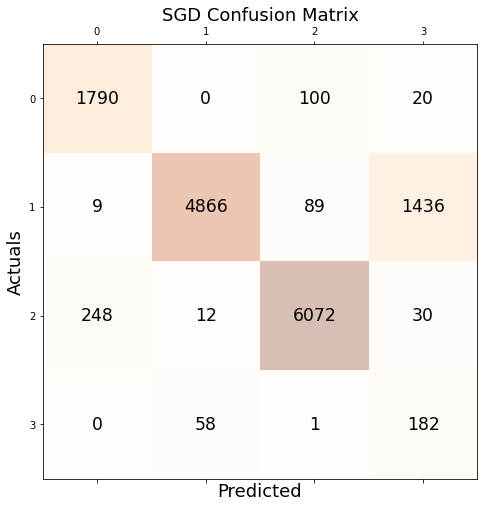

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],  
              'alpha': [0.0001, 0.001], 
              'random_state': [10],
              'loss': ['hinge', 'modified_huber', 'perceptron']}  
   
grid_sgd = GridSearchCV(SGDClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_sgd.fit(X_train_scaled, y_train.values.ravel()) 
 
# print best parameter after tuning 
print(grid_sgd.best_params_) 
grid_sgd_preds = grid_sgd.predict(X_test_scaled) 
   
# print classification report 
print(classification_report(y_test, grid_sgd_preds, zero_division = 0)) 

conf_matrix = confusion_matrix(y_test, grid_sgd_preds)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('SGD Confusion Matrix', fontsize=18)
plt.show()

sgd = SGDClassifier(random_state = 10, alpha = 0.0001, loss = 'modified_huber', penalty = 'l1')
sgd_model = sgd.fit(X_train_scaled, y_train.values.ravel())
sgd_model_pred = sgd_model.predict(X_test_scaled)
sgd_accuracy = accuracy_score(y_test, sgd_model_pred)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'criterion': 'entropy', 'max_features': None, 'random_state': 11, 'splitter': 'best'}
              precision    recall  f1-score   support

 Charged Off       0.78      0.91      0.84      1910
     Current       0.96      0.87      0.91      6400
  Fully Paid       0.96      0.91      0.93      6362
        Late       0.14      0.47      0.21       241

    accuracy                           0.89     14913
   macro avg       0.71      0.79      0.73     14913
weighted avg       0.92      0.89      0.90     14913



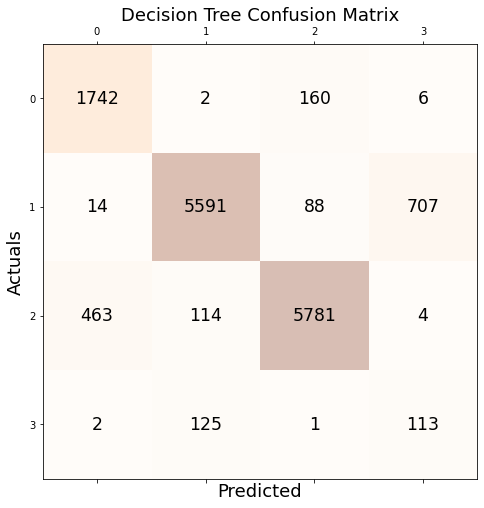

In [50]:
param_grid = {'criterion': ['gini', 'entropy'],  
              'splitter': ['best', 'random'], 
              'random_state': [11],
              'max_features': [None, 'auto']}  
   
grid_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_dtc.fit(X_train_scaled, y_train.values.ravel()) 
 
# print best parameter after tuning 
print(grid_dtc.best_params_) 
grid_dtc_preds = grid_dtc.predict(X_test_scaled) 
   
# print classification report 
print(classification_report(y_test, grid_dtc_preds, zero_division = 0)) 

conf_matrix = confusion_matrix(y_test, grid_dtc_preds)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Decision Tree Confusion Matrix', fontsize=18)
plt.show()

dtc = DecisionTreeClassifier(criterion = 'gini', random_state = 11, max_features = None, splitter = 'best')
dtc_model = dtc.fit(X_train_scaled, y_train.values.ravel())
dtc_model_pred = dtc_model.predict(X_test_scaled)
dtc_accuracy = accuracy_score(y_test, dtc_model_pred)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'var_smoothing': 1e-09}
              precision    recall  f1-score   support

 Charged Off       0.99      0.74      0.85      1910
     Current       0.98      0.83      0.90      6400
  Fully Paid       0.92      0.99      0.95      6362
        Late       0.12      0.61      0.19       241

    accuracy                           0.88     14913
   macro avg       0.75      0.79      0.72     14913
weighted avg       0.94      0.88      0.90     14913



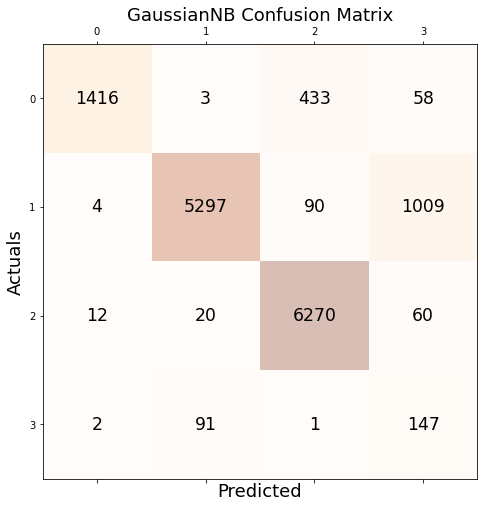

In [51]:
param_grid = {'var_smoothing': [0.000000001, 0.00000001, 0.00000000001]}  
   
grid_gnb = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_gnb.fit(X_train_scaled, y_train.values.ravel()) 
 
# print best parameter after tuning 
print(grid_gnb.best_params_) 
grid_gnb_preds = grid_gnb.predict(X_test_scaled) 
   
# print classification report 
print(classification_report(y_test, grid_gnb_preds, zero_division = 0)) 

conf_matrix = confusion_matrix(y_test, grid_gnb_preds)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('GaussianNB Confusion Matrix', fontsize=18)
plt.show()

gnb = GaussianNB(var_smoothing = 0.00000000001)
gnb_model = gnb.fit(X_train_scaled, y_train.values.ravel())
gnb_model_pred = gnb_model.predict(X_test_scaled)
gnb_accuracy = accuracy_score(y_test, gnb_model_pred)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

 Charged Off       0.80      0.92      0.86      1910
     Current       0.97      0.69      0.81      6400
  Fully Paid       0.83      0.94      0.88      6362
        Late       0.15      0.59      0.24       241

    accuracy                           0.83     14913
   macro avg       0.69      0.79      0.70     14913
weighted avg       0.87      0.83      0.84     14913



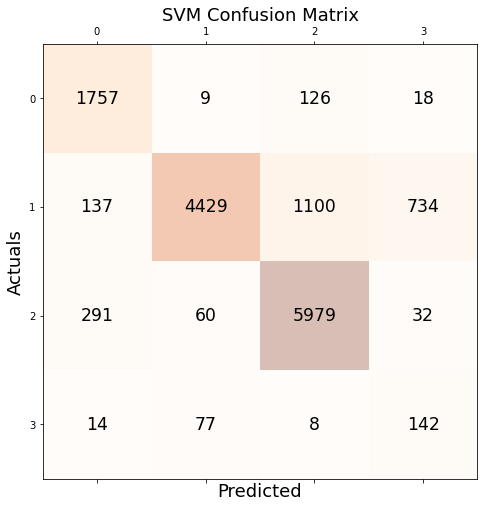

In [52]:
param_grid = {'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'poly', 'rbf']}  
   
grid_svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_svc.fit(X_train_scaled, y_train.values.ravel()) 
 
# print best parameter after tuning 
print(grid_svc.best_params_) 
grid_svc_preds = grid_svc.predict(X_test_scaled) 
   
# print classification report 
print(classification_report(y_test, grid_svc_preds, zero_division = 0)) 

conf_matrix = confusion_matrix(y_test, grid_svc_preds)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('SVM Confusion Matrix', fontsize=18)
plt.show()

svc = SVC(random_state = 10, gamma = 'scale', kernel = 'poly')
svc_model = svc.fit(X_train_scaled, y_train.values.ravel())
svc_model_pred = svc_model.predict(X_test_scaled)
svc_accuracy = accuracy_score(y_test, svc_model_pred)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 1, 'max_iter': 250, 'random_state': 10, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

 Charged Off       0.86      0.94      0.90      1910
     Current       0.99      0.75      0.85      6400
  Fully Paid       0.94      0.96      0.95      6362
        Late       0.12      0.74      0.21       241

    accuracy                           0.86     14913
   macro avg       0.73      0.85      0.73     14913
weighted avg       0.94      0.86      0.89     14913



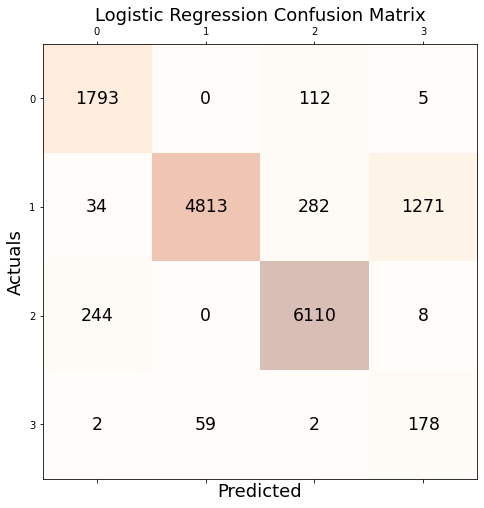

In [53]:
param_grid = {'random_state': [10],
              'solver': ['newton-cg', 'lbfgs'],
              'C': [1, 0.5],
              'max_iter': [250, 400]}  
   
grid_lr = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_lr.fit(X_train_scaled, y_train.values.ravel()) 
 
# print best parameter after tuning 
print(grid_lr.best_params_) 
grid_lr_preds = grid_lr.predict(X_test_scaled) 
   
# print classification report 
print(classification_report(y_test, grid_lr_preds, zero_division = 0)) 

conf_matrix = confusion_matrix(y_test, grid_lr_preds)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logistic Regression Confusion Matrix', fontsize=18)
plt.show()

lr = LogisticRegression(random_state = 10, max_iter = 250, C = 1, solver = 'newton-cg')
lr_model = lr.fit(X_train_scaled, y_train.values.ravel())
lr_model_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_model_pred)

In [54]:
#building a number of pipelines to classify the dataset on.
#not required as prescaling data and using a pipeline prevents bagging due to an error.
#this acts as proof that concept is understood
#also testing whether standardization is better or worse than normalization.

stan_process_sgd = [("transformer", StandardScaler()), ("clf", sgd)]
stan_sgd = Pipeline(stan_process_sgd)
stan_sgd_model = stan_sgd.fit(X_train, y_train.values.ravel())
stan_sgd_model_pred = stan_sgd_model.predict(X_test)
stan_sgd_accuracy = accuracy_score(y_test, stan_sgd_model_pred)

stan_process_dtc = [("transformer", StandardScaler()), ("clf", dtc)]
stan_dtc = Pipeline(stan_process_dtc)
stan_dtc_model = stan_dtc.fit(X_train, y_train.values.ravel())
stan_dtc_model_pred = stan_dtc_model.predict(X_test)
stan_dtc_accuracy = accuracy_score(y_test, stan_dtc_model_pred)

norm_process_sgd = [("transformer", Normalizer()), ("clf", sgd)]
norm_sgd = Pipeline(norm_process_sgd)
norm_sgd_model = norm_sgd.fit(X_train, y_train.values.ravel())
norm_sgd_model_pred = norm_sgd_model.predict(X_test)
norm_sgd_accuracy = accuracy_score(y_test, norm_sgd_model_pred)

norm_process_dtc = [("transformer", Normalizer()), ("clf", dtc)]
norm_dtc = Pipeline(norm_process_dtc)
norm_dtc_model = norm_dtc.fit(X_train, y_train.values.ravel())
norm_dtc_model_pred = norm_dtc_model.predict(X_test)
norm_dtc_accuracy = accuracy_score(y_test, norm_dtc_model_pred)

print(f'Standardized SGD acc: {stan_sgd_accuracy:.3f}, Standardized DTC acc: {stan_dtc_accuracy:.3f}')
print(f'Normalized SGD acc: {norm_sgd_accuracy:.3f}, Normalized DTC acc: {norm_dtc_accuracy:.3f}')

Standardized SGD acc: 0.828, Standardized DTC acc: 0.888
Normalized SGD acc: 0.677, Normalized DTC acc: 0.862


Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'deviance', 'n_estimators': 50, 'random_state': 10}
              precision    recall  f1-score   support

 Charged Off       0.85      0.94      0.89      1910
     Current       0.98      0.84      0.91      6400
  Fully Paid       0.97      0.95      0.96      6362
        Late       0.14      0.65      0.24       241

    accuracy                           0.90     14913
   macro avg       0.74      0.84      0.75     14913
weighted avg       0.95      0.90      0.92     14913



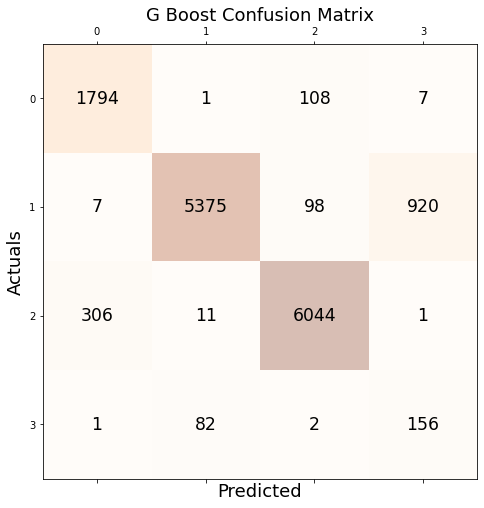

In [55]:
param_grid = {'loss': ['deviance'],  
              'learning_rate': [0.1, 0.5], 
              'n_estimators': [10, 50],
              'criterion': ['friedman_mse', 'mse'],
              'random_state': [10]}  
   
grid_g_boost = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_g_boost.fit(X_train_scaled, y_train.values.ravel()) 
 
# print best parameter after tuning 
print(grid_g_boost.best_params_) 
grid_g_boost_preds = grid_g_boost.predict(X_test_scaled) 
   
# print classification report 
print(classification_report(y_test, grid_g_boost_preds, zero_division = 0)) 

conf_matrix = confusion_matrix(y_test, grid_g_boost_preds)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('G Boost Confusion Matrix', fontsize=18)
plt.show()

g_boost = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, random_state = 10, loss = 'deviance', criterion = 'mse')
g_boost_model = g_boost.fit(X_train_scaled, y_train.values.ravel())
g_boost_model_pred = g_boost_model.predict(X_test_scaled)
g_boost_accuracy = accuracy_score(y_test, g_boost_model_pred)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'random_state': 10}
              precision    recall  f1-score   support

 Charged Off       0.86      0.94      0.90      1910
     Current       0.98      0.95      0.96      6400
  Fully Paid       0.97      0.96      0.96      6362
        Late       0.31      0.44      0.36       241

    accuracy                           0.94     14913
   macro avg       0.78      0.82      0.80     14913
weighted avg       0.95      0.94      0.94     14913



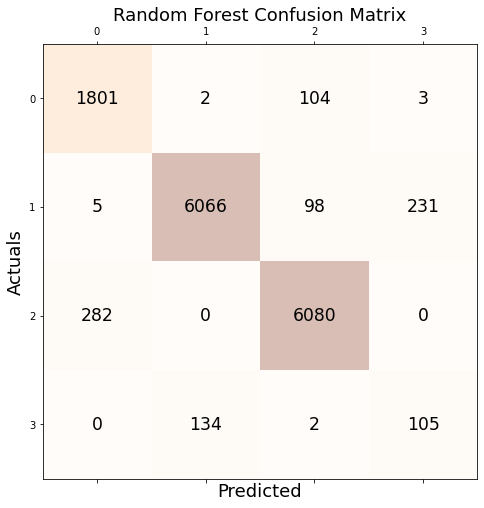

In [56]:
param_grid = {'criterion': ['gini', 'entropy'],  
              'class_weight': [None, 'balanced_subsample'], 
              'random_state': [10],
              'max_features': ['auto', 'sqrt', 'log2']}  
   
grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_rfc.fit(X_train_scaled, y_train.values.ravel()) 
 
# print best parameter after tuning 
print(grid_rfc.best_params_) 
grid_rfc_preds = grid_rfc.predict(X_test_scaled) 
   
# print classification report 
print(classification_report(y_test, grid_rfc_preds, zero_division = 0)) 

conf_matrix = confusion_matrix(y_test, grid_rfc_preds)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Random Forest Confusion Matrix', fontsize=18)
plt.show()

rfc = RandomForestClassifier(criterion = 'gini', class_weight = 'balanced_subsample', random_state = 10, max_features = 'auto')
rfc_model = rfc.fit(X_train_scaled, y_train.values.ravel())
rfc_model_pred = rfc_model.predict(X_test_scaled)
rfc_accuracy = accuracy_score(y_test, rfc_model_pred)


              precision    recall  f1-score   support

 Charged Off       0.91      0.90      0.91      1910
     Current       0.99      0.78      0.87      6400
  Fully Paid       0.96      0.97      0.97      6362
        Late       0.11      0.73      0.20       241

    accuracy                           0.87     14913
   macro avg       0.74      0.85      0.73     14913
weighted avg       0.95      0.87      0.90     14913



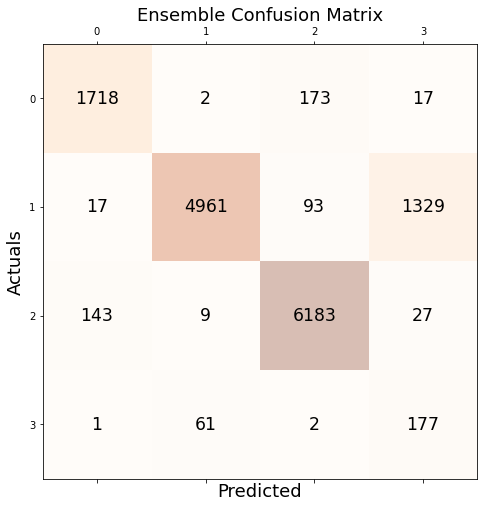

In [57]:
#Can we create a better ensemble than random forest by using a voting classifier and then.....

# pack the classifiers and string into a list of tuples.
ensemble_clf = VotingClassifier([("LR", lr), ("GNB", gnb), ("SGD", sgd)], voting="hard")
ensemble_clf.fit(X_train_scaled, y_train.values.ravel())
ensemble_clf_preds = ensemble_clf.predict(X_test_scaled)
ensemble_accuracy = accuracy_score(y_test, ensemble_clf_preds)

# print classification report 
print(classification_report(y_test, ensemble_clf_preds, zero_division = 0)) 

conf_matrix = confusion_matrix(y_test, ensemble_clf_preds)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Ensemble Confusion Matrix', fontsize=18)
plt.show()


              precision    recall  f1-score   support

 Charged Off       0.88      0.93      0.90      1910
     Current       0.99      0.79      0.88      6400
  Fully Paid       0.97      0.96      0.96      6362
        Late       0.12      0.73      0.21       241

    accuracy                           0.88     14913
   macro avg       0.74      0.85      0.74     14913
weighted avg       0.95      0.88      0.91     14913



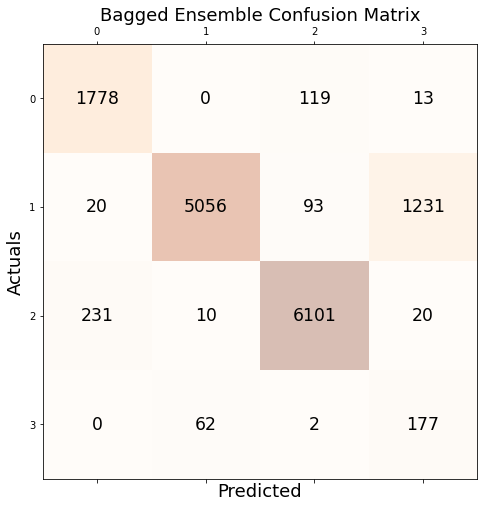

In [58]:
#....passing it into a bagging classifier
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(ensemble_clf, n_estimators=10, random_state = 10)
bagging.fit(X_train_scaled, y_train.values.ravel())
bagging_preds = bagging.predict(X_test_scaled)
bagging_accuracy = accuracy_score(y_test, bagging_preds)
   
print(classification_report(y_test, bagging_preds, zero_division = 0)) 

conf_matrix = confusion_matrix(y_test, bagging_preds)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Bagged Ensemble Confusion Matrix', fontsize=18)
plt.show()

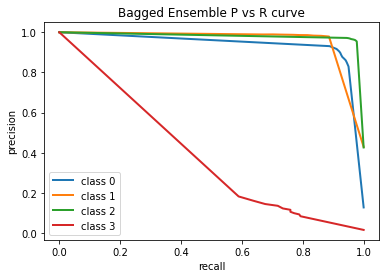

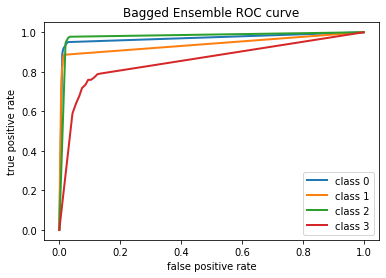

In [59]:
from sklearn.metrics import precision_recall_curve, roc_curve

n_classes = 4

y_score = bagging.predict_proba(X_test_scaled)

# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_multi.values[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'class {i}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("Bagged Ensemble P vs R curve")
plt.show()

# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_multi.values[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'class {i}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("Bagged Ensemble ROC curve")
plt.show()

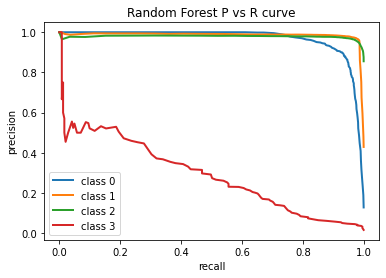

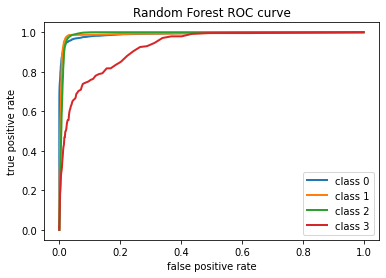

In [60]:
y_score = rfc.predict_proba(X_test_scaled)

# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_multi.values[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'class {i}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("Random Forest P vs R curve")
plt.show()

# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_multi.values[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'class {i}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("Random Forest ROC curve")
plt.show()

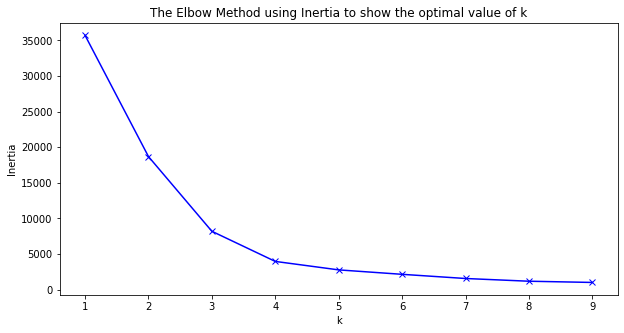

In [61]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


inertia = []
K = range(1,10)
insurance_data_km = X
insurance_data_km = MinMaxScaler().fit_transform(insurance_data_km)
insurance_data_km = PCA(2).fit_transform(insurance_data_km)
for k in K:
    kmm = KMeans(n_clusters=k, random_state = 20)
    kmm.fit(insurance_data_km)
    inertia.append(kmm.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia to show the optimal value of k')
plt.show()

In [62]:
kmm = KMeans(n_clusters=4, random_state = 20)
kmm.fit(insurance_data_km)

KMeans(n_clusters=4, random_state=20)

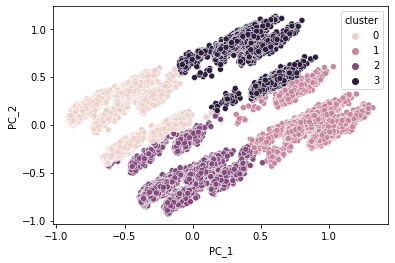

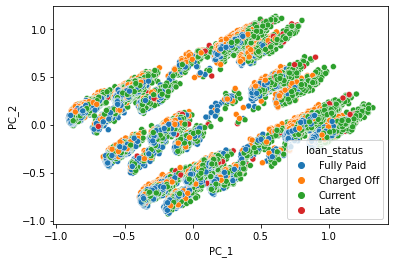

In [63]:
km_var_list = list(X)
pc_list = ['PC_1', 'PC_2']

insurance_data_km_1 = pd.DataFrame(insurance_data_km, columns = pc_list)
insurance_data_km_1['cluster'] = kmm.labels_
insurance_data_km_1['loan_status'] = insurance_data['loan_status']

class_list = ['Fully Paid', 'Charged Off', 'Current', 'Late']
x = 'loan_status'

sns.scatterplot(x = 'PC_1', y = 'PC_2', data = insurance_data_km_1, hue = 'cluster')
plt.show()
sns.scatterplot(x = 'PC_1', y = 'PC_2', data = insurance_data_km_1, hue = 'loan_status')
plt.show()

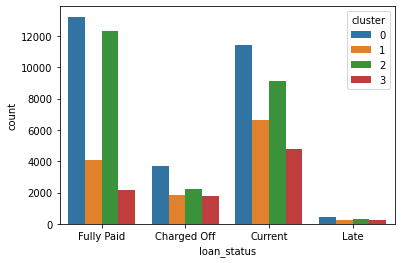

In [64]:
sns.countplot(x='loan_status', data=insurance_data_km_1, hue = 'cluster')
plt.show()

In [65]:
from yellowbrick.cluster import SilhouetteVisualizer

sil_scores = [3, 4, 5]

for i in sil_scores:
    kmm = KMeans(n_clusters=i, random_state = 20)
    kmm.fit(insurance_data_km)
    visualizer = SilhouetteVisualizer(kmm, colors='yellowbrick')
    visualizer.fit(insurance_data_km)
    visualizer.show()

ModuleNotFoundError: No module named 'yellowbrick'